In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [4]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Socio_features_with_clusters.csv")

In [5]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [6]:
cat_cols = user_profile.select_dtypes(include='object').columns

In [7]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [8]:
user_profile["H_3_Cluster"].value_counts()

0    1325
1    1000
2     591
Name: H_3_Cluster, dtype: int64

<AxesSubplot:ylabel='H_3_Cluster'>

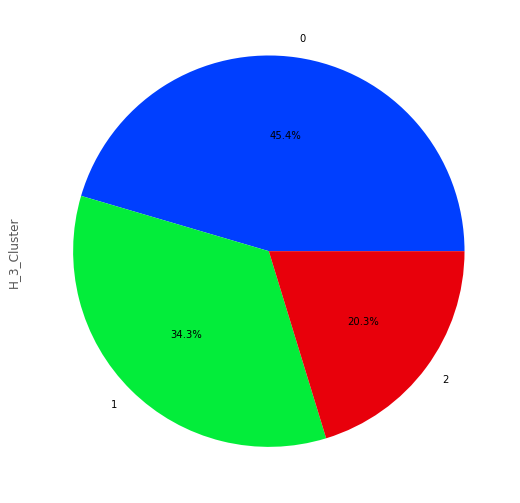

In [9]:
user_profile["H_3_Cluster"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

# Cluster analysis - Cluster 1

In [10]:
cluster_1 = user_profile[(user_profile["H_3_Cluster"]==1)]

In [11]:
cluster_1.describe()

OFFNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  \
count             1000.000000              957.000000             960.000000   
mean                 0.103395                0.110420               0.099003   
std                  0.095311                0.117479               0.106744   
min                  0.001202                0.001202               0.001202   
25%                  0.023801                0.025240               0.019188   
50%                  0.082144                0.077291               0.062414   
75%                  0.155612                0.153846               0.152129   
max                  0.712569                1.000000               1.000000   

       ONNET_OUTGOING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count             960.000000           459.000000           180.000000   
mean                0.099137             0.100263             0.083218   
std                 0.105204             0.170056             0.122272   
min                 0.001202             0.002500             0.004808   
25%                 0.020506             0.006667             0.012821   
50%                 0.061838             0.025833             0.033654   
75%                 0.152460             0.096083             0.094952   
max                 1.000000             0.842000             0.692308   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     1.800000e+02     269.000000  265.000000   
mean                      5.754859e+05       0.521608    0.213162   
std                       1.475083e+06       0.319099    0.160572   
min                       3.500000e+02       0.000000    0.005208   
25%                       2.207625e+04       0.237500    0.095486   
50%                       1.323330e+05       0.606250    0.175347   
75%                       3.372345e+05       0.775000    0.274306   
max                       1.214834e+07       0.975000    0.854167   

        BIRTH_YEAR  ...  Peo_Packages_if_Kids  \
count   735.000000  ...                1000.0   
mean   1963.873469  ...                   0.0   
std      14.723114  ...                   0.0   
min    1911.000000  ...                   0.0   
25%    1953.000000  ...                   0.0   
50%    1964.000000  ...                   0.0   
75%    1975.000000  ...                   0.0   
max    2000.000000  ...                   0.0   

       Peo_Packages_if_Teenager_Students  \
count                        1000.000000   
mean                            0.000200   
std                             0.006325   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             0.200000   

       Peo_Package_if_Working_Professionals  VAS_if_Kids  \
count                                1000.0  1000.000000   
mean                                    0.0     0.006500   
std                                     0.0     0.056665   
min                                     0.0     0.000000   
25%                                     0.0     0.000000   
50%                                     0.0     0.000000   
75%                                     0.0     0.000000   
max                                     0.0     0.500000   

       VAS_if_Teenager_Students  VAS_if_Working_Professionals  \
count                    1000.0                   1000.000000   
mean                        0.0                      0.002350   
std                         0.0                      0.023506   
min                         0.0                      0.000000   
25%                         0.0                      0.000000   
50%                         0.0                      0.000000   
75%                         0.0                      0.000000   
max                         0.0                      0.250000   

       IDD_if_Family_Member_Abr

#### Exceptional (Outlier Usage)

<AxesSubplot:>

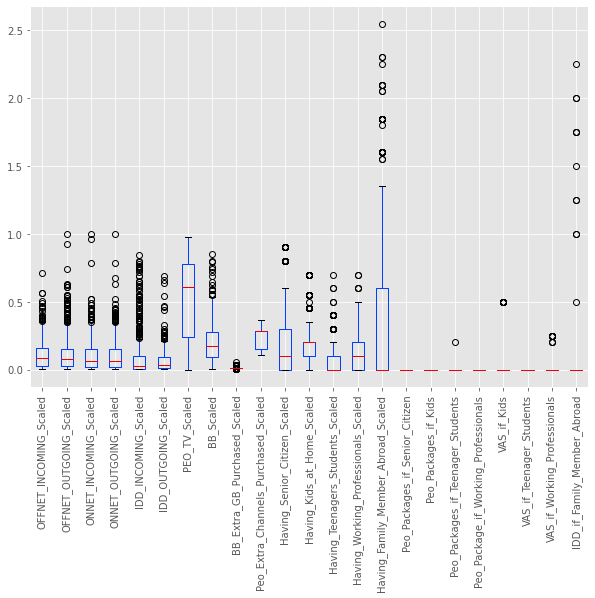

In [12]:
cluster_1.select_dtypes(include='float64').drop(["IDD_outgoing_Cumulative_Revenue","Peo_Extra_Channels_Cumulative_Rental","BB_Extra_GB_Usage_Times","AGE","BIRTH_YEAR"],axis=1).boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [13]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

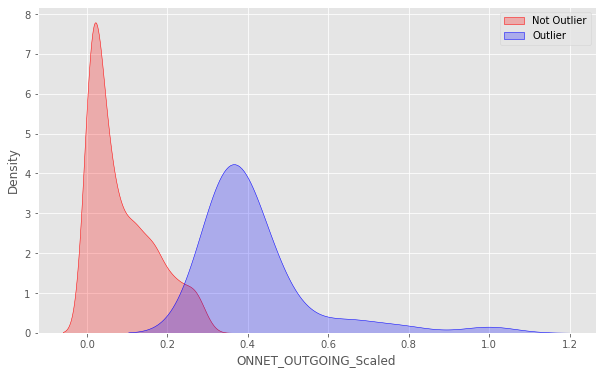

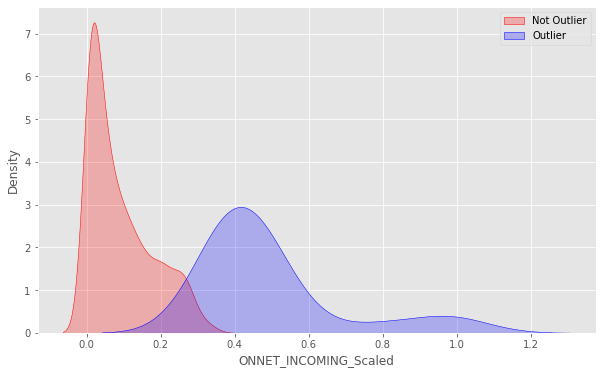

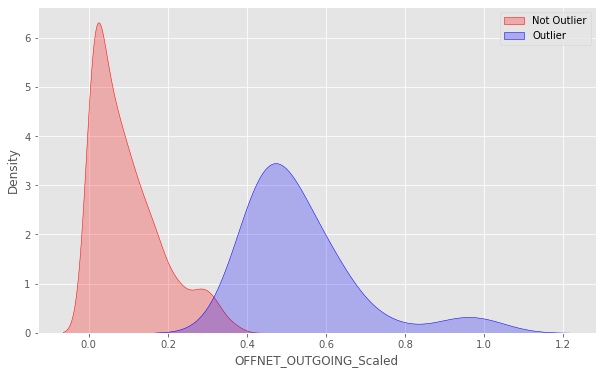

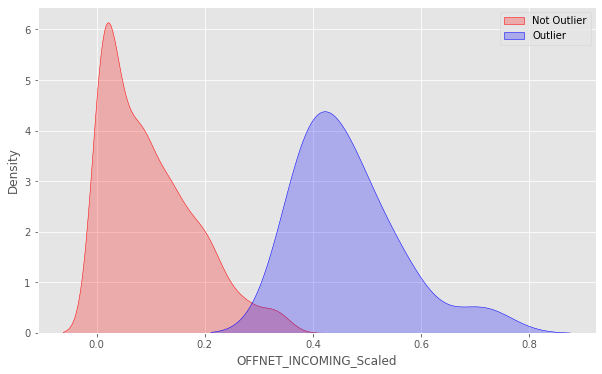

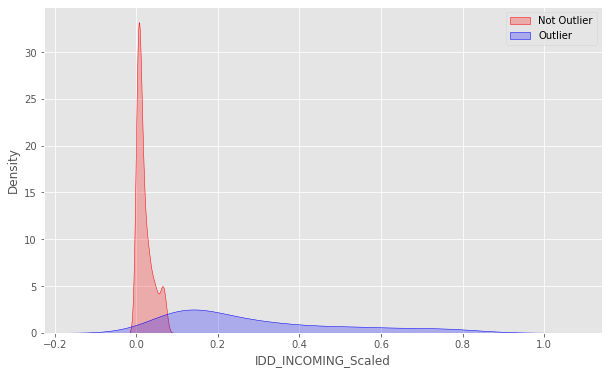

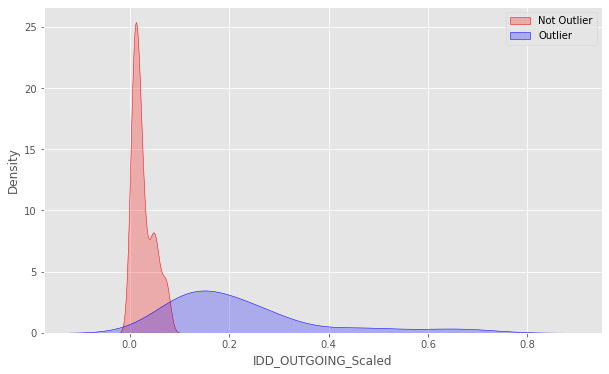

In [14]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_1[scaled_cols[i]][(cluster_1[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_1[scaled_cols[i]][(cluster_1[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [15]:
# Voice Outliers
cluster_1_out = cluster_1[(cluster_1["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_1["ONNET_INCOMING_Outlier"]=="YES") | (cluster_1["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_1["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_1["IDD_OUTGOING_Outlier"]=="YES") | (cluster_1["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

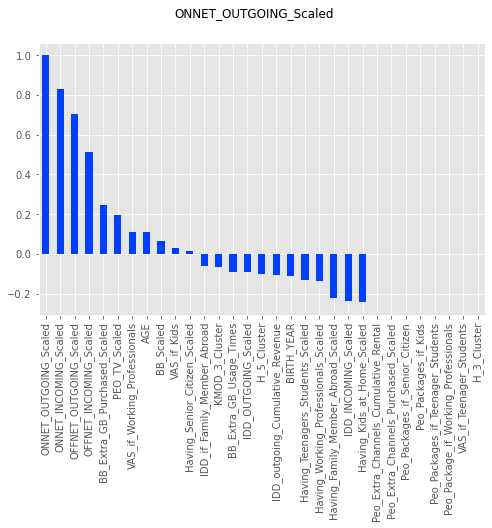

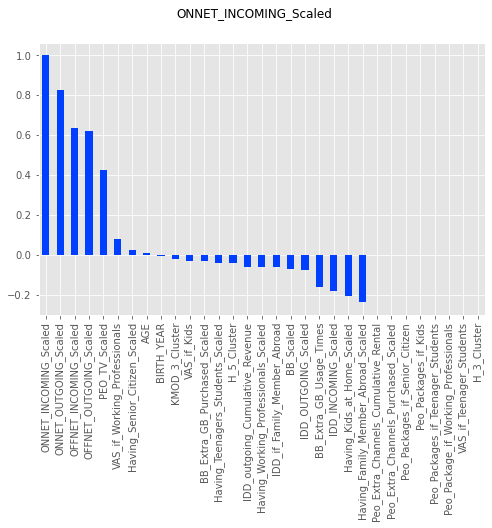

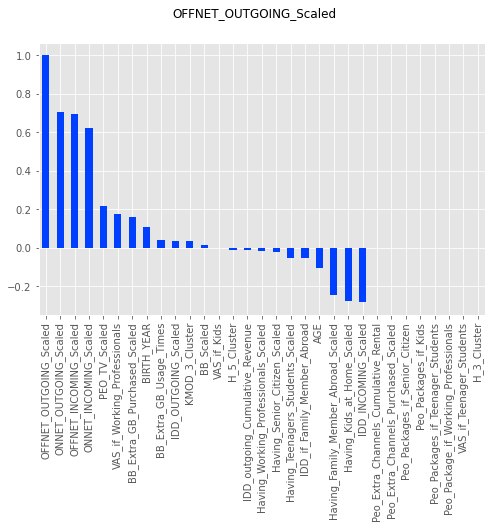

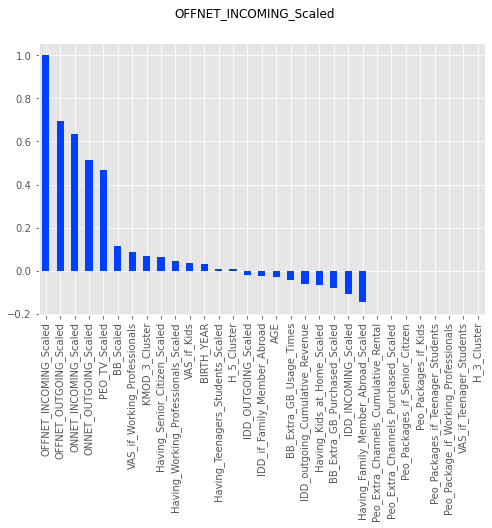

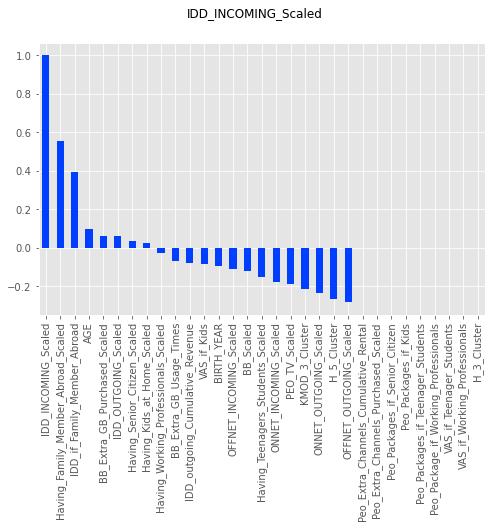

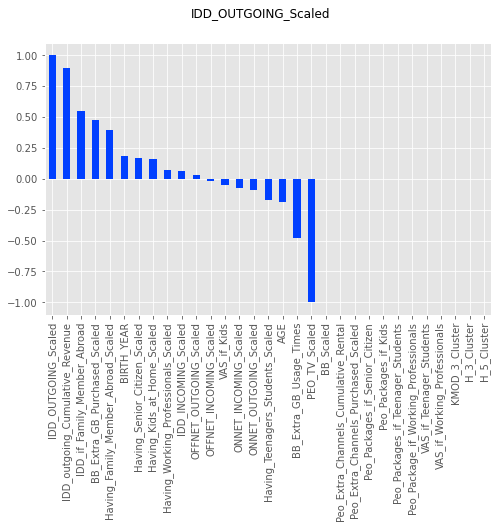

In [16]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_1_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [17]:
cluster_1_out_sub_df = pd.DataFrame([dict(cluster_1["Sub_Type"].value_counts()),dict(cluster_1_out["Sub_Type"].value_counts())])

In [18]:
cluster_1_out_sub_df

TRIPLE_PLAY  SINGLE_PLAY  DOUBLE_PLAY_BV  DOUBLE_PLAY_PV
0          837           87              47              29
1          184            2               3               1

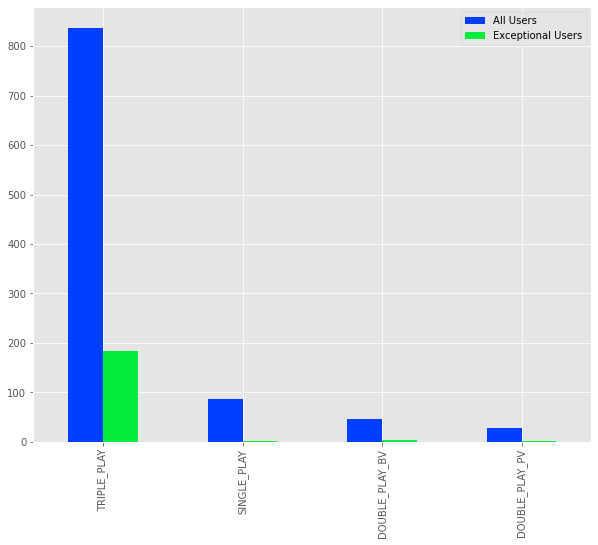

In [19]:
fig, ax = plt.subplots()
cluster_1_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

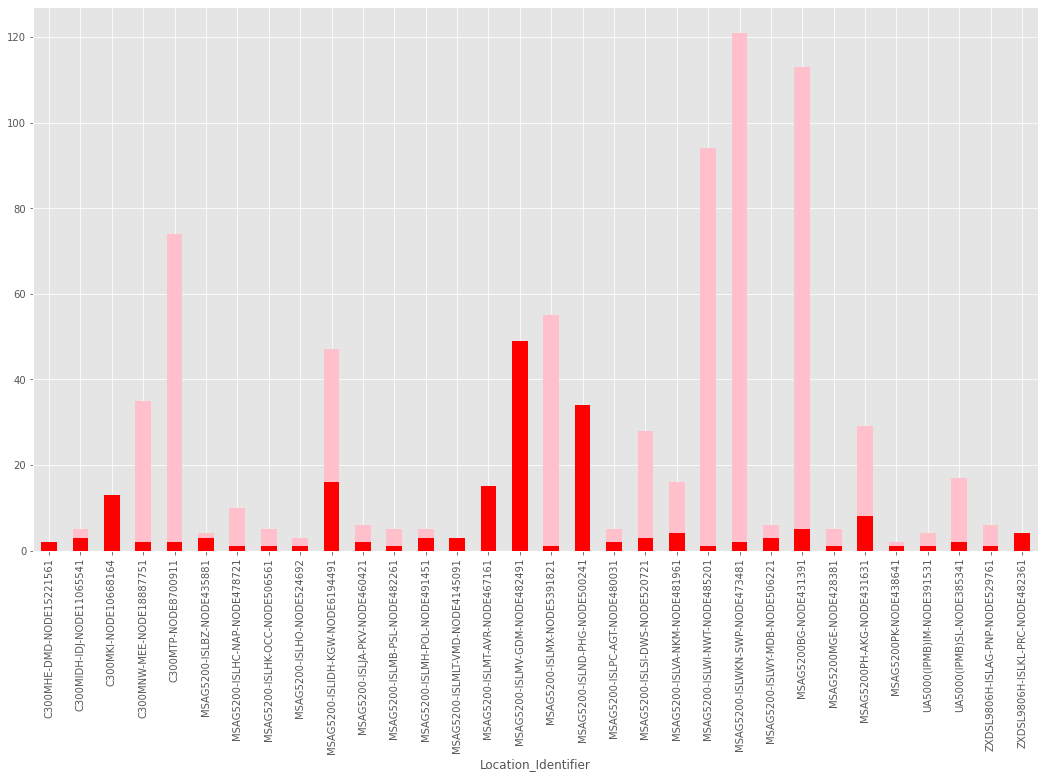

In [20]:
cluster_1_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]
cluster_1_out_loc = cluster_1_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

array([[<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Usage_Times'}>],
       [<AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Peo_Extra_Channels_Cumulative_Rental'}>,
        <AxesSubplot:title={'center':'Peo_Extra_Channels_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Hav

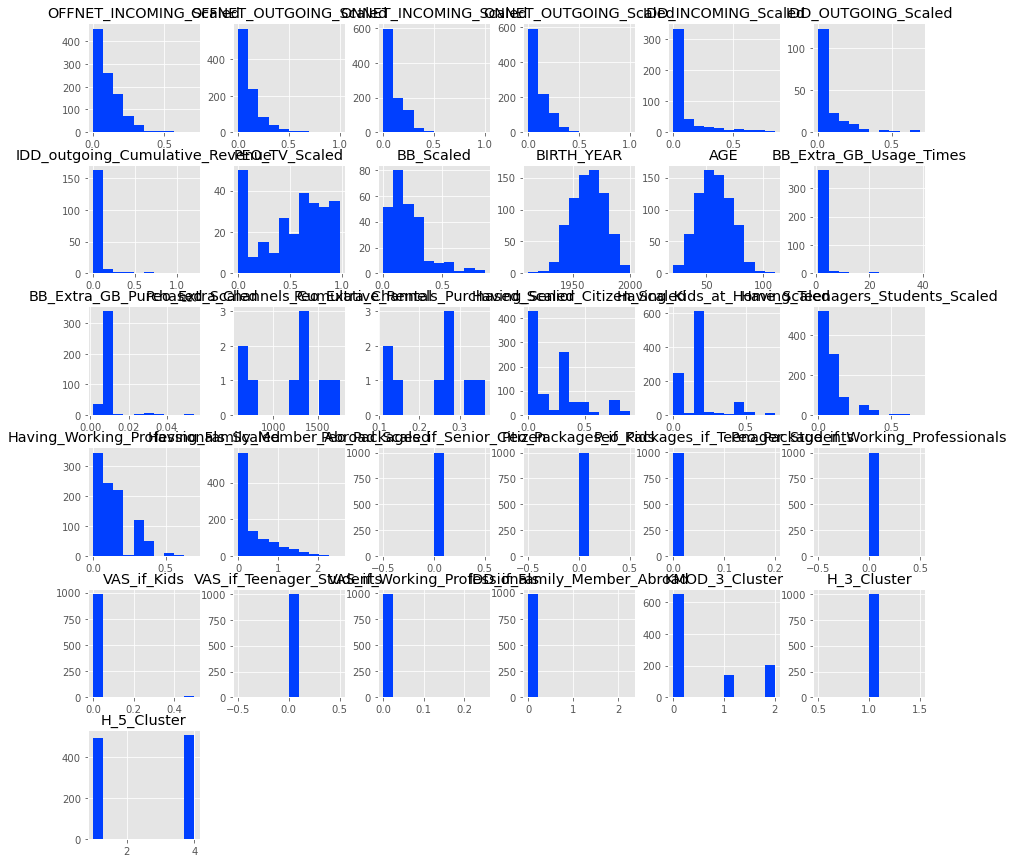

In [21]:
cluster_1.hist(figsize=(15,15))

### Subscription Type and Usage

In [22]:
cluster_1["Sub_Type"].value_counts()

TRIPLE_PLAY       837
SINGLE_PLAY        87
DOUBLE_PLAY_BV     47
DOUBLE_PLAY_PV     29
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

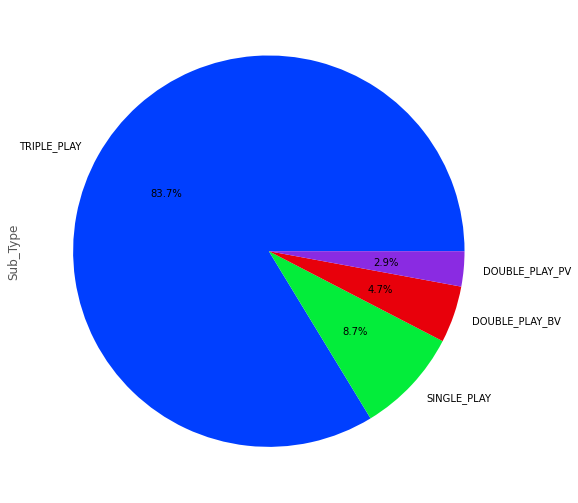

In [23]:
cluster_1["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [25]:
len(cluster_1[(cluster_1["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

1444

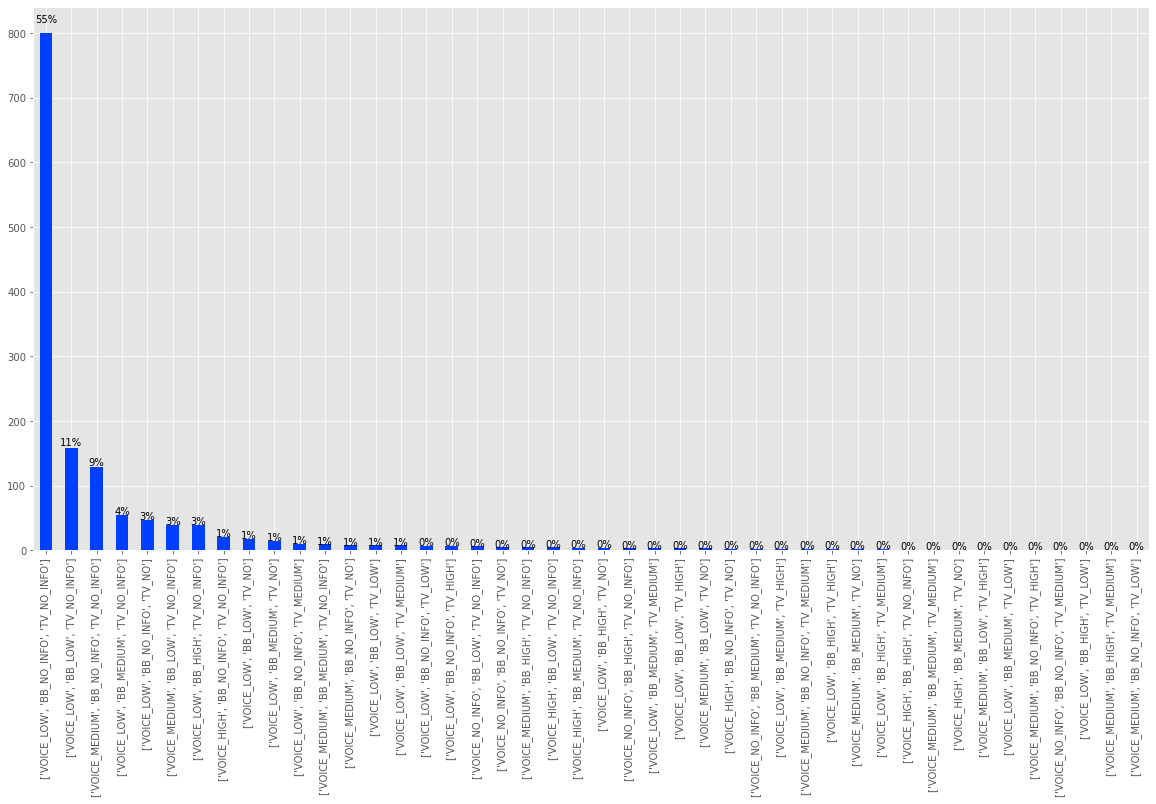

In [26]:
ax =cluster_1[(cluster_1["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [27]:
cluster_1["VOICE_Categorical"].value_counts()

LOW        1191
MEDIUM      202
NO_INFO      49
HIGH         34
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

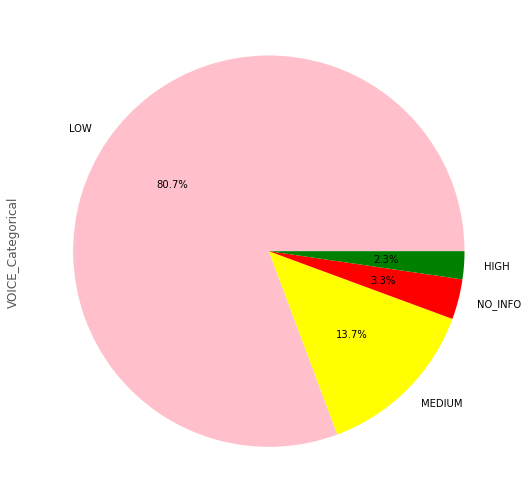

In [122]:
cluster_1["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','red','green'] )

### VOICE VAS Packages

In [29]:
count_dict = dict(cluster_1["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

In [30]:
all_voice_products_dict.pop('V_SLT Voice Service')

1341

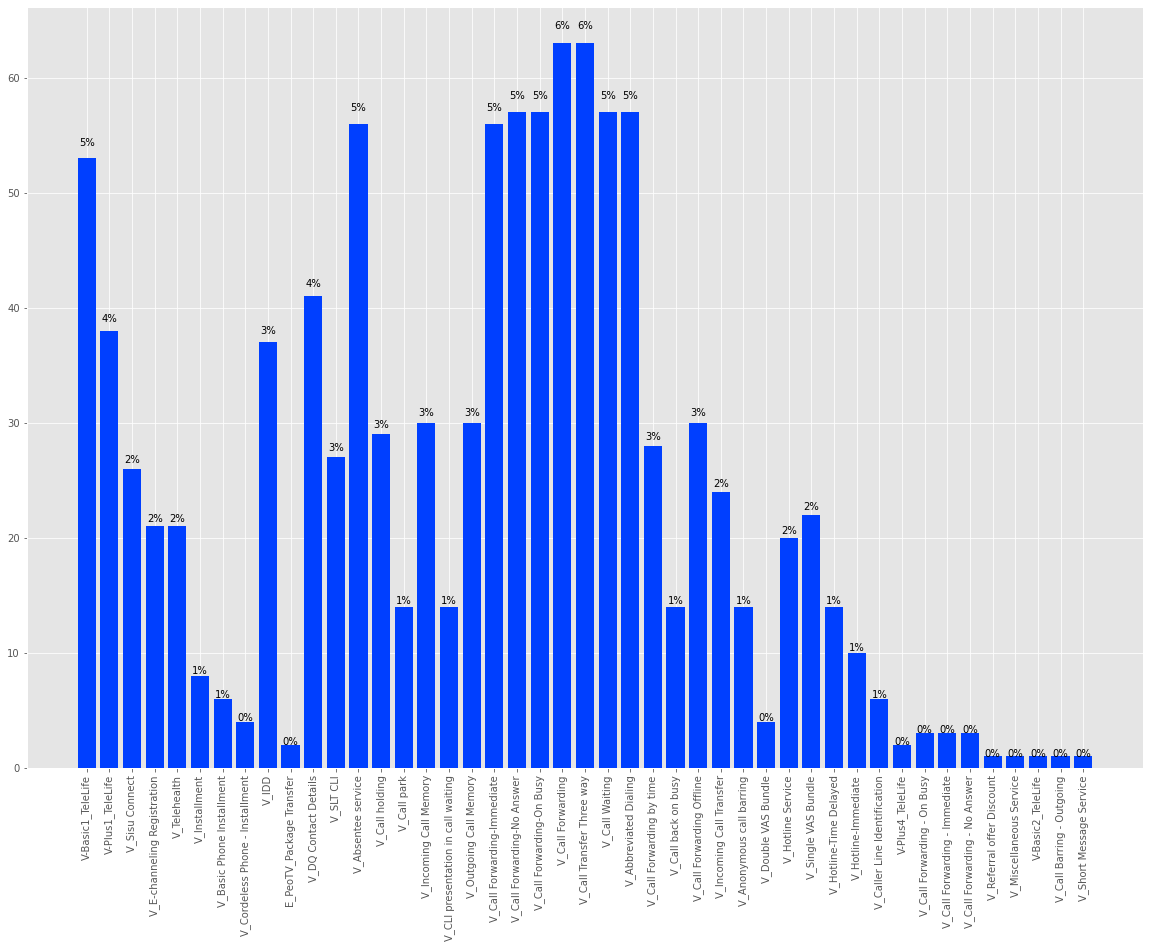

In [31]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [32]:
cluster_1["IDD_Overall_Categorical"].value_counts()

NO_INFO    987
LOW        489
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

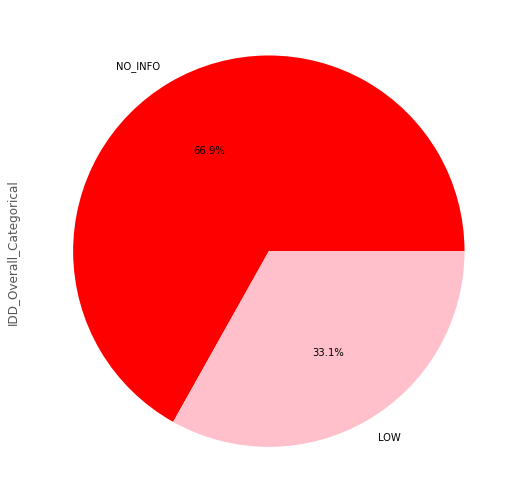

In [123]:
cluster_1["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','green'] )

#### IDD Calling country analysis

In [34]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [35]:
cluster_1_idd_country_df = cluster_1[["event_source.hash","IDD_incoming_country"]]

In [36]:
cluster_1_idd_country_df["IDD_incoming_country"] = cluster_1_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-36-fb17b23ded5f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
cluster_1_idd_country_df = cluster_1_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

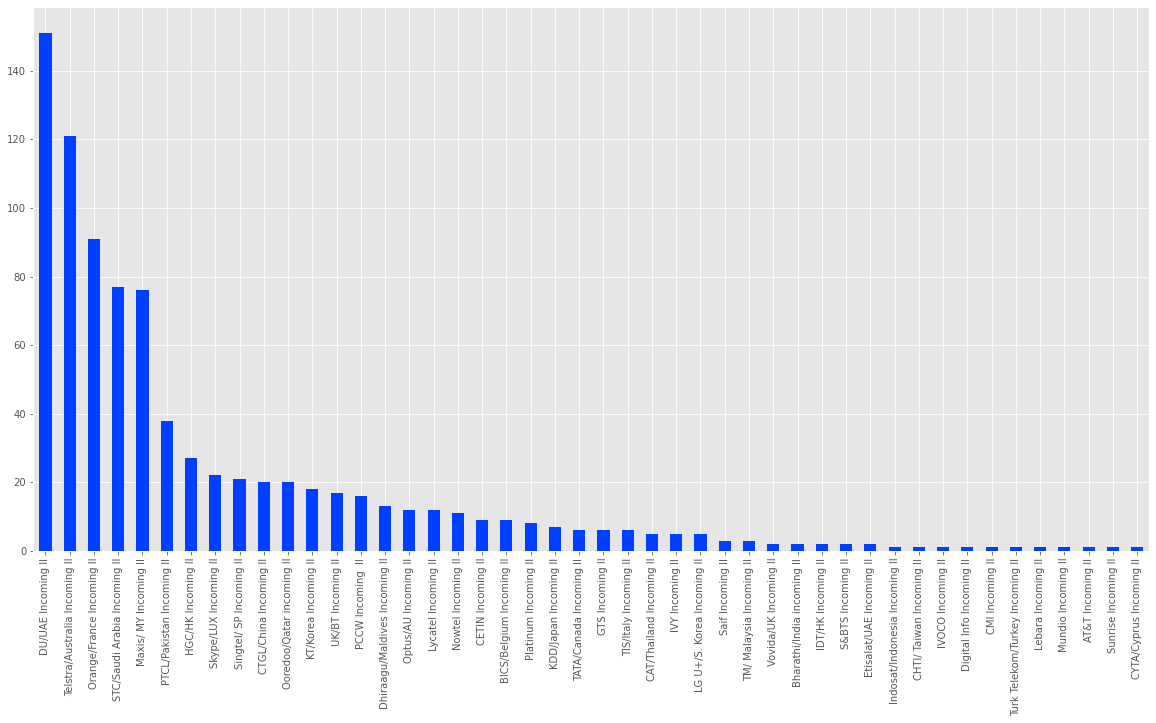

In [38]:
cluster_1_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [39]:
cluster_1_idd_out_country_df = cluster_1[["event_source.hash","IDD_outgoing_country"]]

In [40]:
cluster_1_idd_out_country_df["IDD_outgoing_country"] = cluster_1_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-40-cee6c1f97979>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
cluster_1_idd_out_country_df = cluster_1_idd_out_country_df.explode("IDD_outgoing_country")

In [42]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [43]:
cluster_1_idd_out_country_df["IDD_outgoing_country"] = cluster_1_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

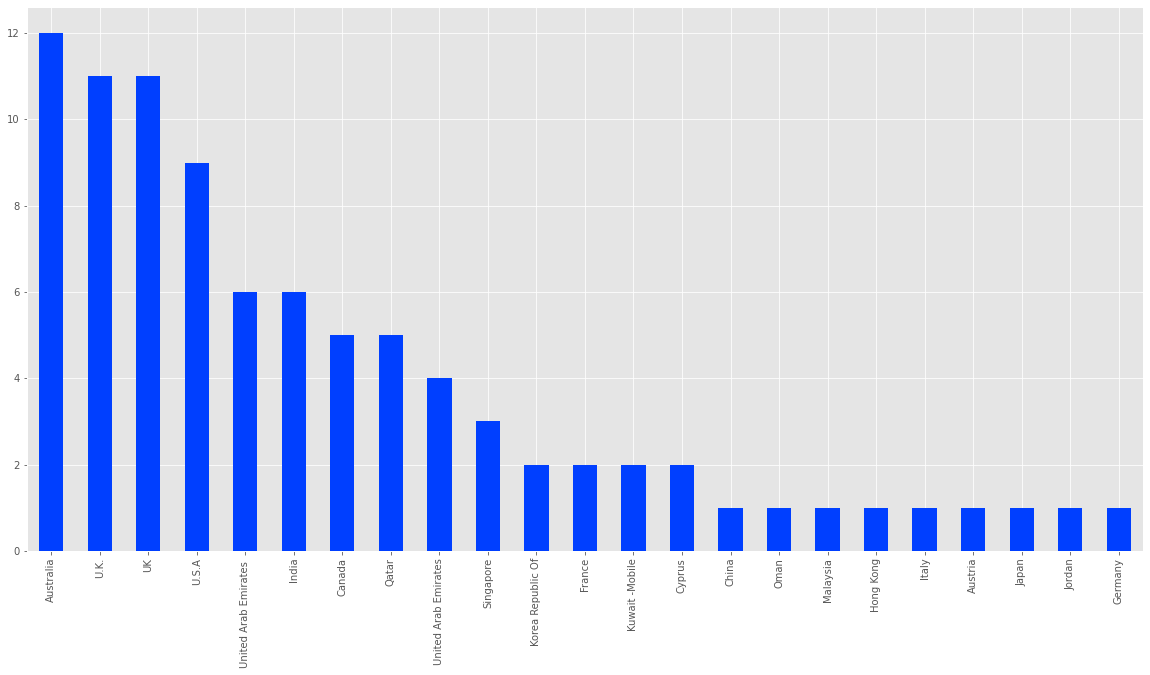

In [44]:
cluster_1_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

In [45]:
cluster_1["IDD_outgoing_Cumulative_Revenue"].value_counts()

46334.0     1
199268.0    1
79167.0     1
6900.0      1
688683.0    1
           ..
16567.0     1
23335.0     1
23928.0     1
25000.0     1
2080.0      1
Name: IDD_outgoing_Cumulative_Revenue, Length: 74, dtype: int64

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [46]:
cluster_1["PEO_TV_Categorical"].value_counts()

NO_INFO    1309
NO          105
MEDIUM       28
LOW          18
HIGH         16
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 1

<AxesSubplot:ylabel='PEO_TV_Categorical'>

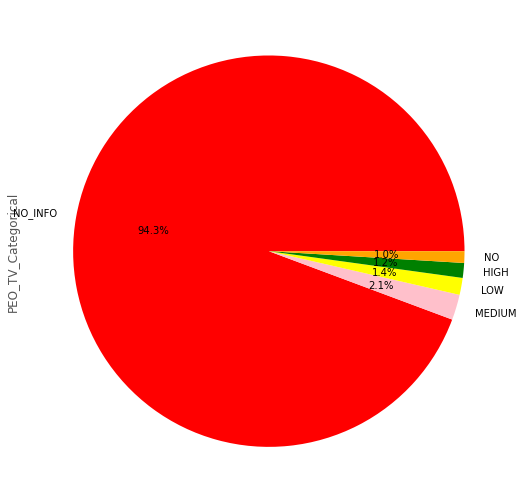

In [47]:
cluster_1_peo = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY")]
cluster_1_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green','orange'])

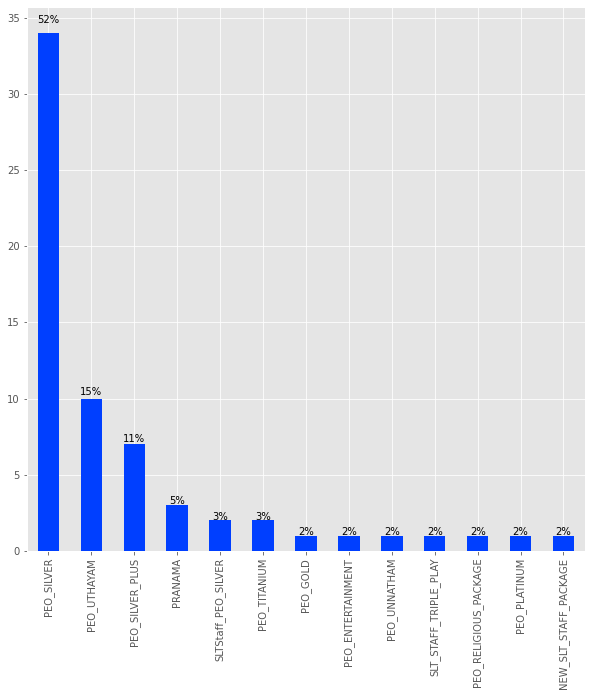

In [48]:
ax =cluster_1_peo[(cluster_1_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 1

<AxesSubplot:ylabel='PEO_TV_Categorical'>

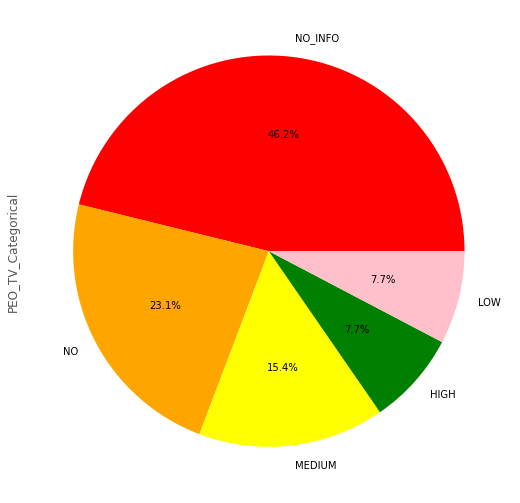

In [49]:
cluster_1_peo_pv = cluster_1[(cluster_1["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_1_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','orange','yellow','green','pink'])

In [50]:
cluster_1_peo_pv["PEO_TV_Categorical"].value_counts()

NO_INFO    12
NO          6
MEDIUM      4
HIGH        2
LOW         2
Name: PEO_TV_Categorical, dtype: int64

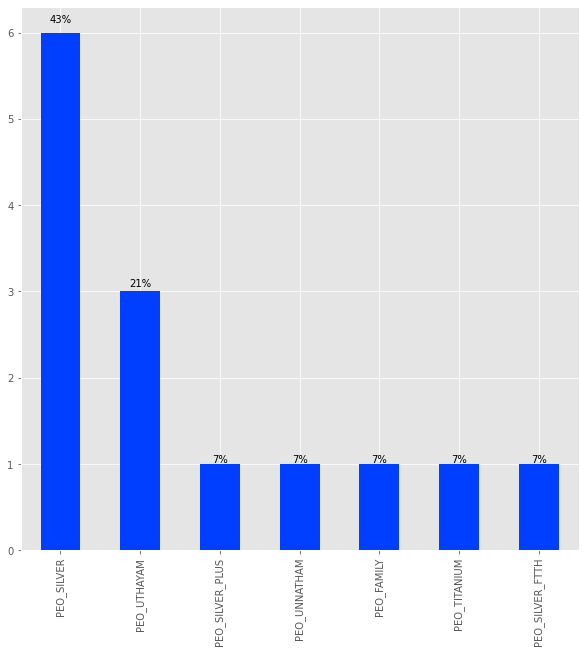

In [51]:
ax =cluster_1_peo_pv[(cluster_1_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [52]:
count_dict = dict(cluster_1["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

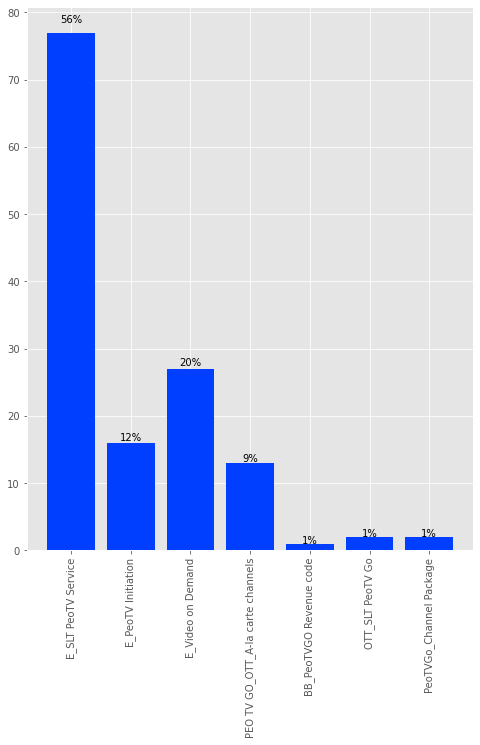

In [53]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [54]:
cluster_1["BB_Categorical"].value_counts()

NO_INFO    1074
LOW         250
MEDIUM       94
HIGH         58
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

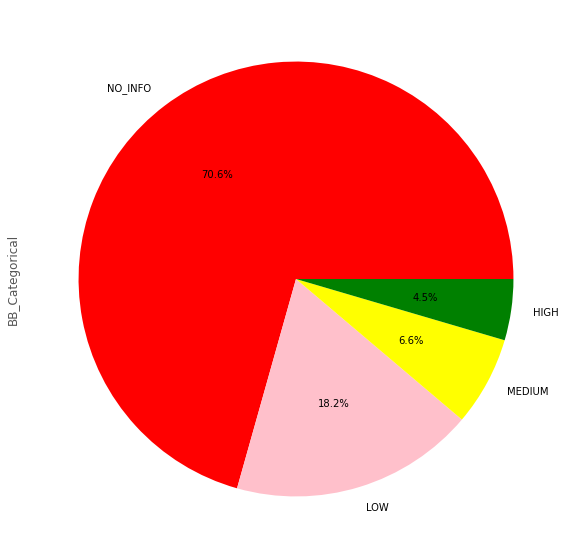

In [55]:
cluster_1_bb = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY")]
cluster_1_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

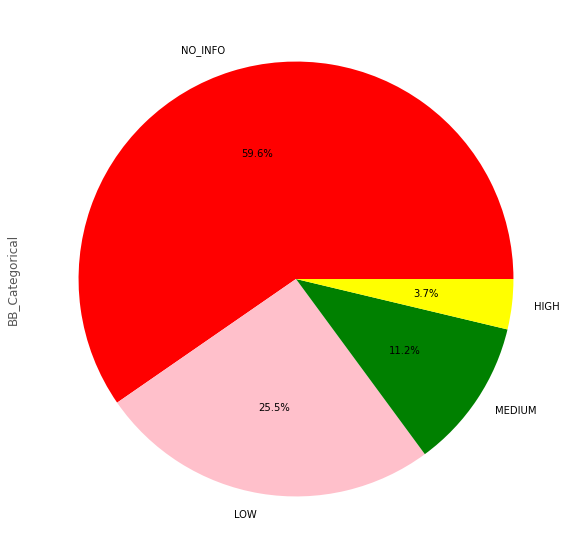

In [56]:
cluster_1_bb_dp = cluster_1[(cluster_1["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_1_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [57]:
count_dict = dict(cluster_1["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

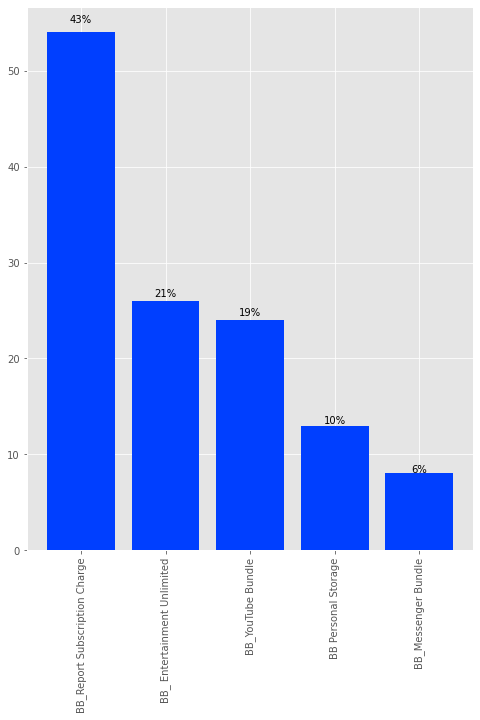

In [58]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [59]:
extra_gb_freq_users = cluster_1[(cluster_1["BB_Extra_GB_Purchased_Times"]>10.0)]

In [60]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

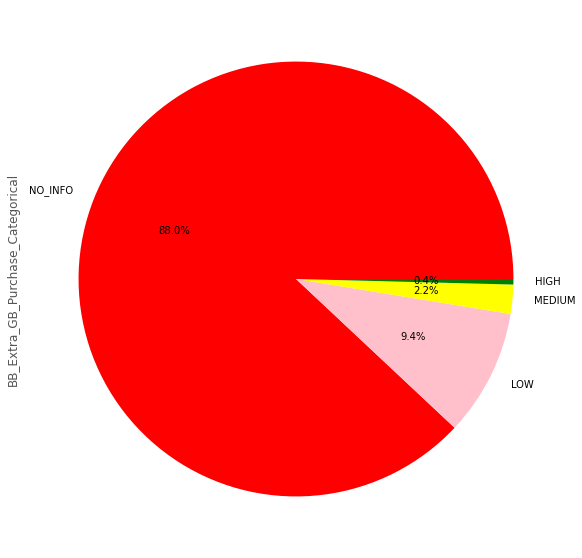

In [61]:
cluster_1["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '9ee435f8b188ee7090071c34accc81b7'),
 Text(1, 0, '730f59a2f7e084f3998de4c87e53154c'),
 Text(2, 0, '491c706a7512c044872648b069944e64'),
 Text(3, 0, '49a06f31bfefceb0ac8c3e94c840f370'),
 Text(4, 0, '616f52dd7dd7ce336f3f54c35feeac07'),
 Text(5, 0, '921b3d510c7a37d94c57415b9f71a533'),
 Text(6, 0, '40cacd54f90858c1b7fac3a8770c0e55'),
 Text(7, 0, 'dd95abce9d8097e123dda36b8cff245a'),
 Text(8, 0, '38ccafcf5870fa6c61f46fc81e565849'),
 Text(9, 0, 'bcd5d6cbc86680597749c0d41a10f5a7'),
 Text(10, 0, '39ea209b333e2e533f7914f4d9334372'),
 Text(11, 0, '568fe81610eed726dc86c14753d98ba6'),
 Text(12, 0, '2ed52cc54cf801c4b4b0f2a5143f7ade'),
 Text(13, 0, '2a150b56009b08ae587c7fdca323dbb0'),
 Text(14, 0, '14f4dd0e01e6e3e2e95898944e325afe'),
 Text(15, 0, '4e772b4a1d242c094ac1a51cb87df5a2'),
 Text(16, 0, 'bd6166f29cdd1d521ffc6aa223b0c2ba'),
 Text(17, 0, '63396a7fa8bbb7c5ecdad57676beb088'),
 Text(18, 0, '9958e2d5975774299cab39ed392a05f1'),
 Text(19, 0, '66d27658a66d208990a71c86a5994303'),
 Text(20, 

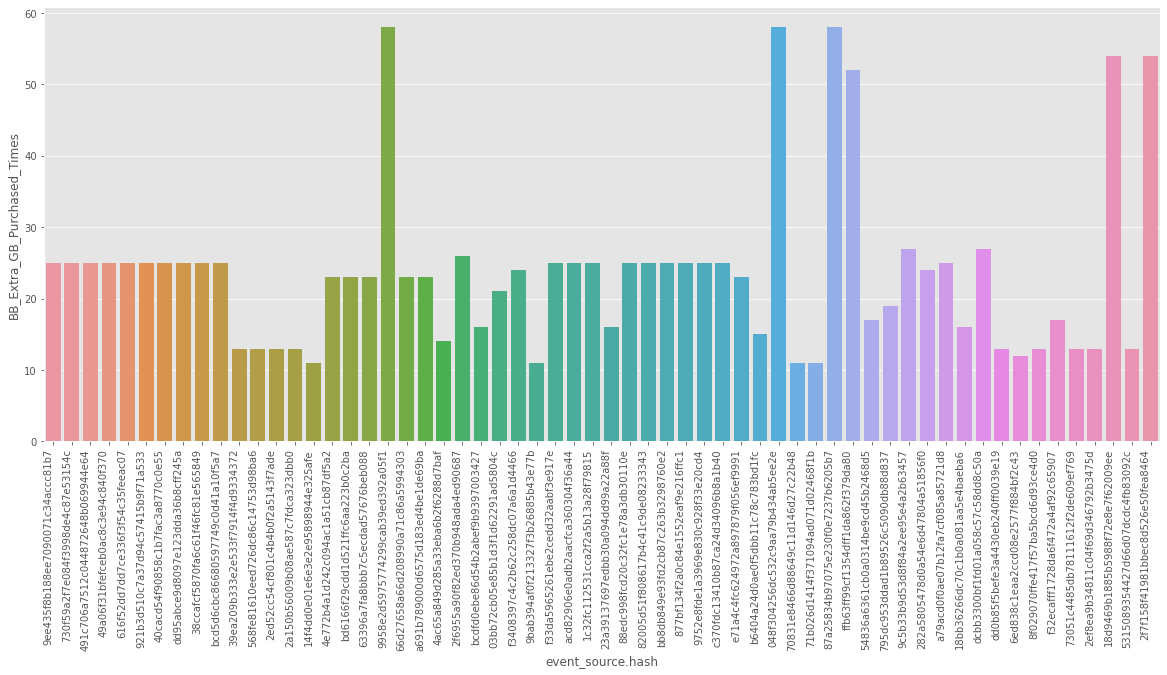

In [62]:
plt.figure(figsize=(20,8))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Times')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

<ipython-input-63-fb2918c10f64>:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



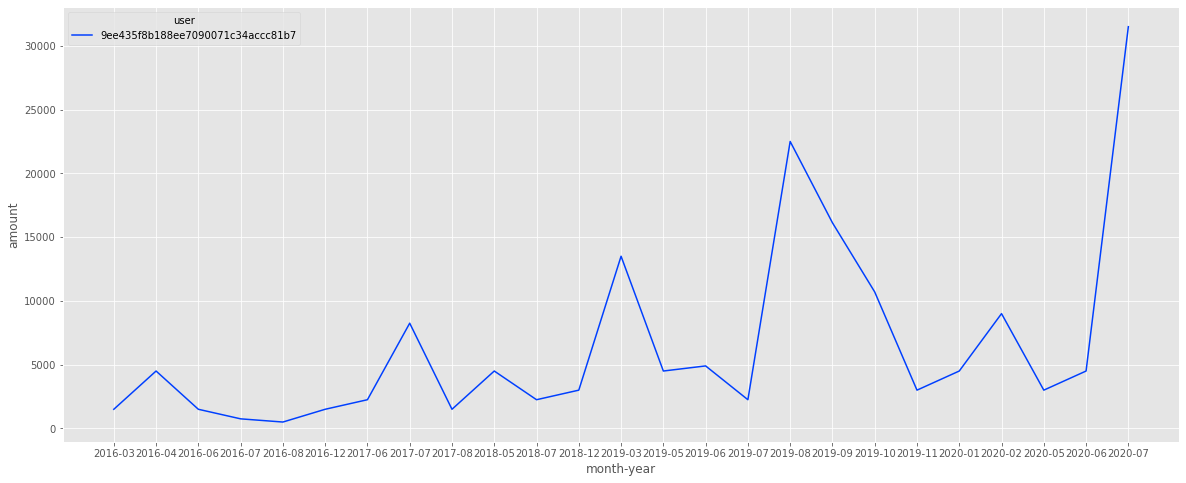

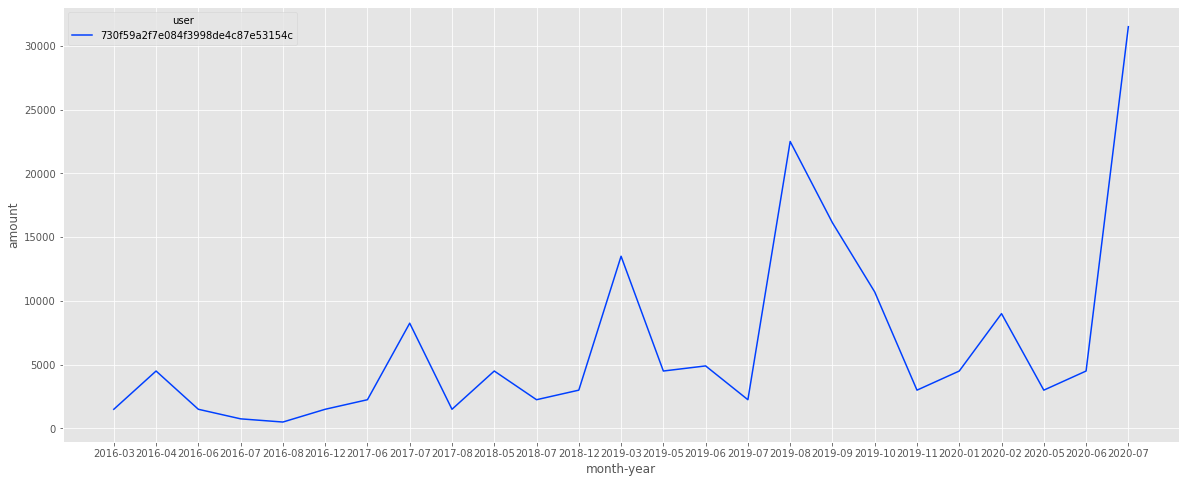

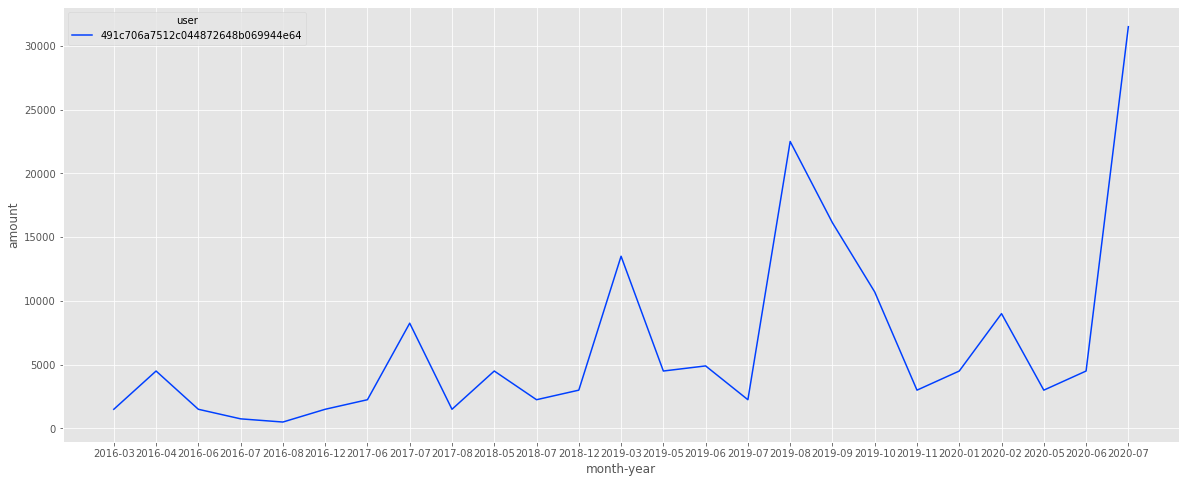

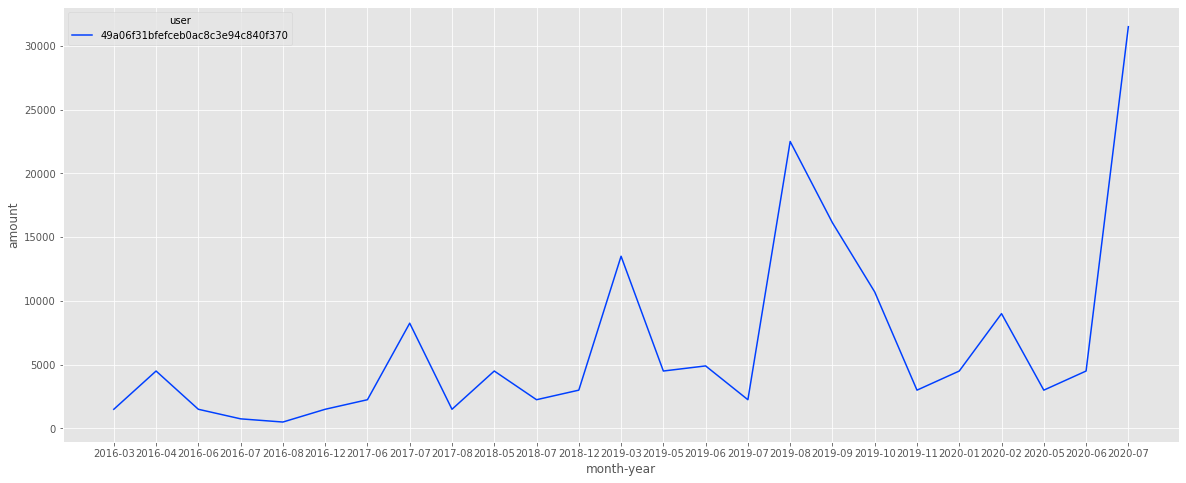

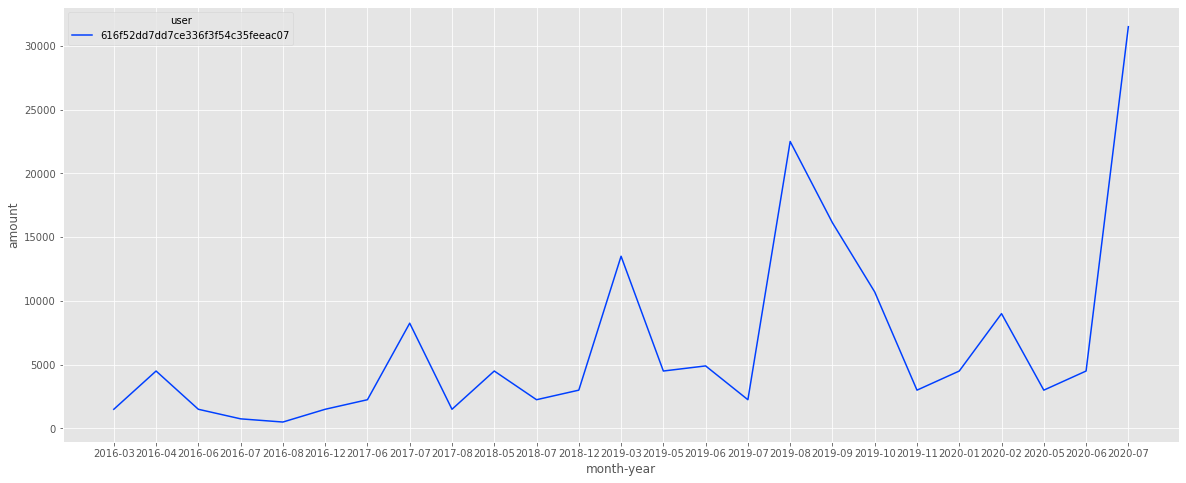

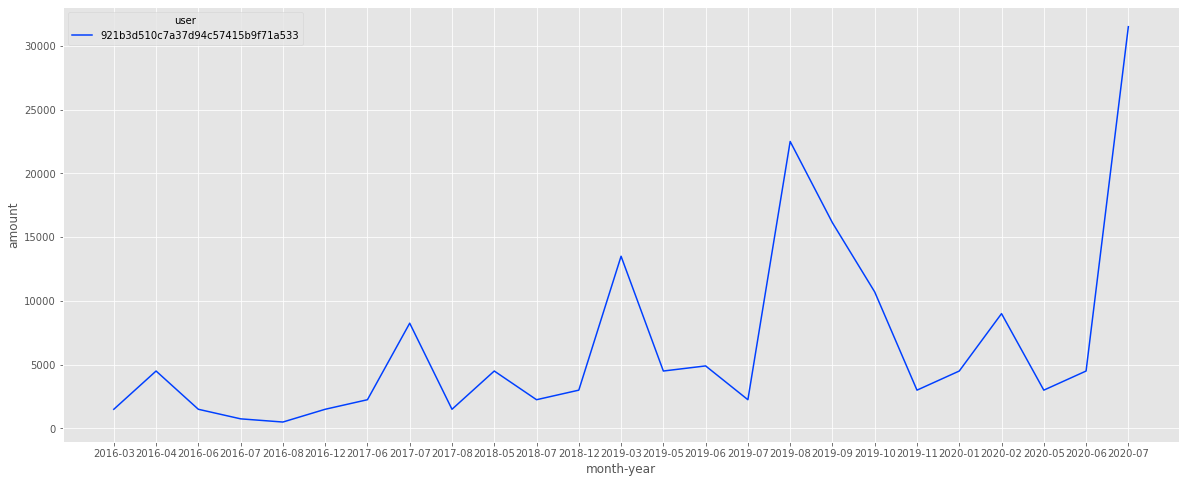

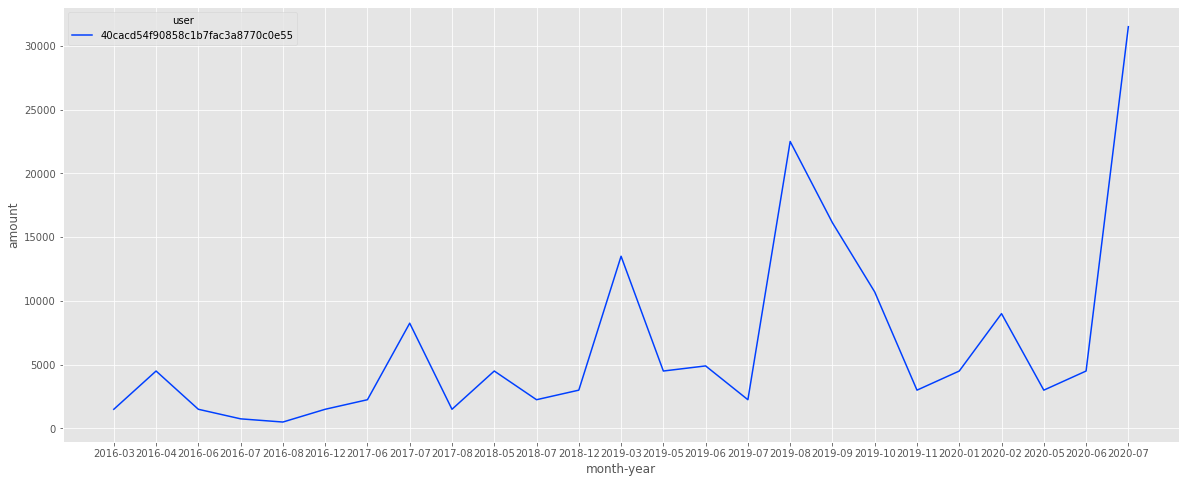

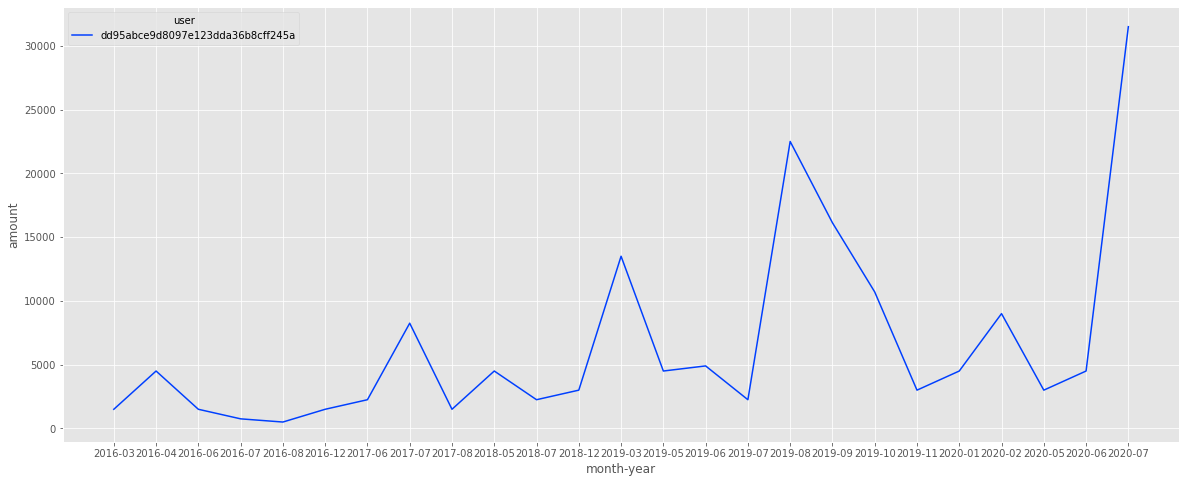

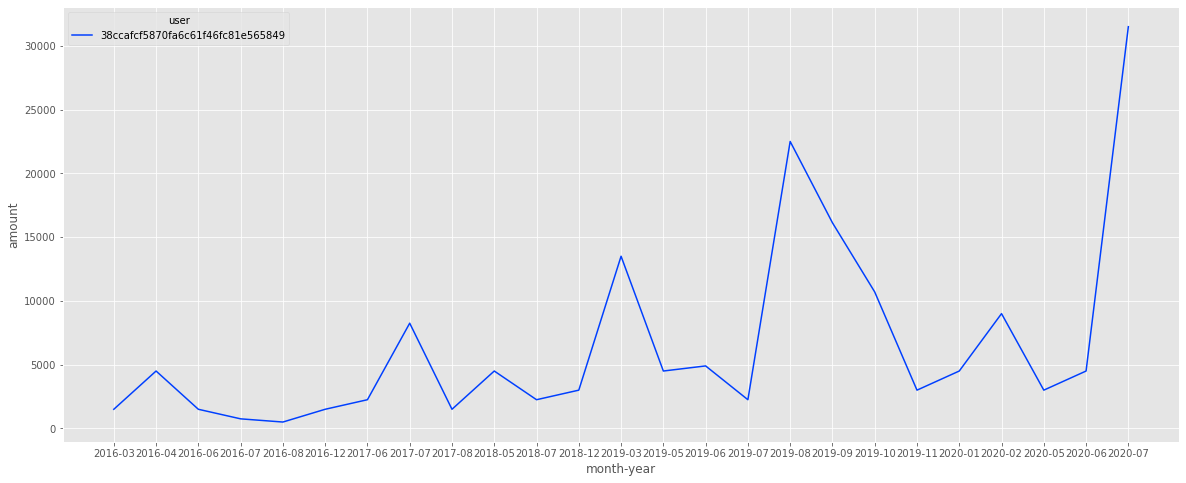

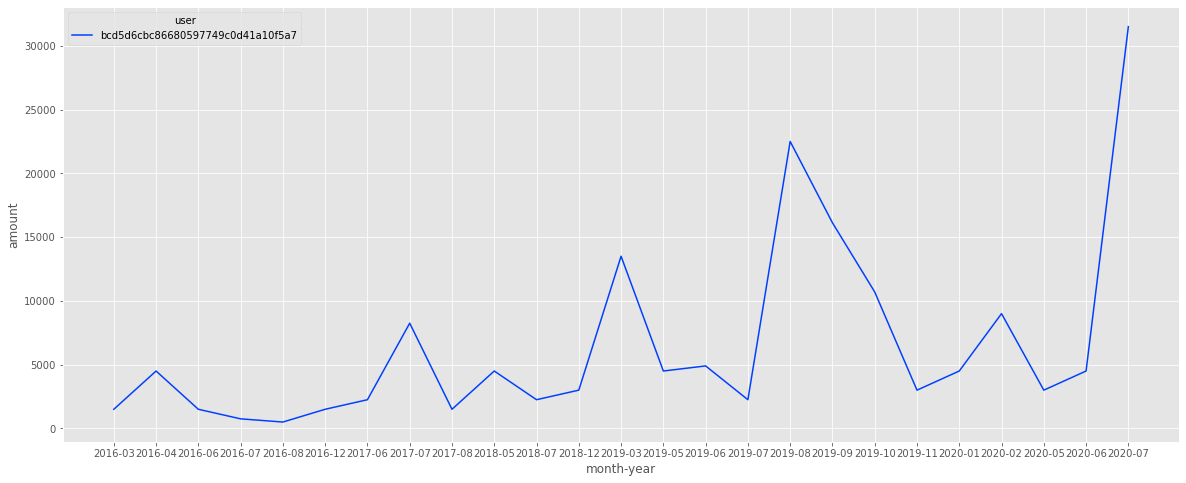

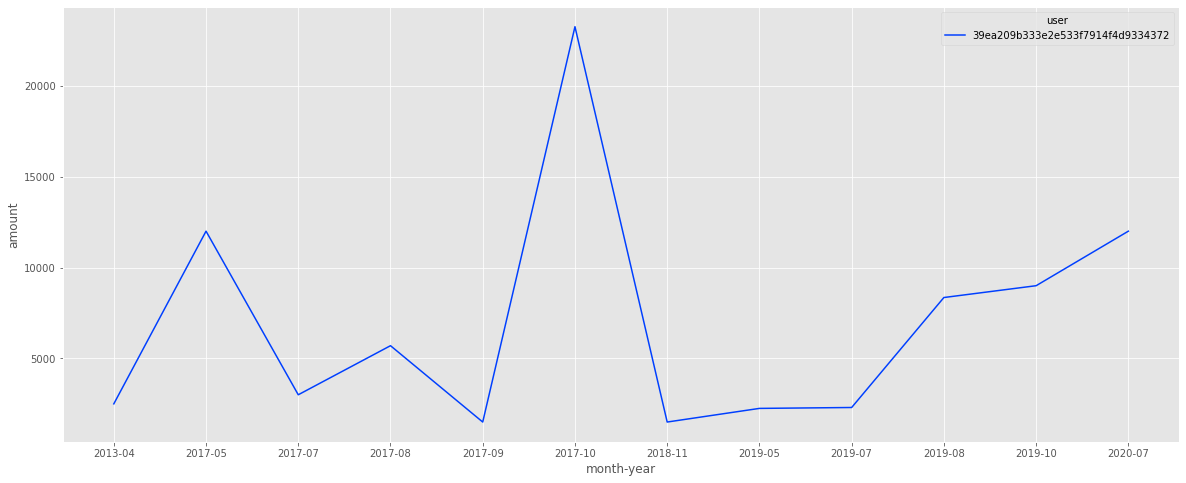

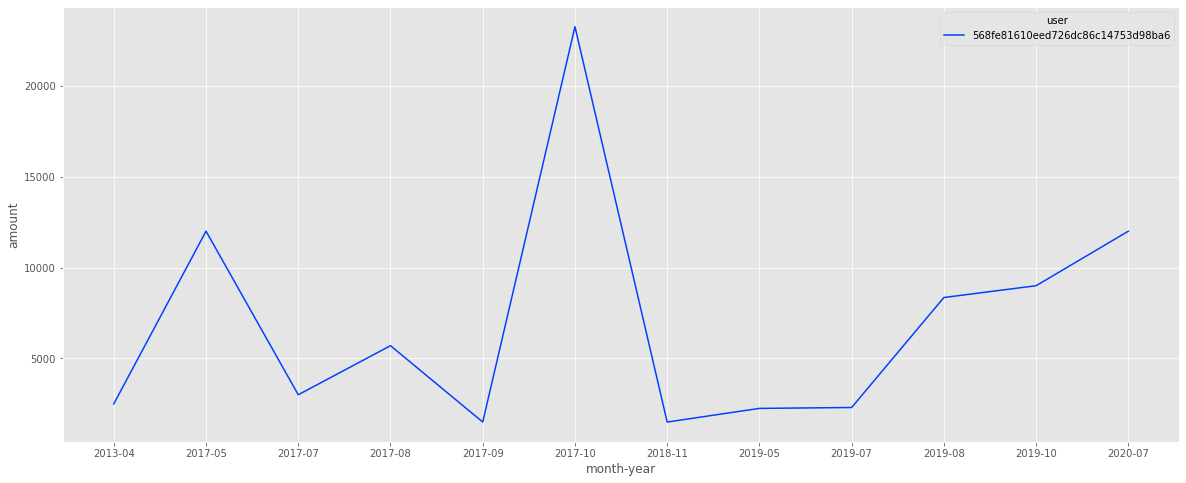

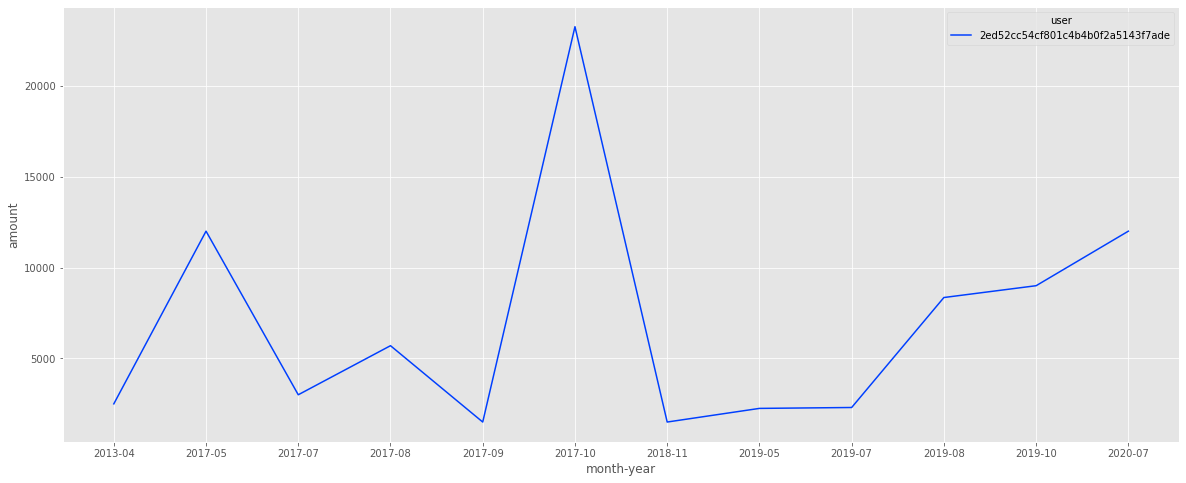

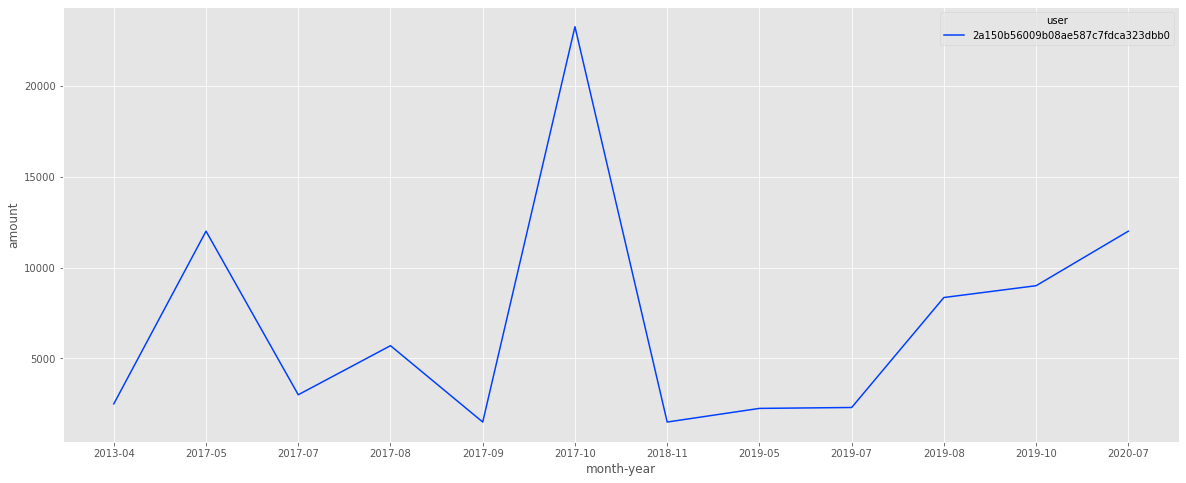

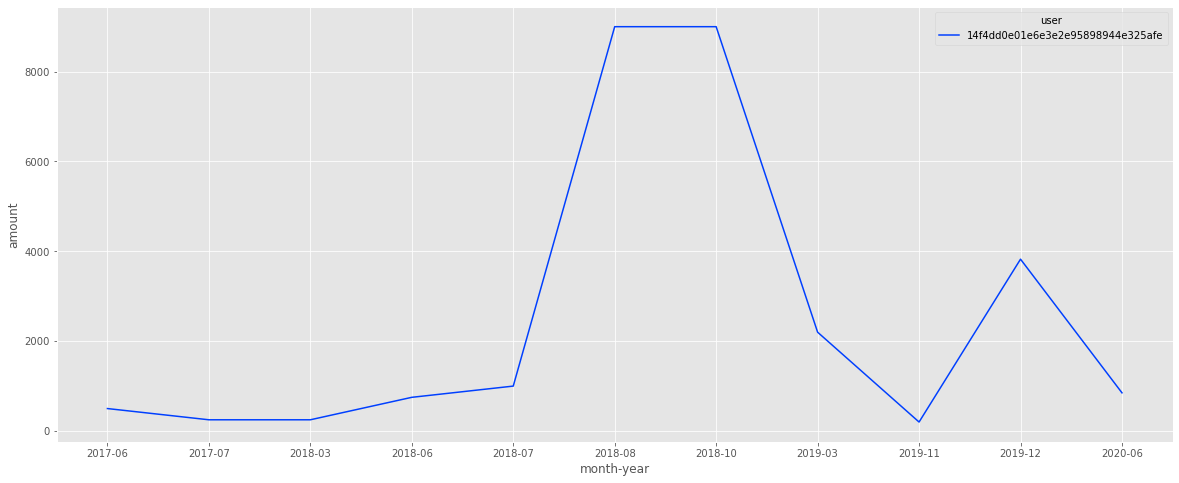

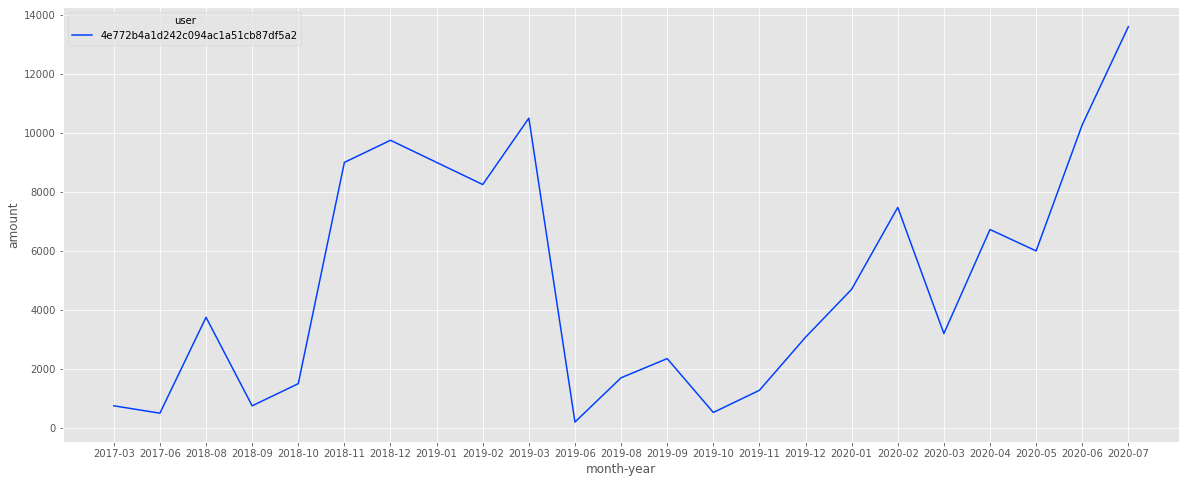

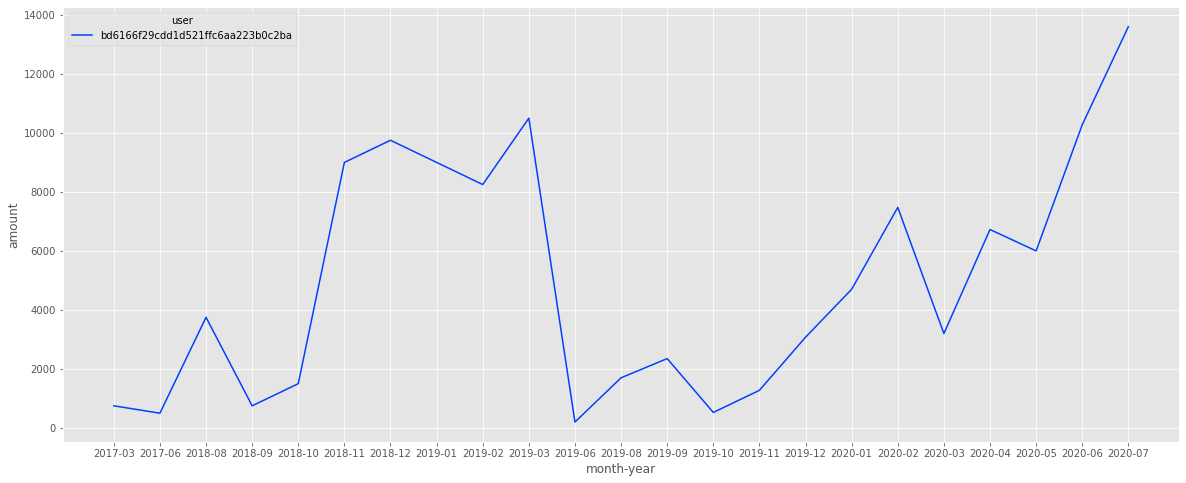

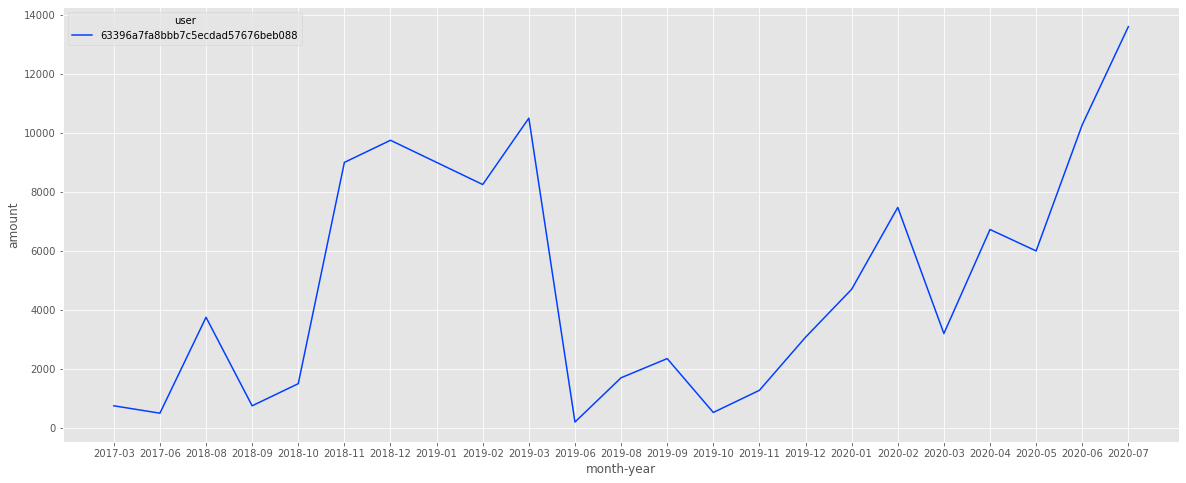

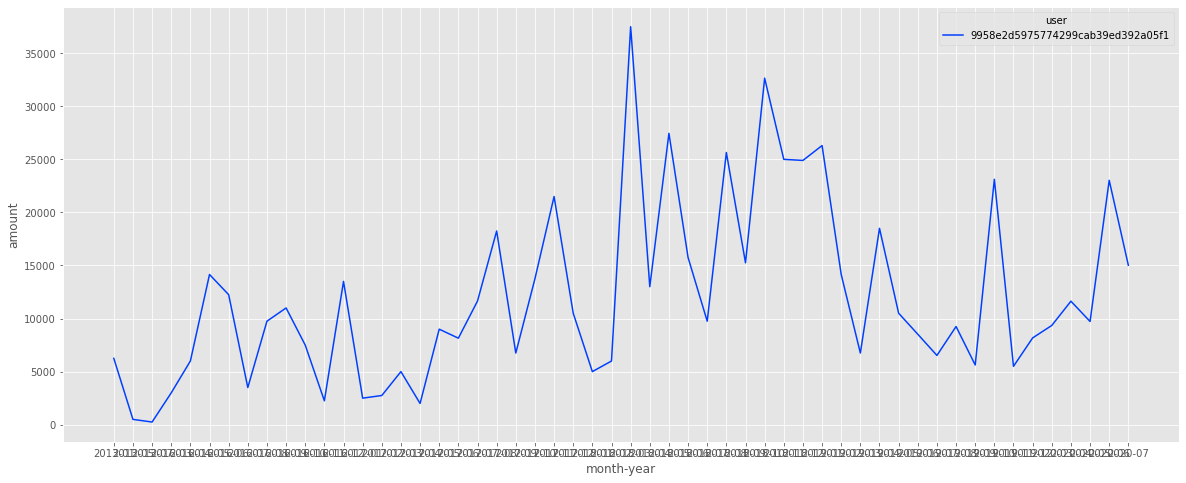

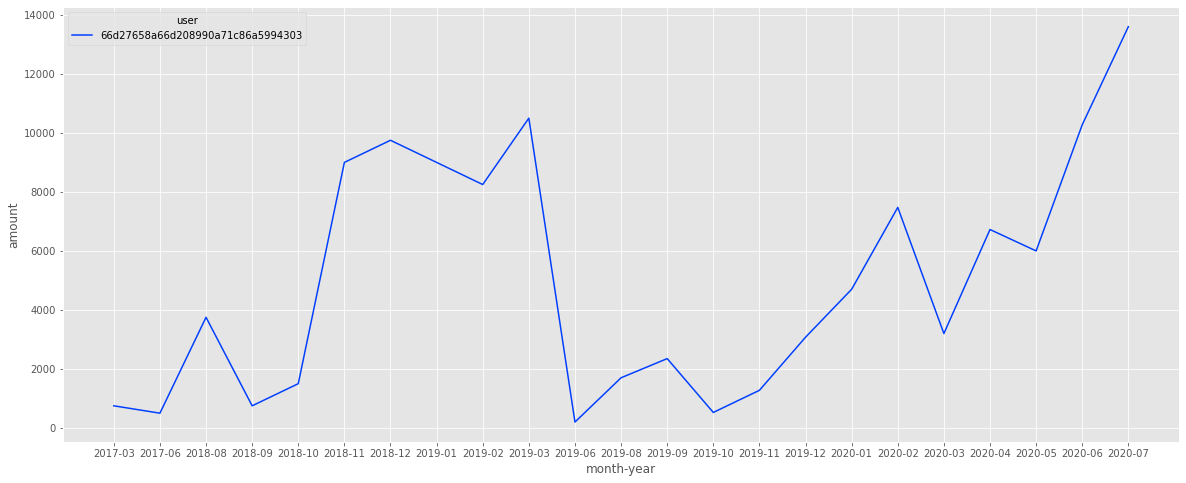

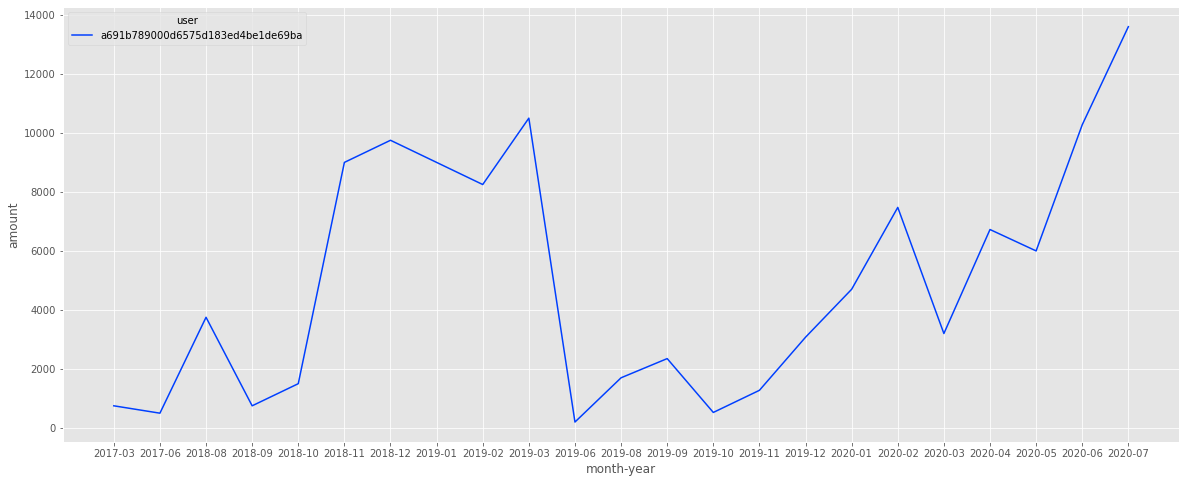

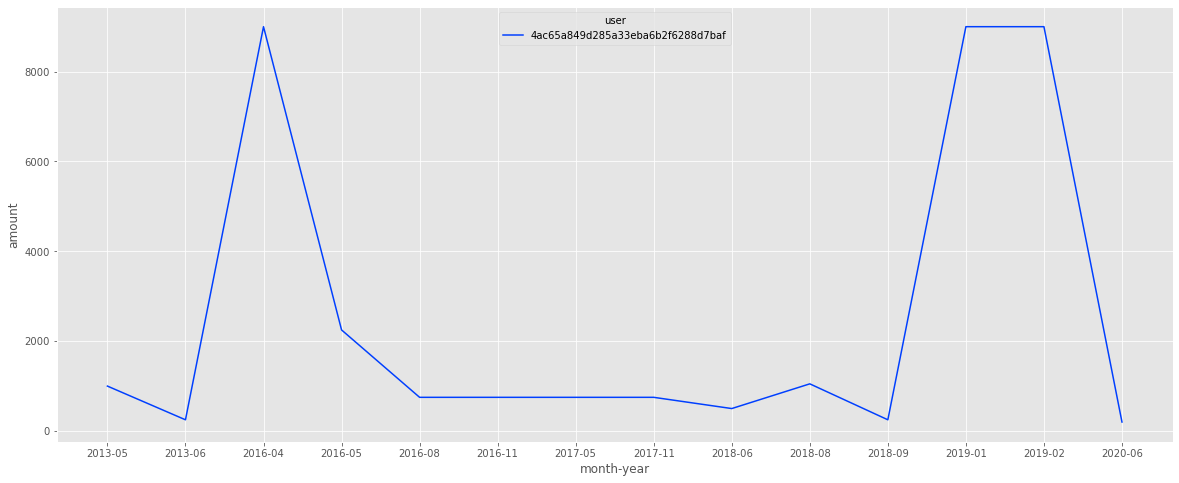

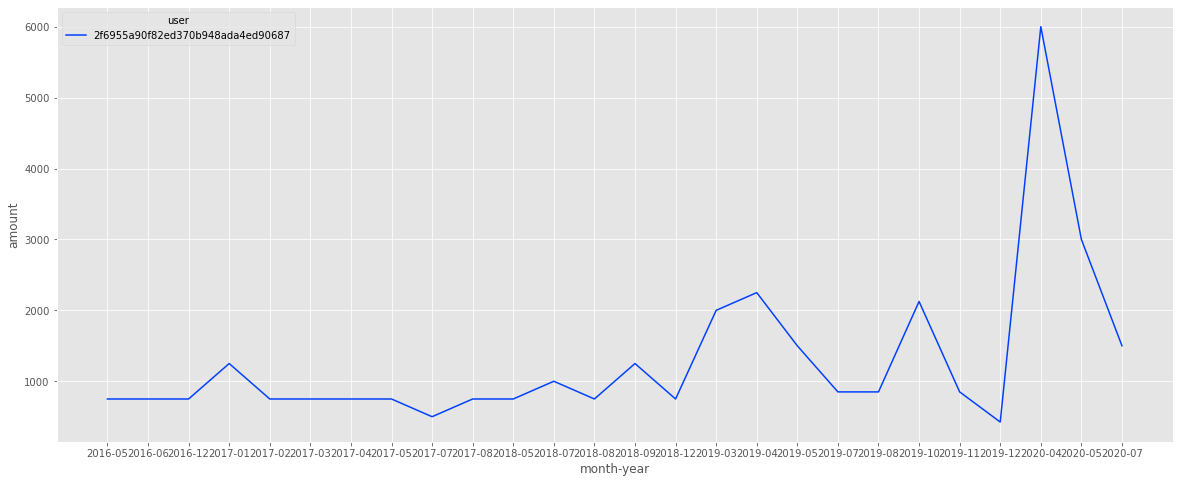

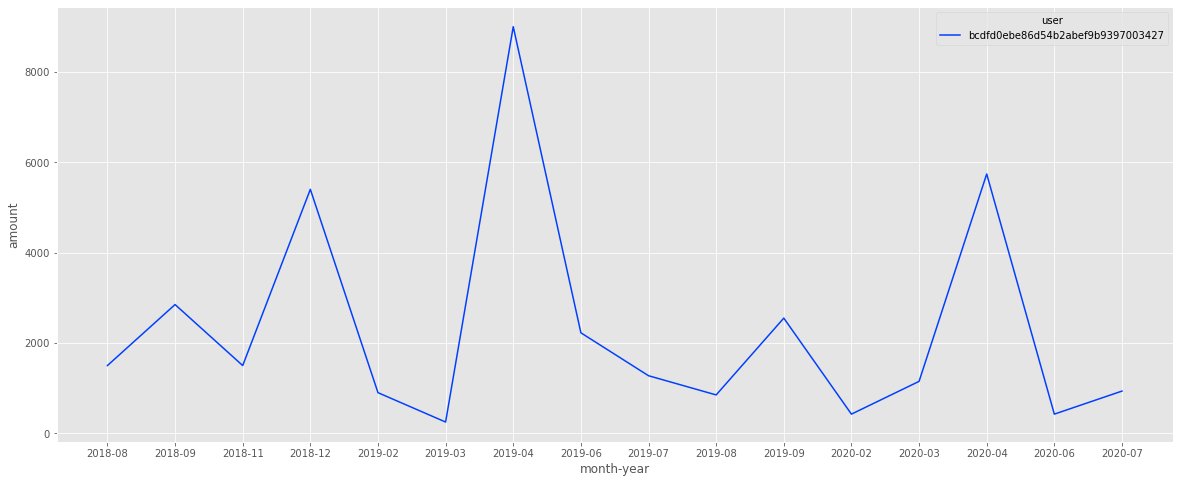

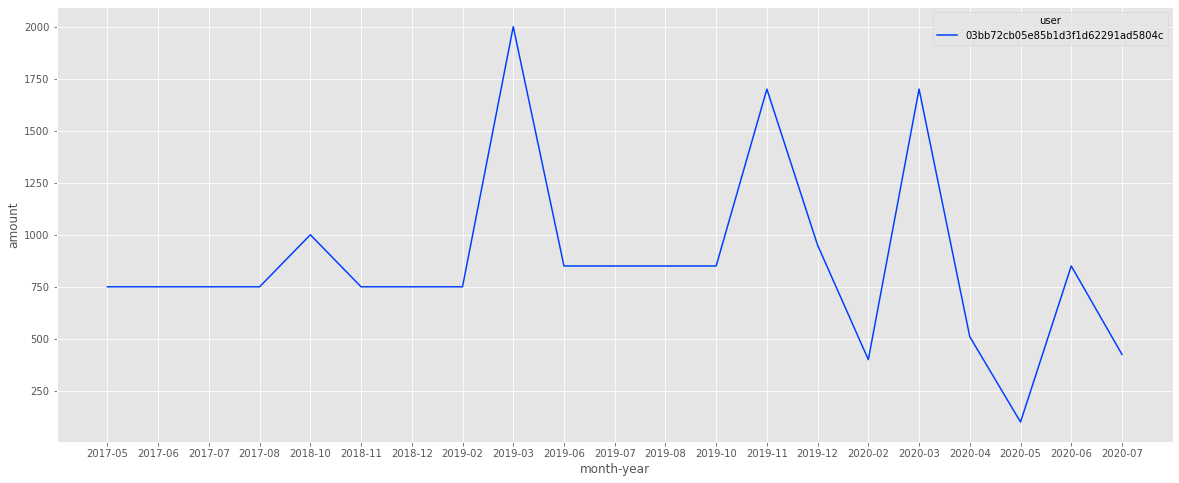

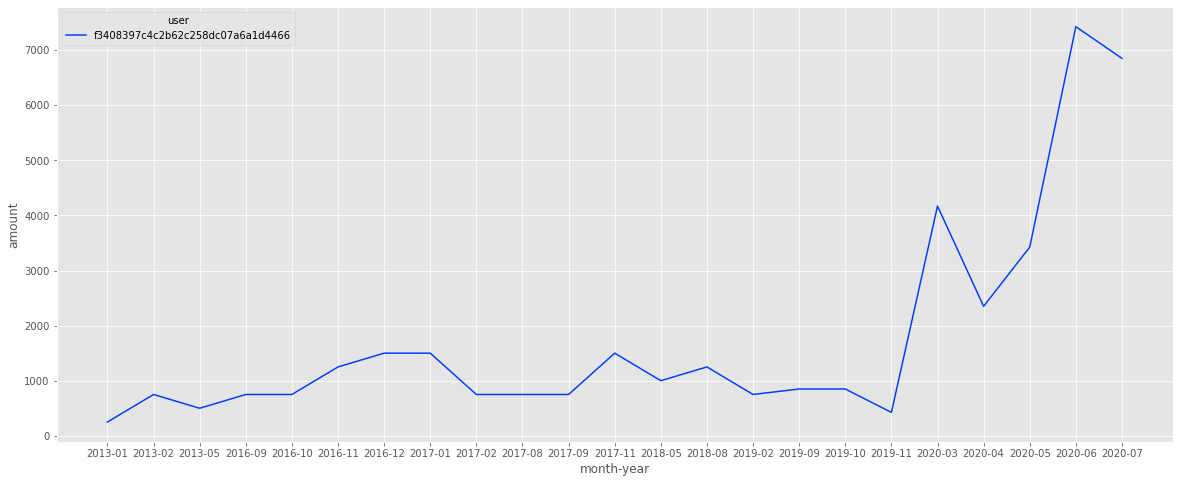

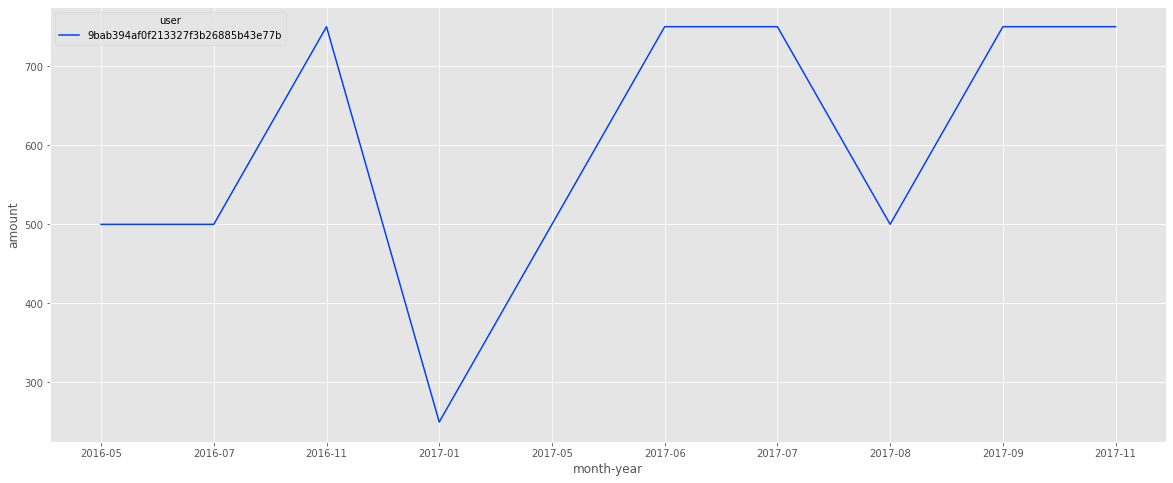

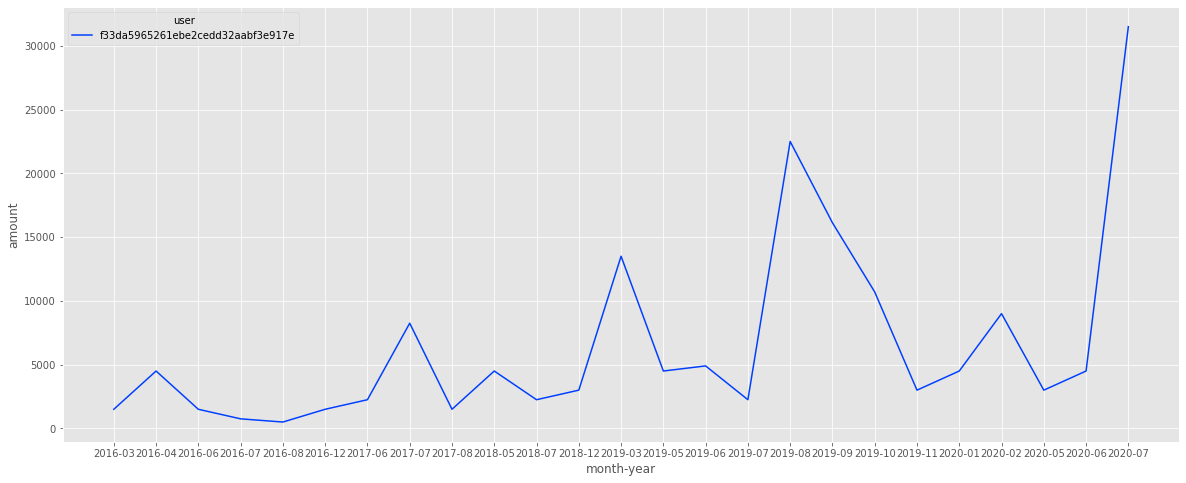

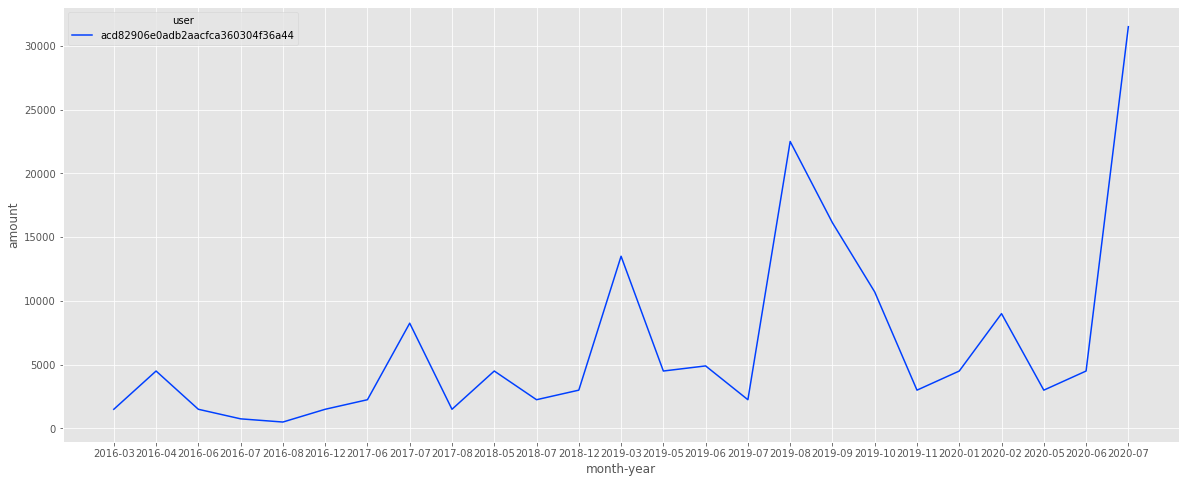

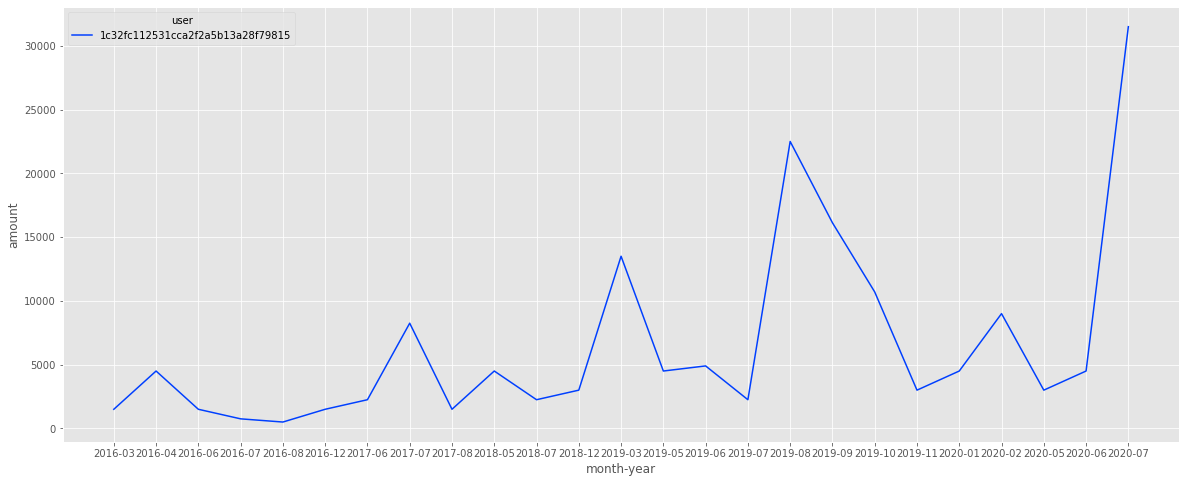

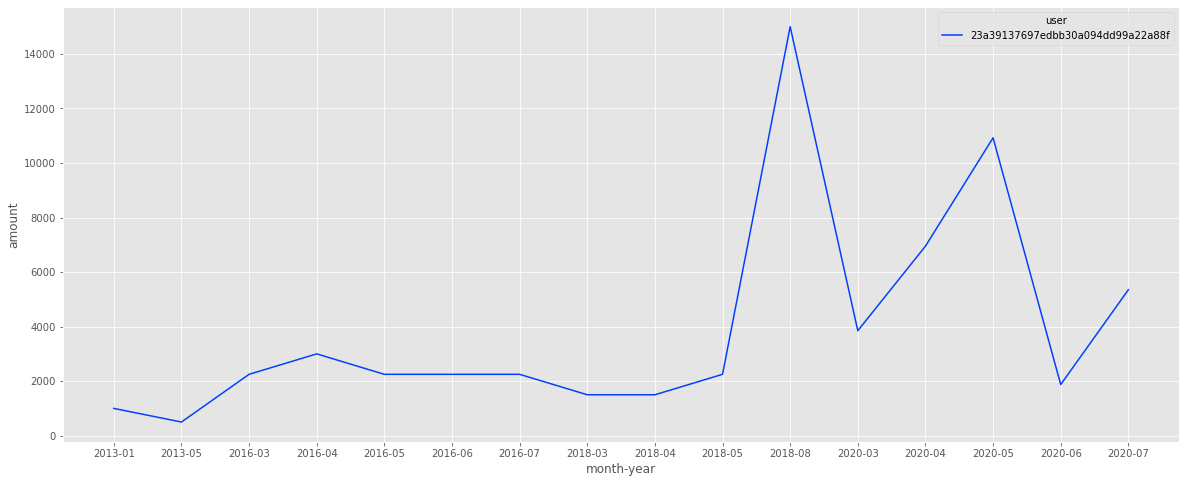

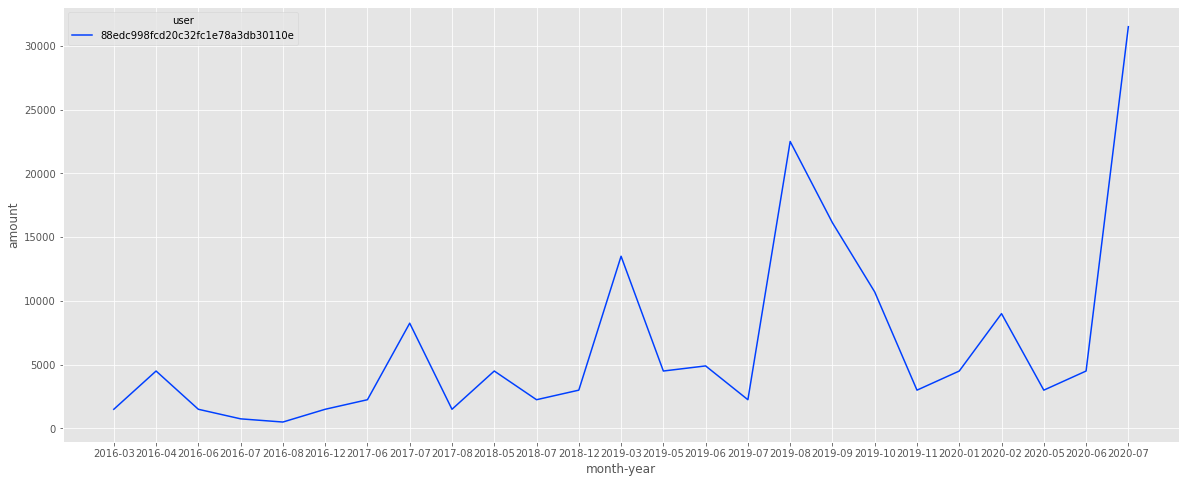

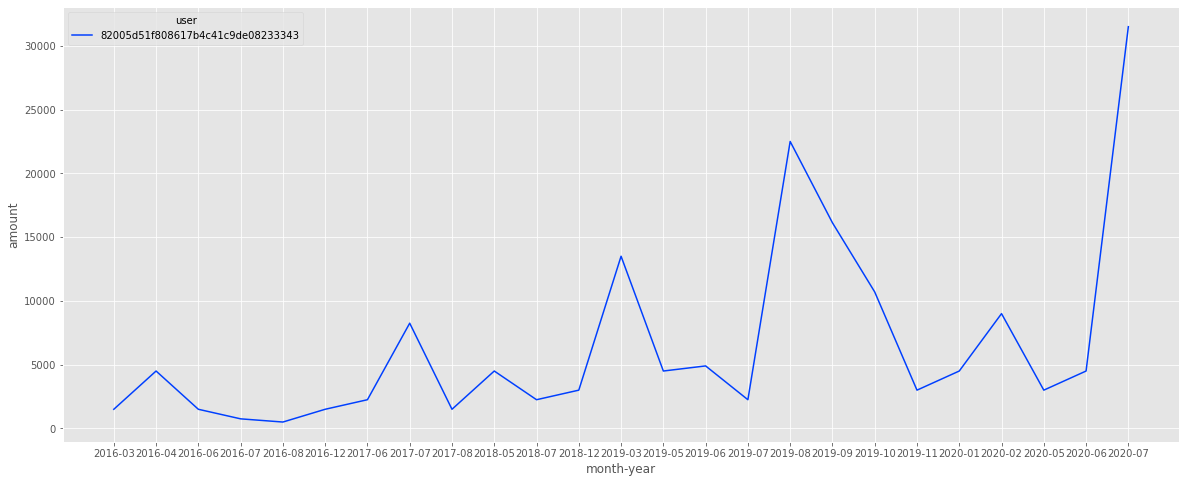

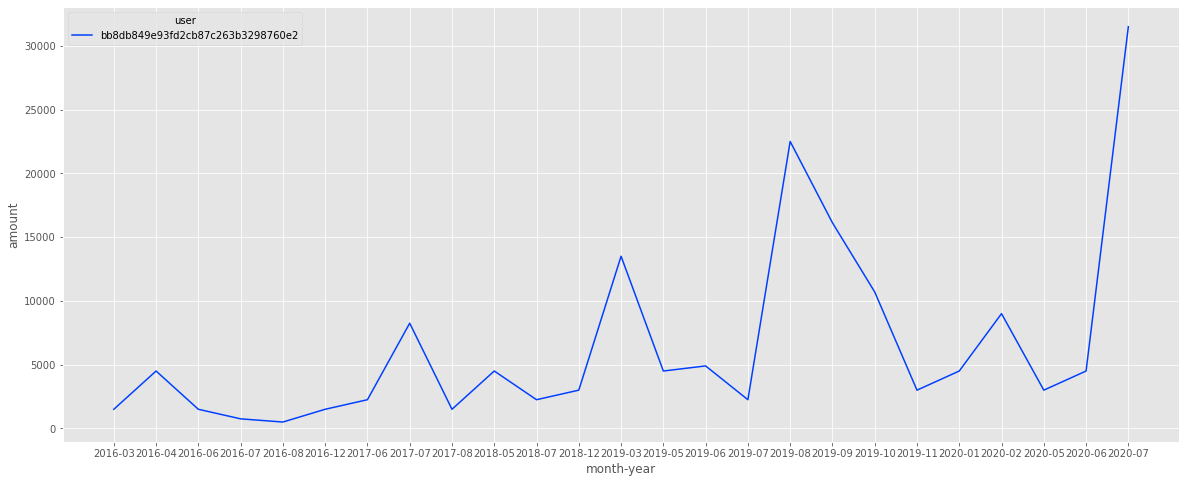

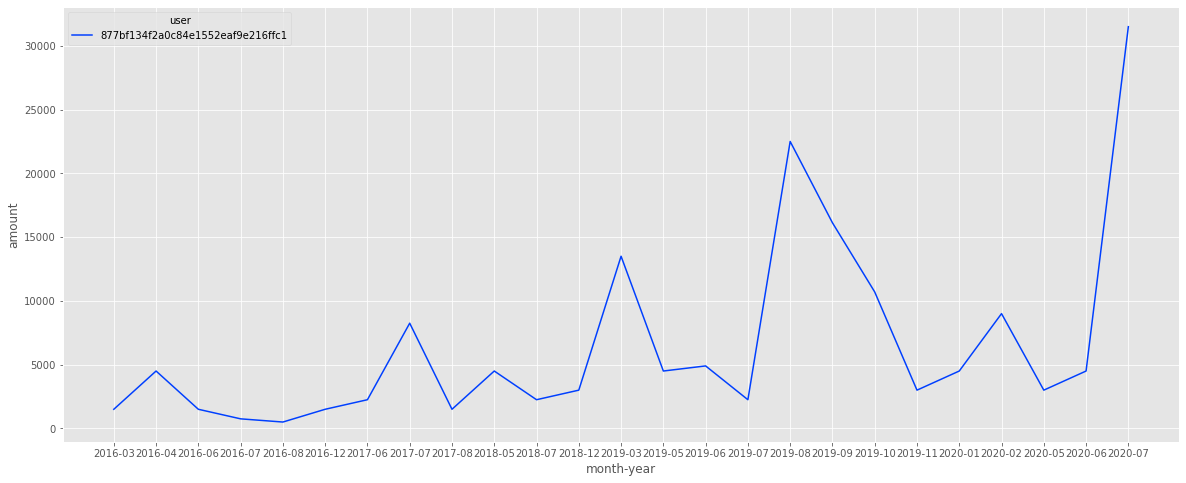

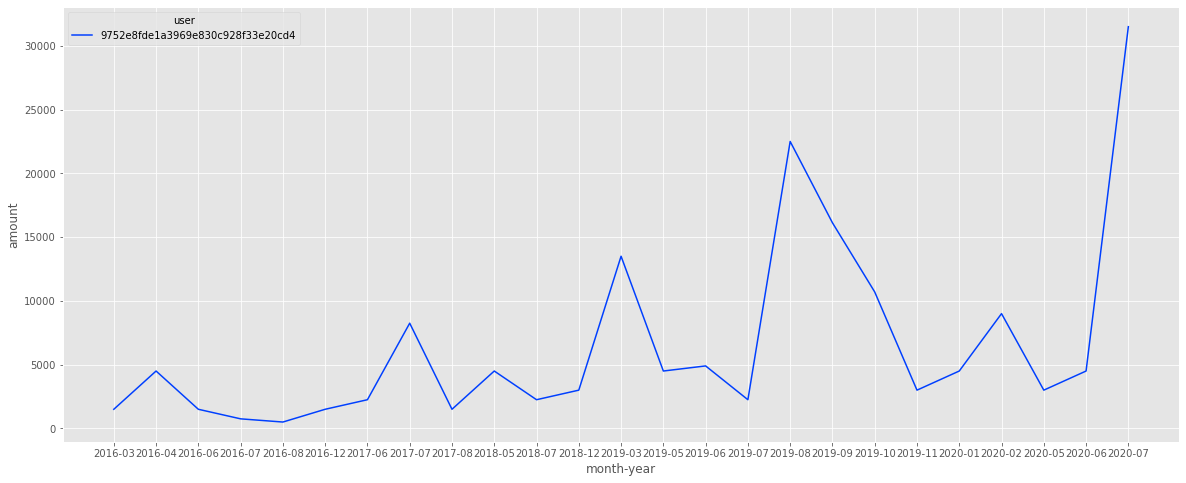

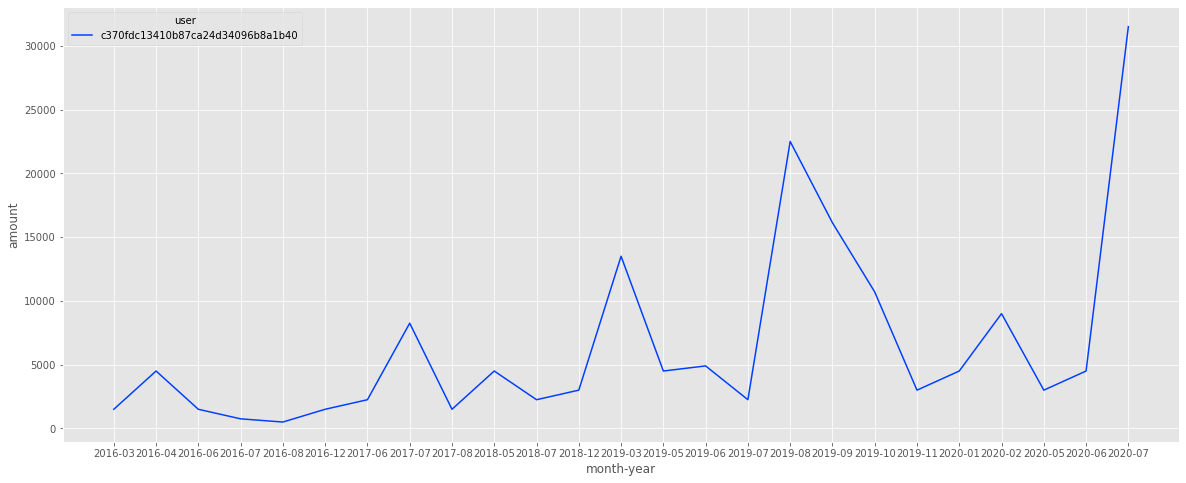

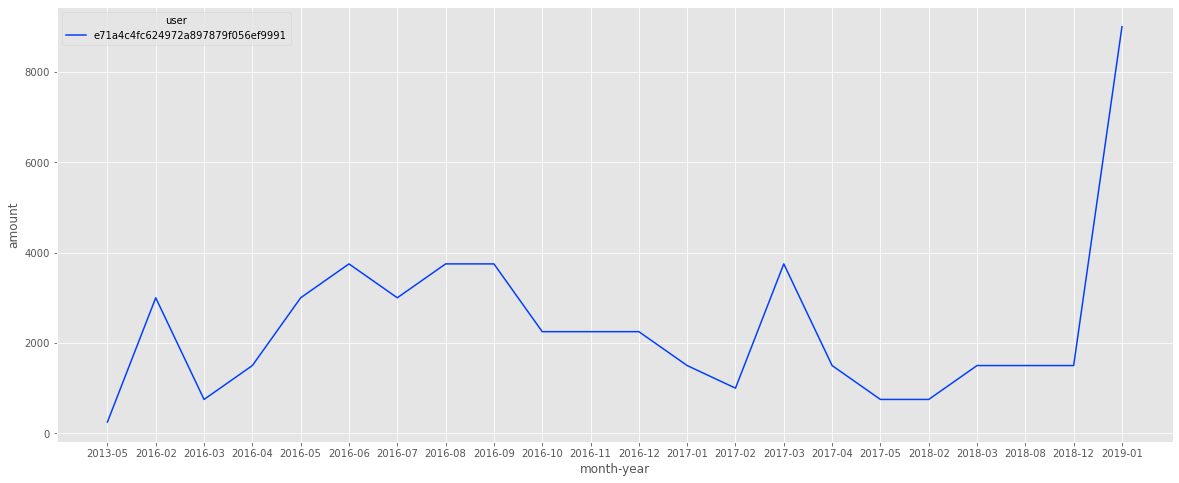

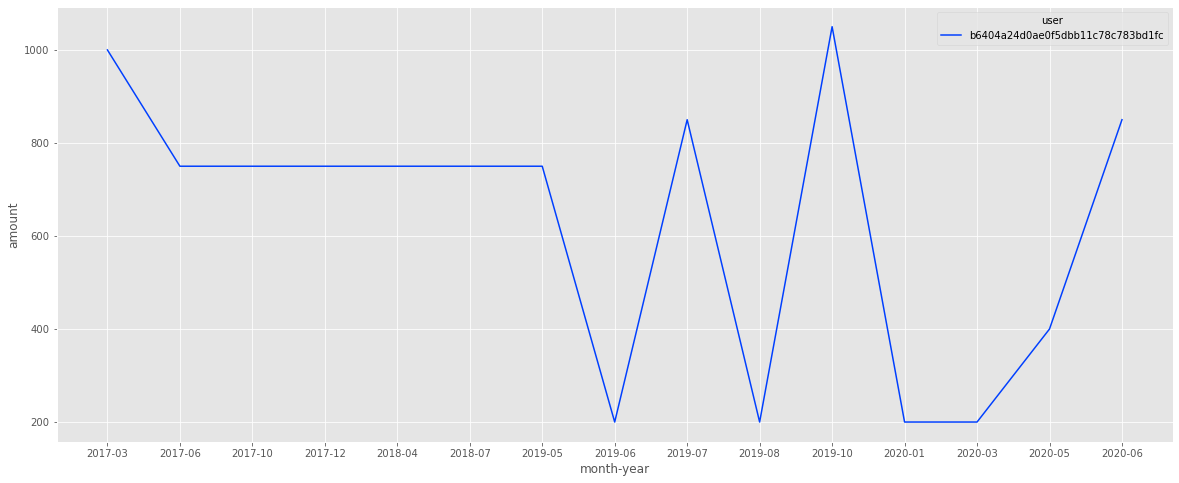

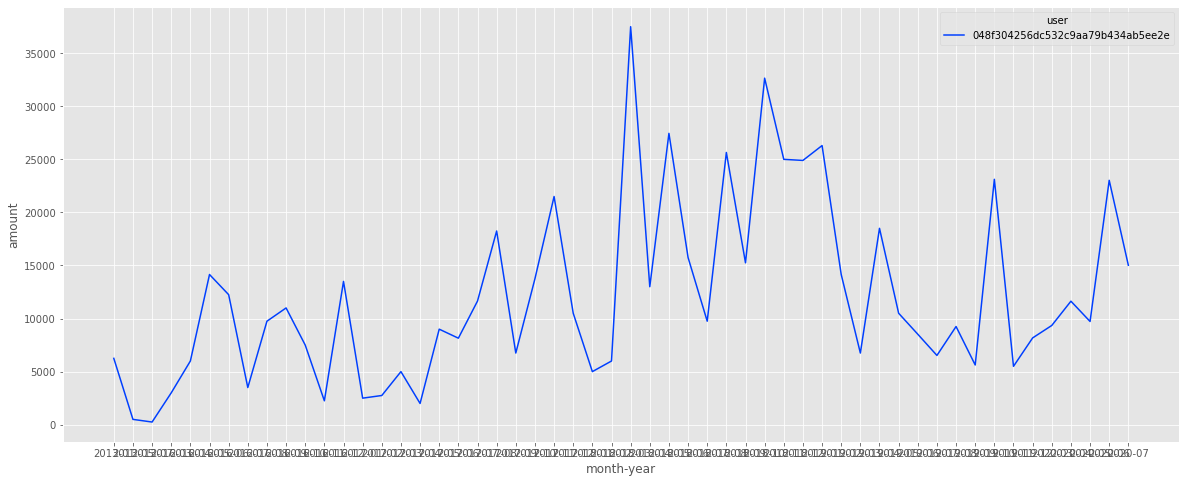

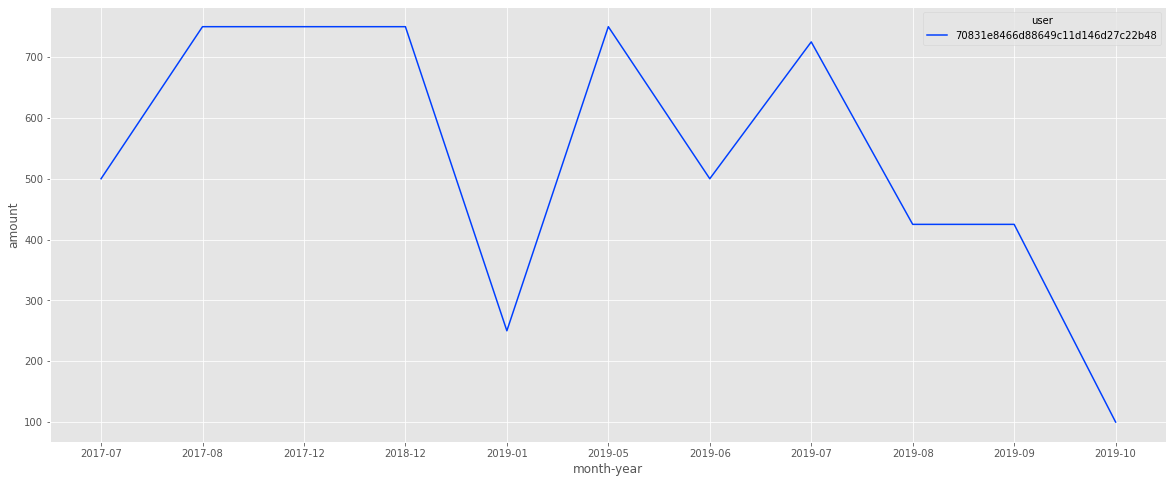

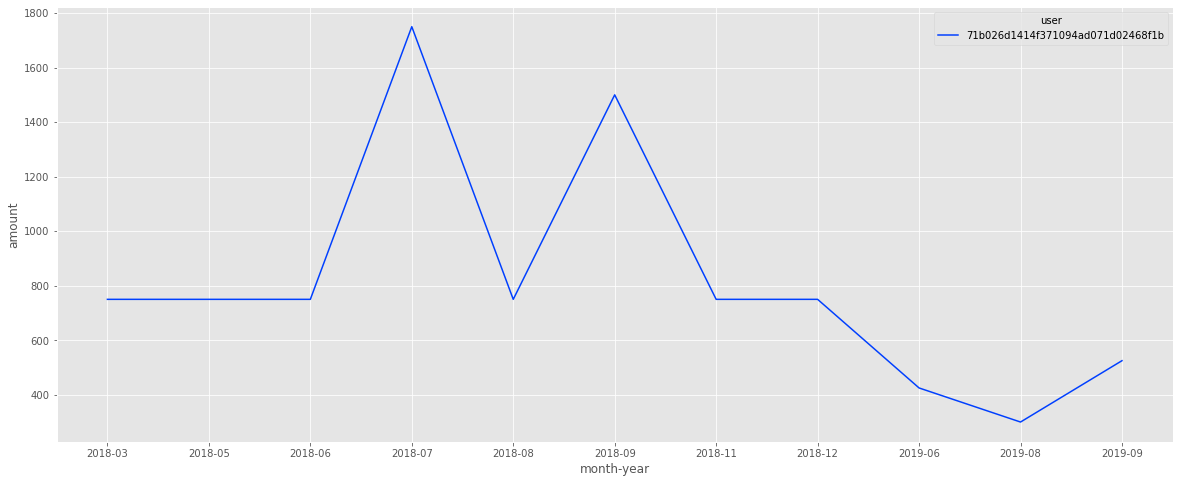

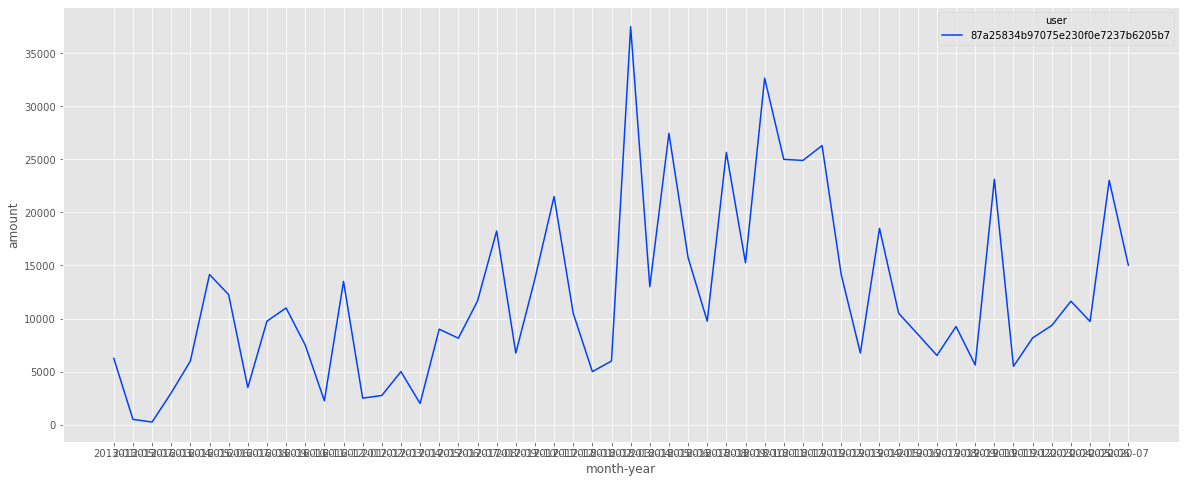

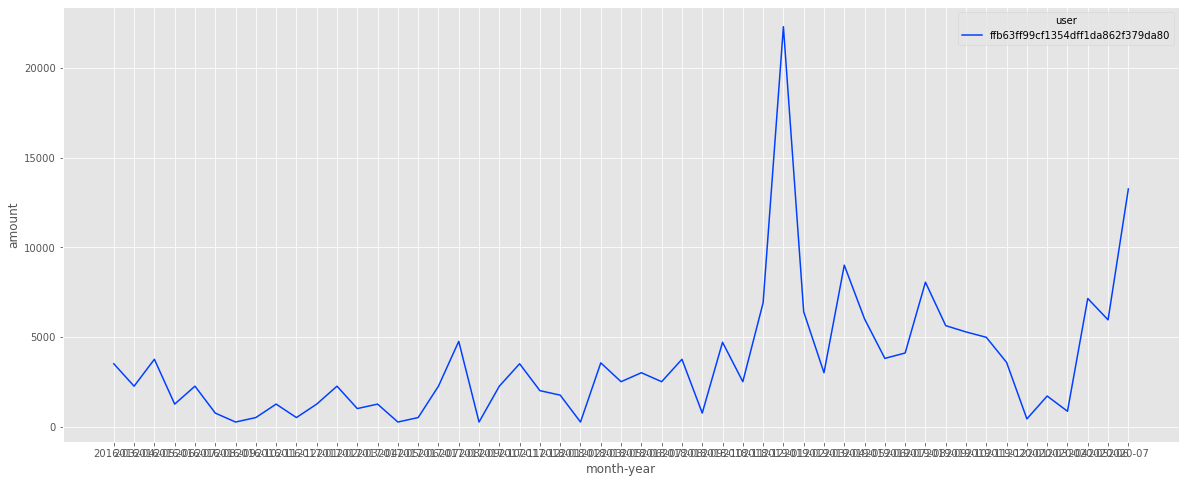

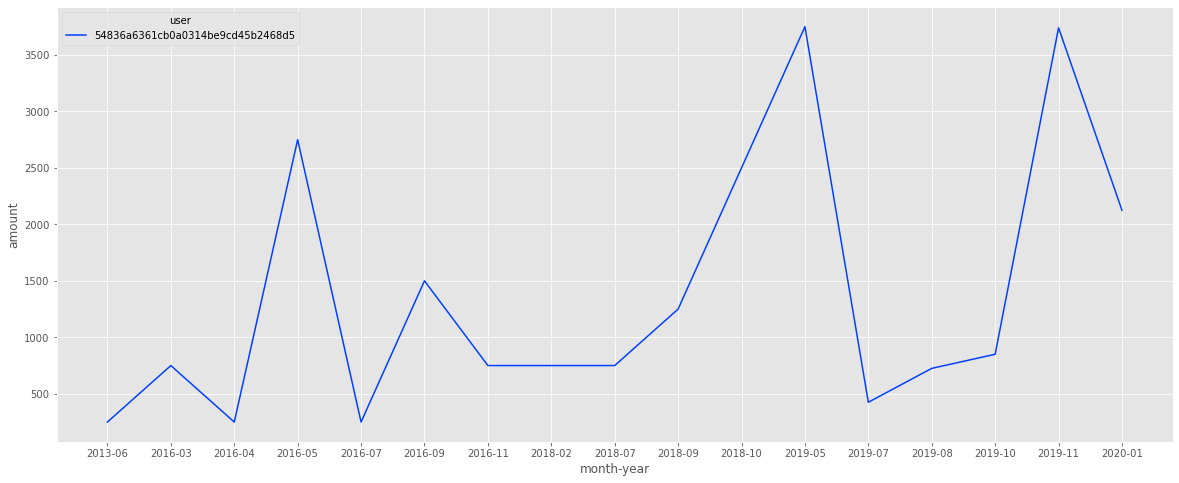

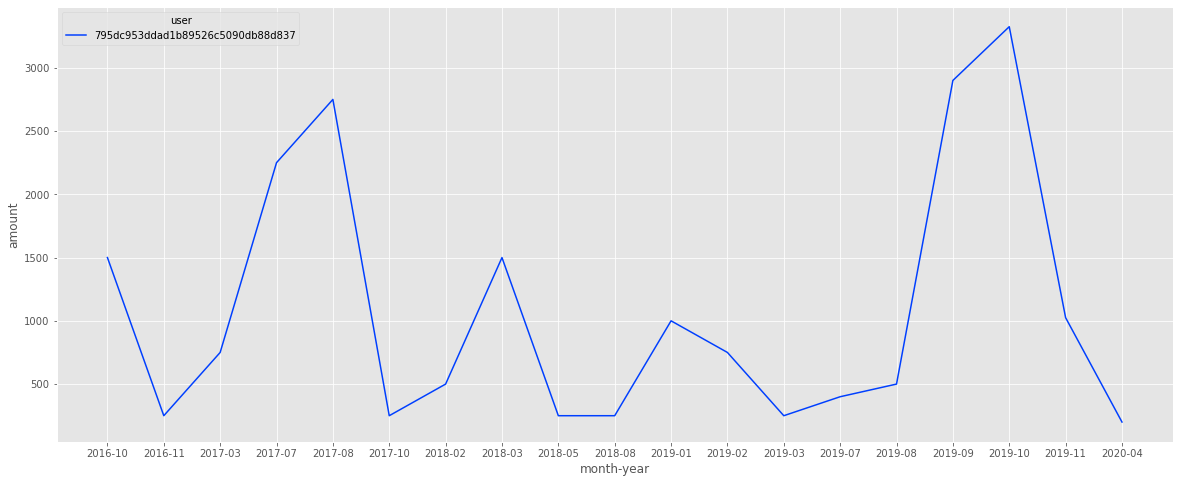

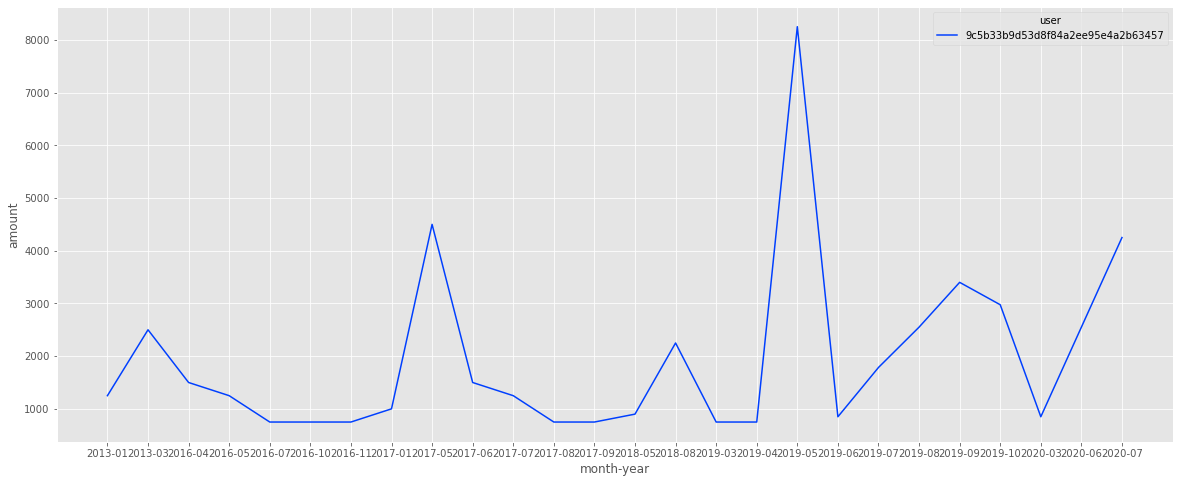

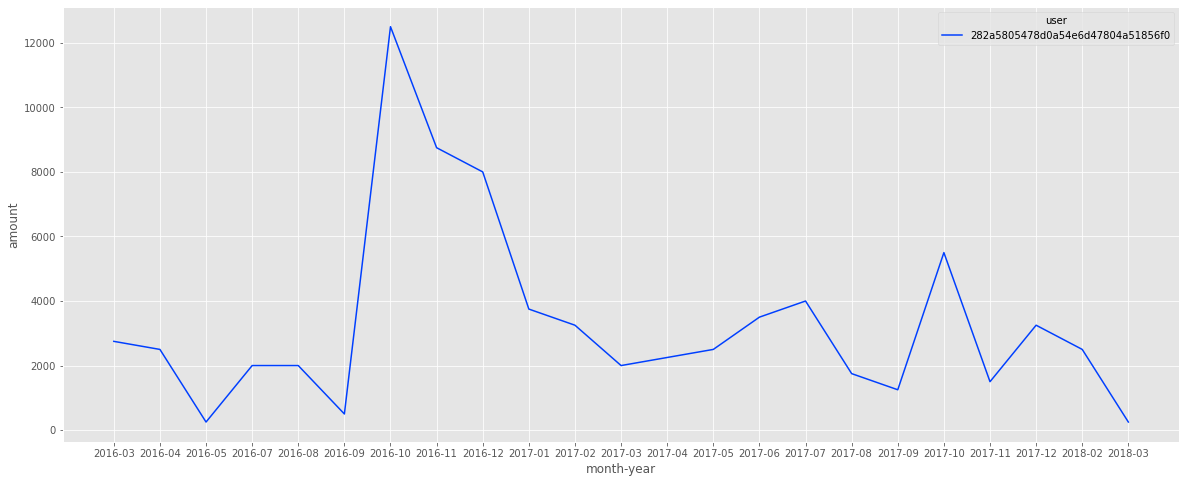

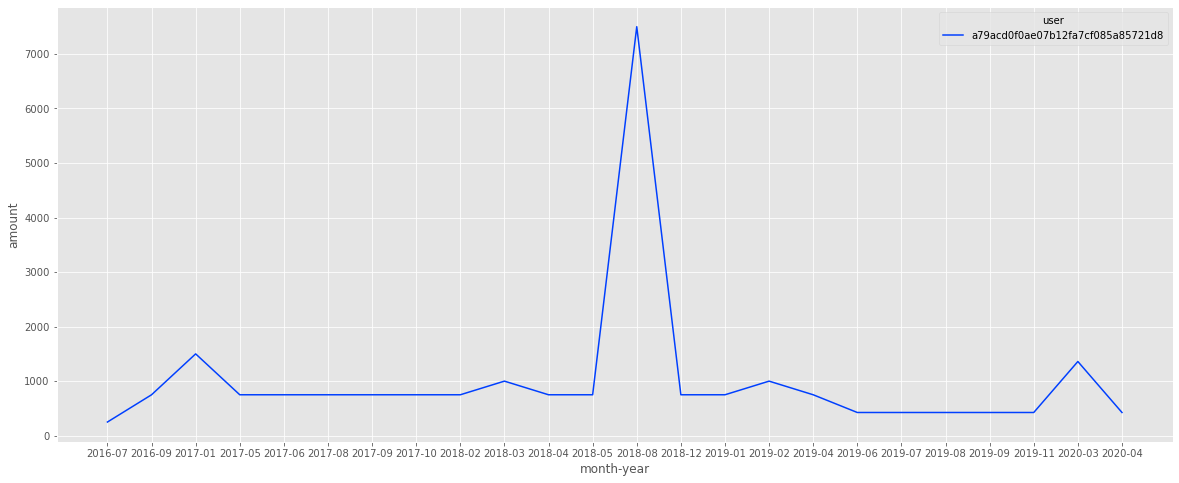

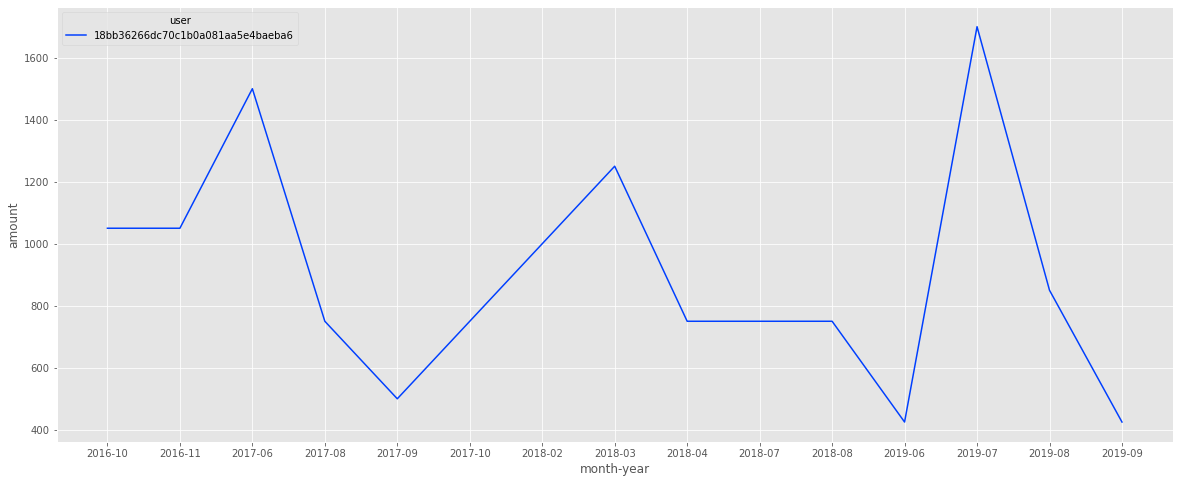

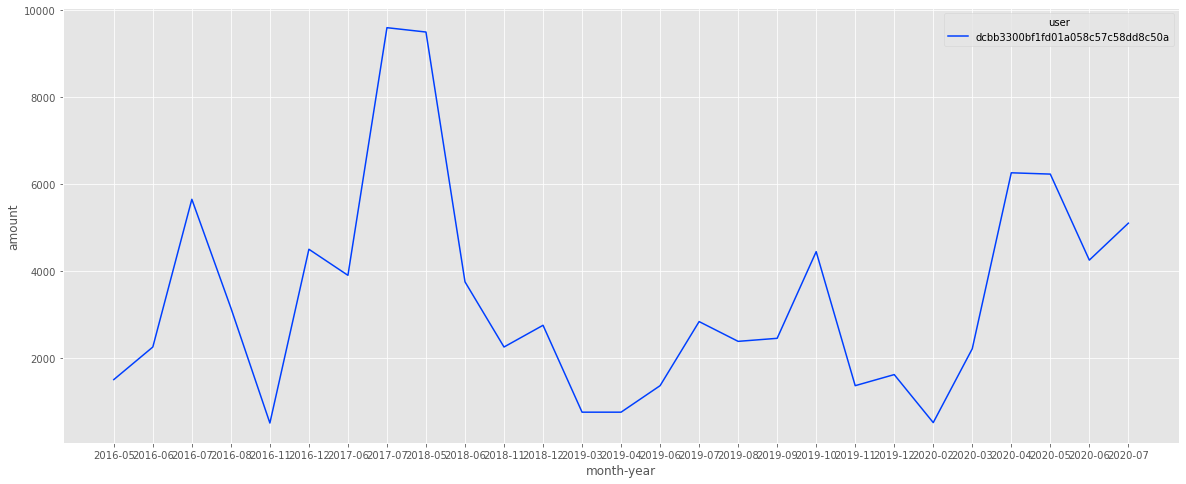

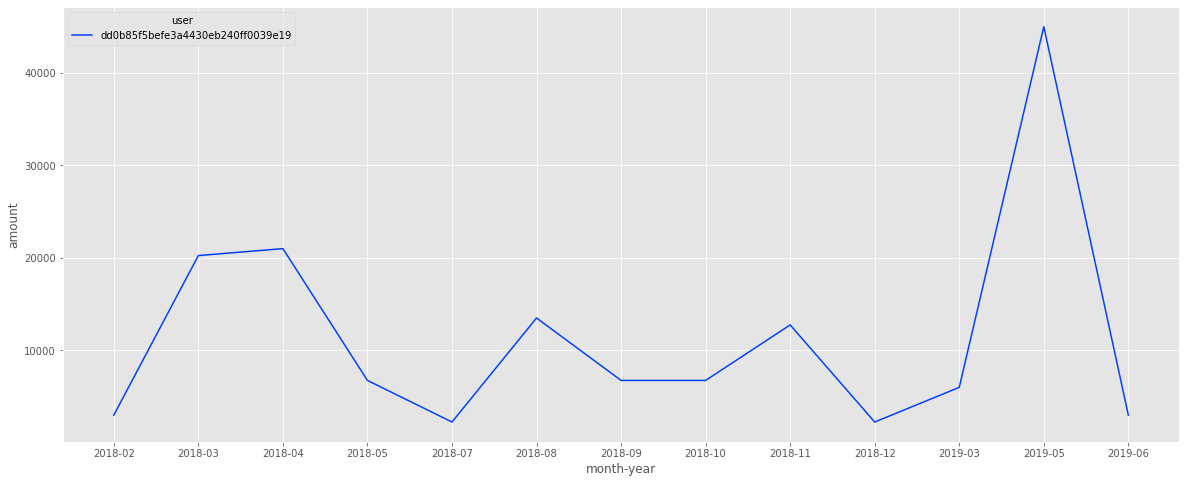

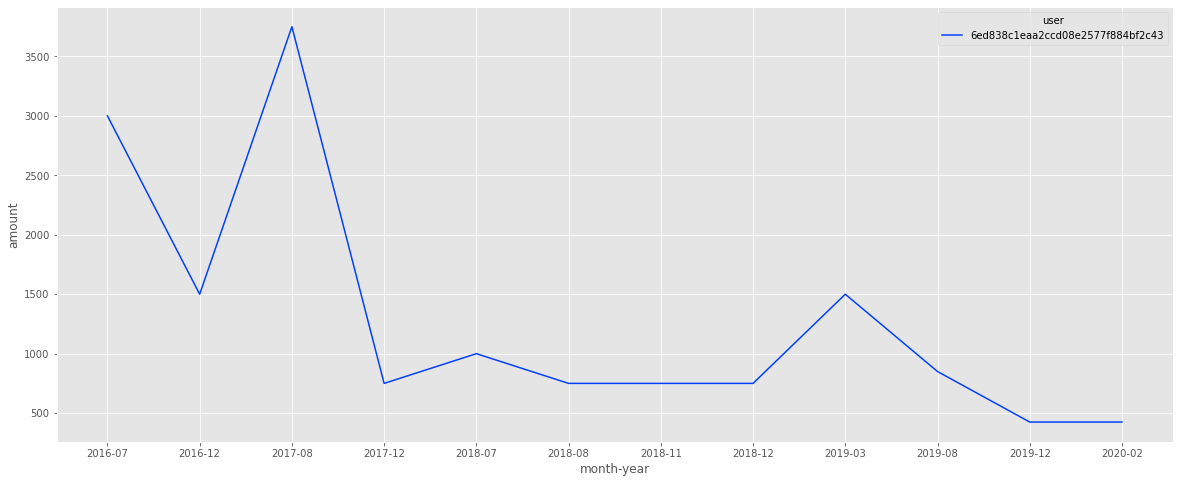

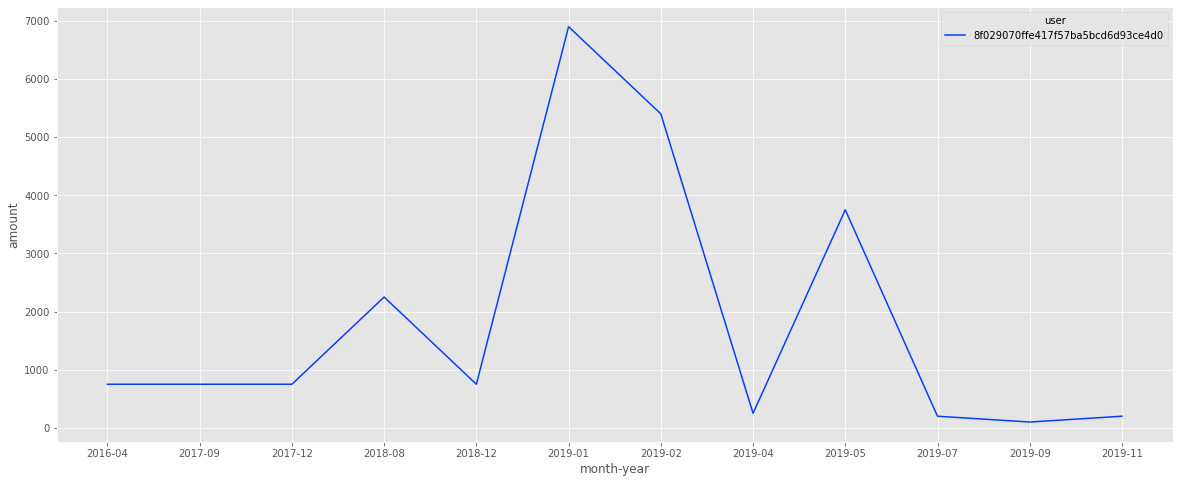

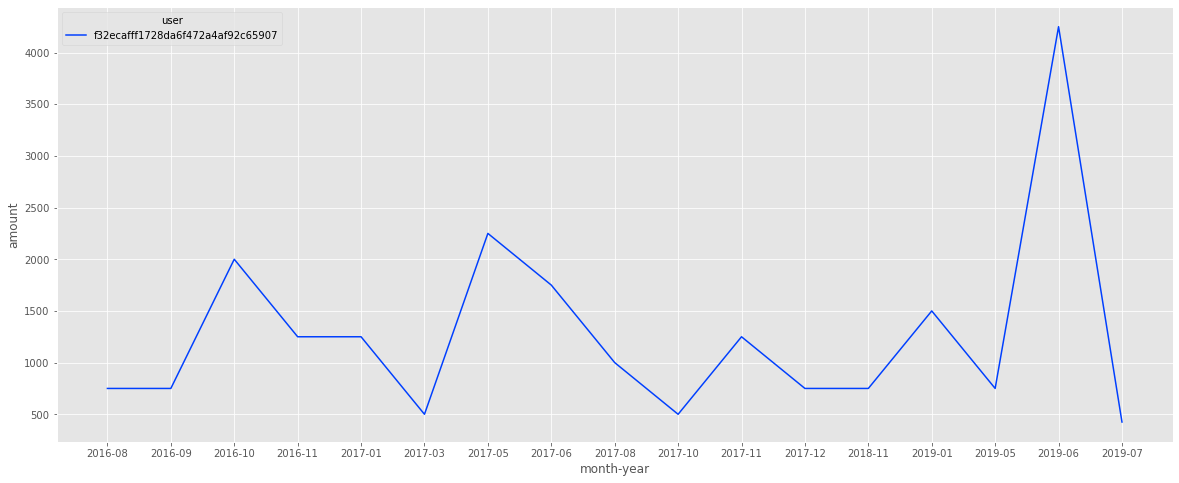

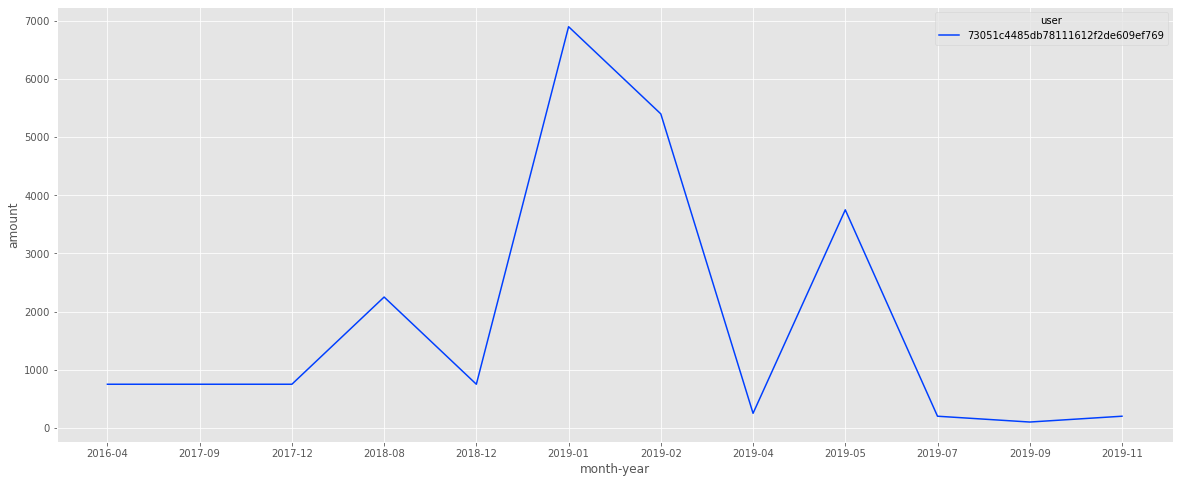

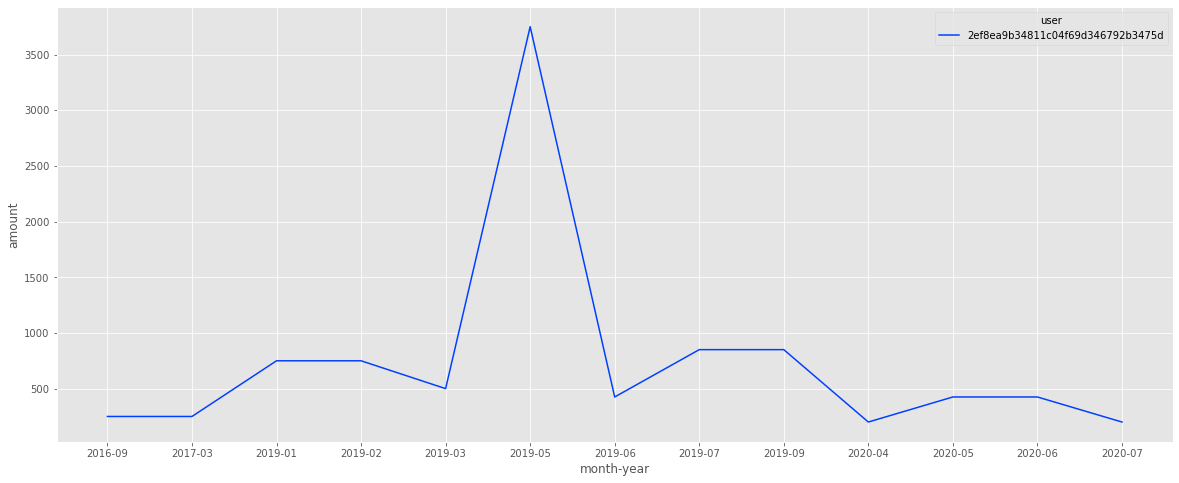

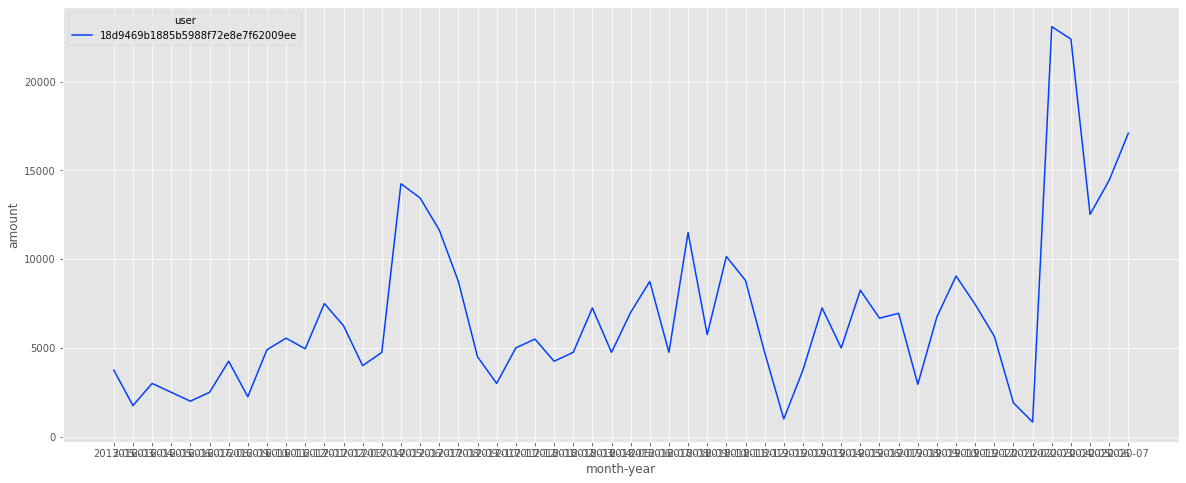

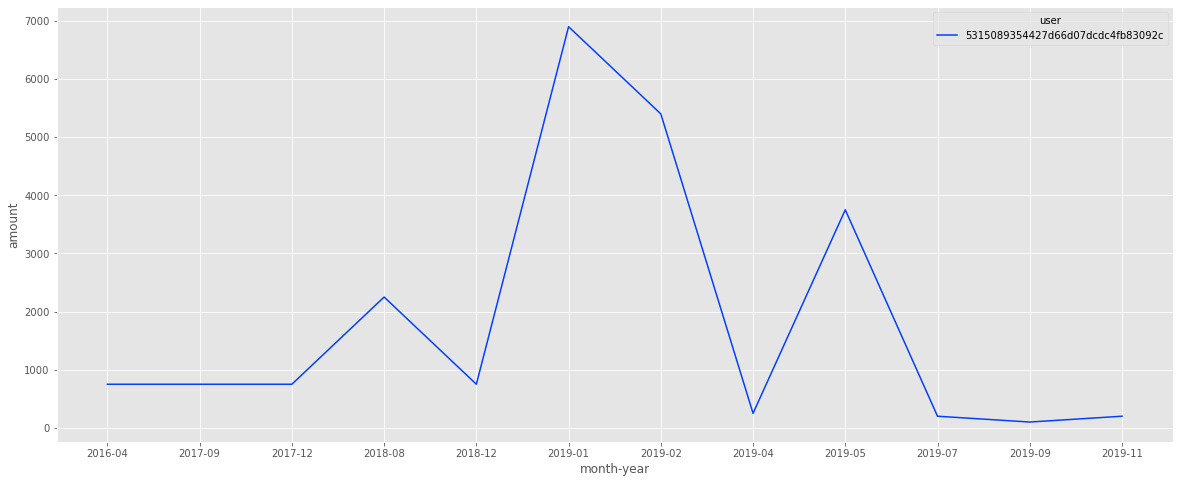

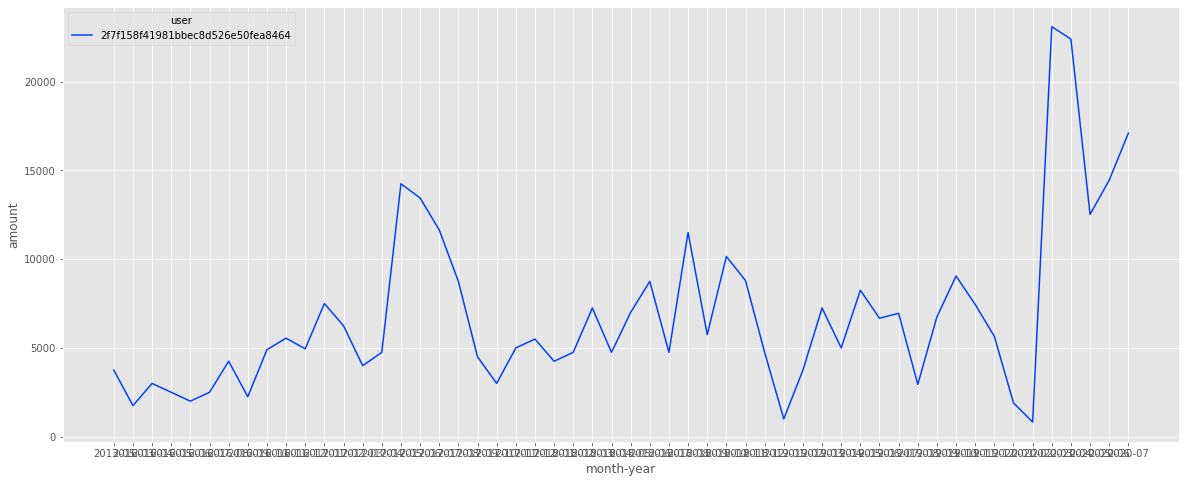

In [63]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

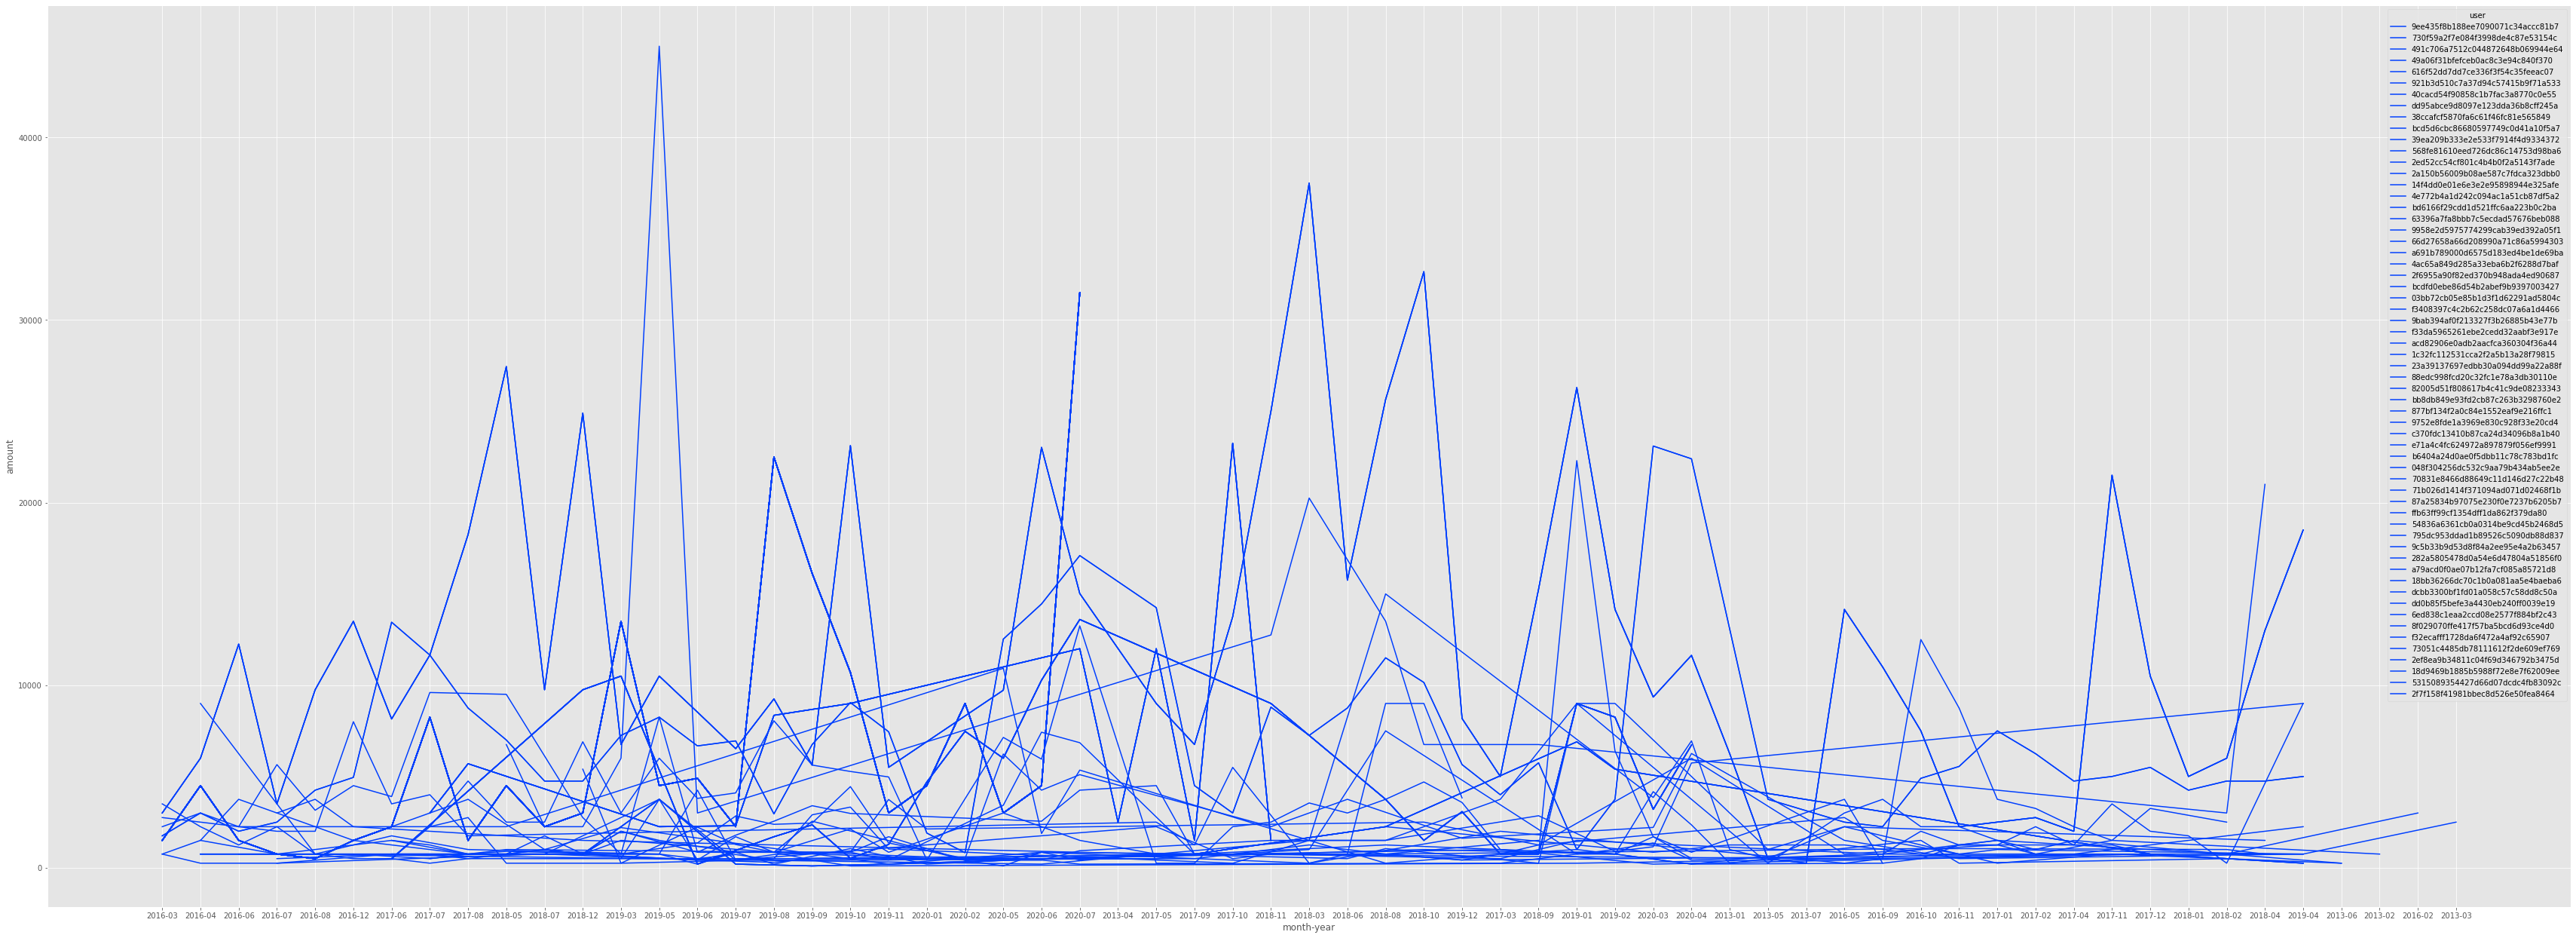

In [64]:
plt.figure(figsize=(60,22))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

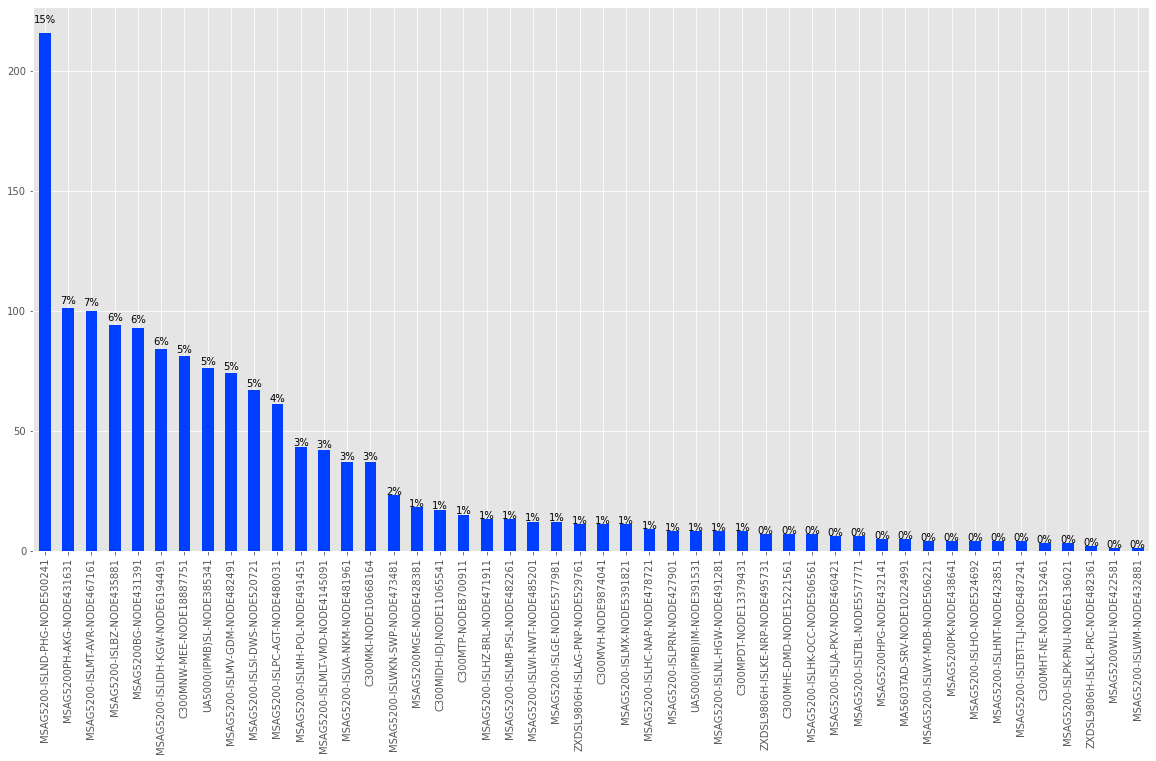

In [65]:
ax =cluster_1["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

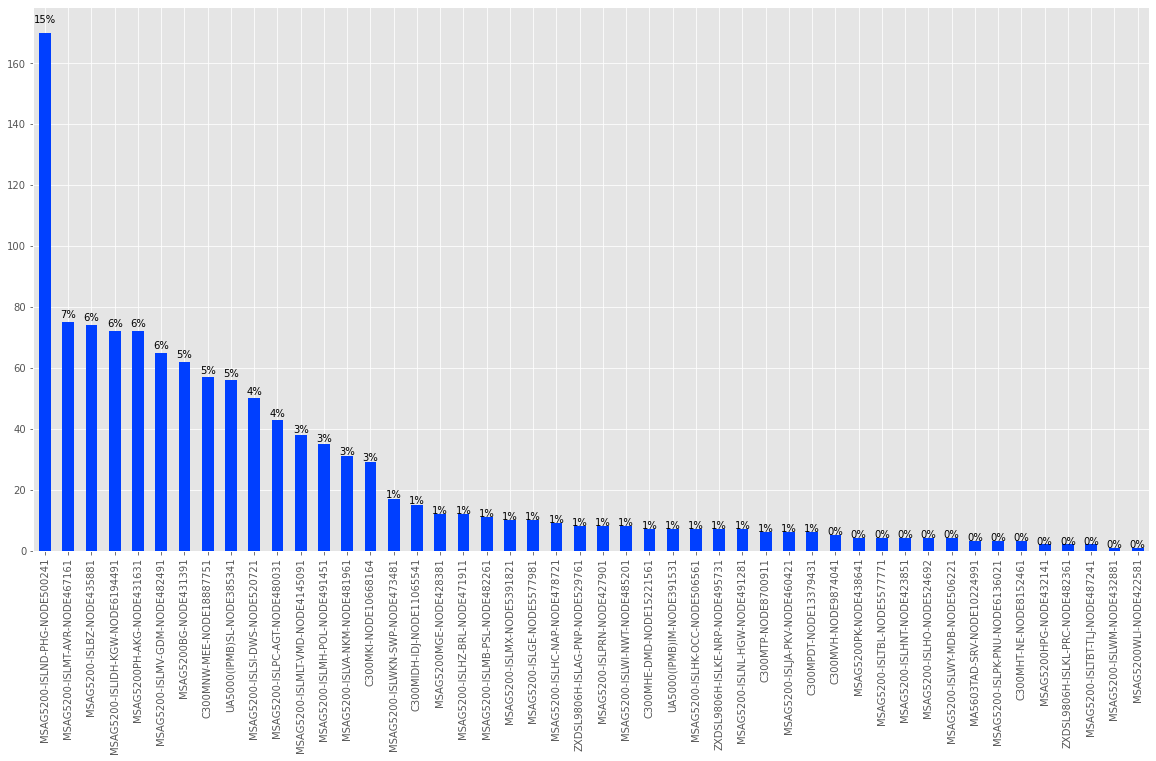

In [66]:
ax =cluster_1_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

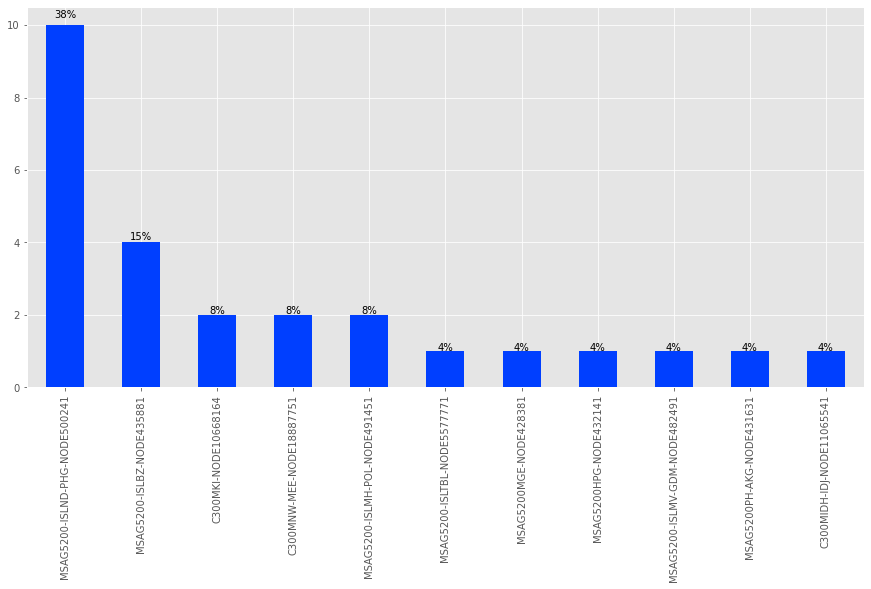

In [67]:
ax =cluster_1_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

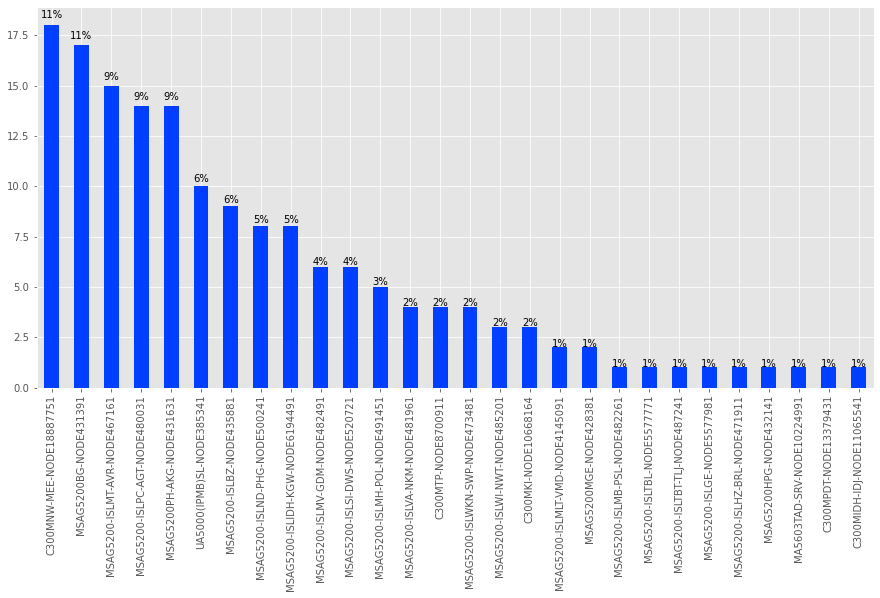

In [68]:
ax =cluster_1_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

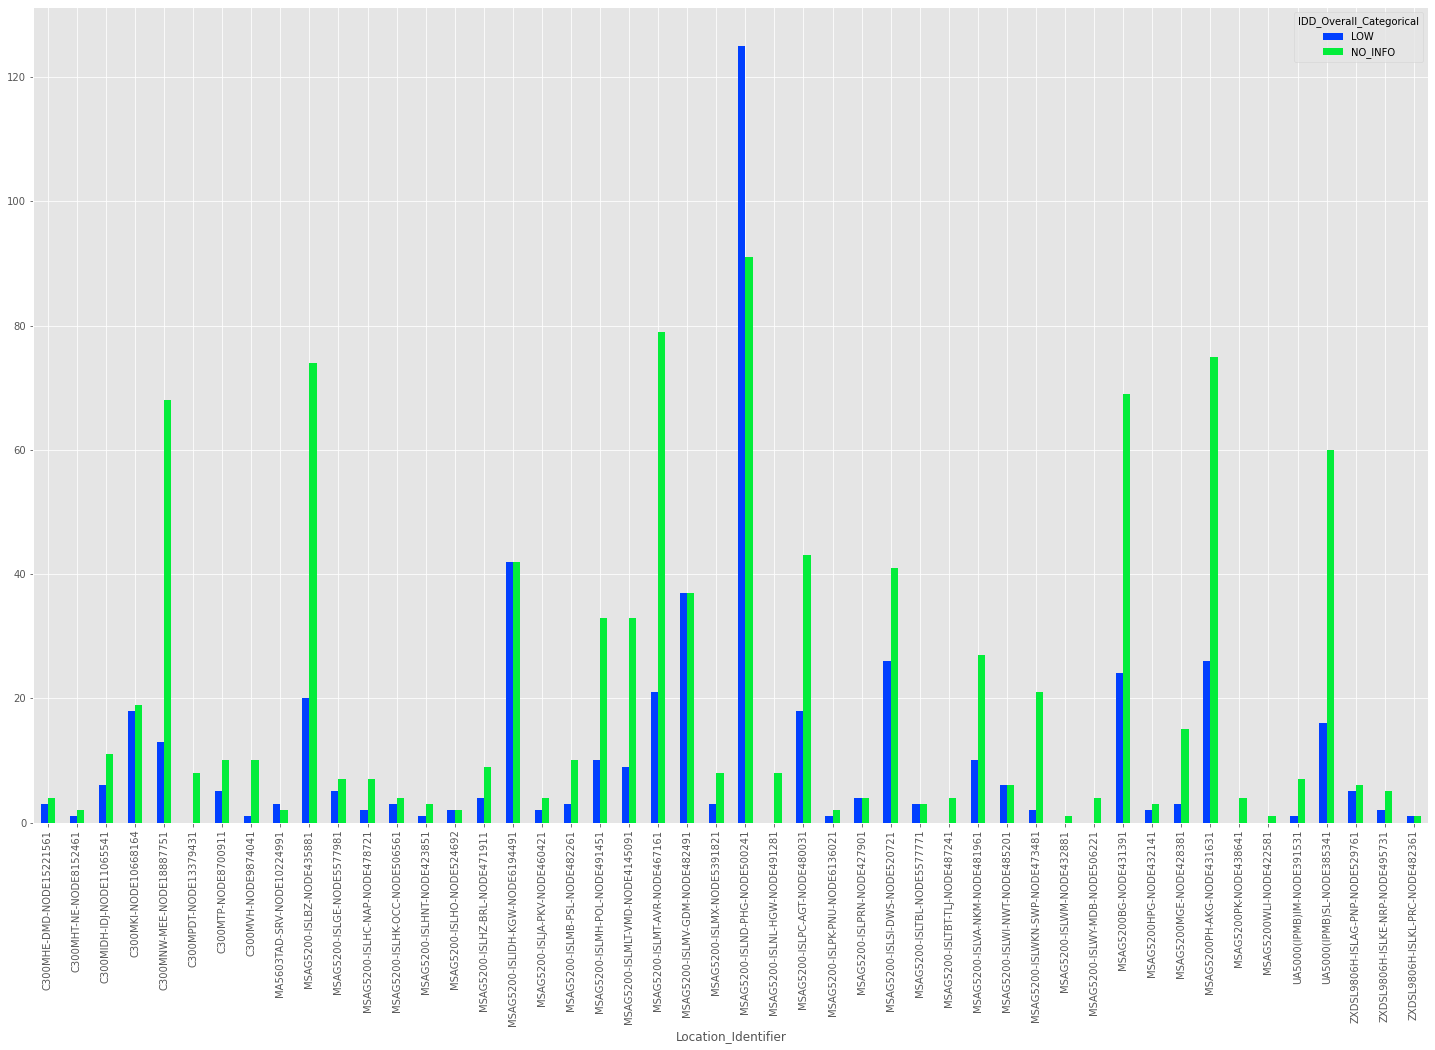

In [69]:
#ax =cluster_1[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_1[(cluster_1["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-70-8d254992a339>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(2, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(3, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(4, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(5, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(6, 0, 'MSAG5200PK-NODE438641'),
 Text(7, 0, 'MSAG5200-ISLPK-PNU-NODE6136021'),
 Text(8, 0, 'MSAG5200WLI-NODE422581'),
 Text(9, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(10, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(11, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(12, 0, 'C300MKI-NODE10668164'),
 Text(13, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(14, 0, 'MSAG5200-ISLJA-PKV-NODE460421'),
 Text(15, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(16, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(17, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(18, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(19, 0, 'MA5603TAD-SRV-NODE10224991'),
 Text(20, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(21, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(22, 0

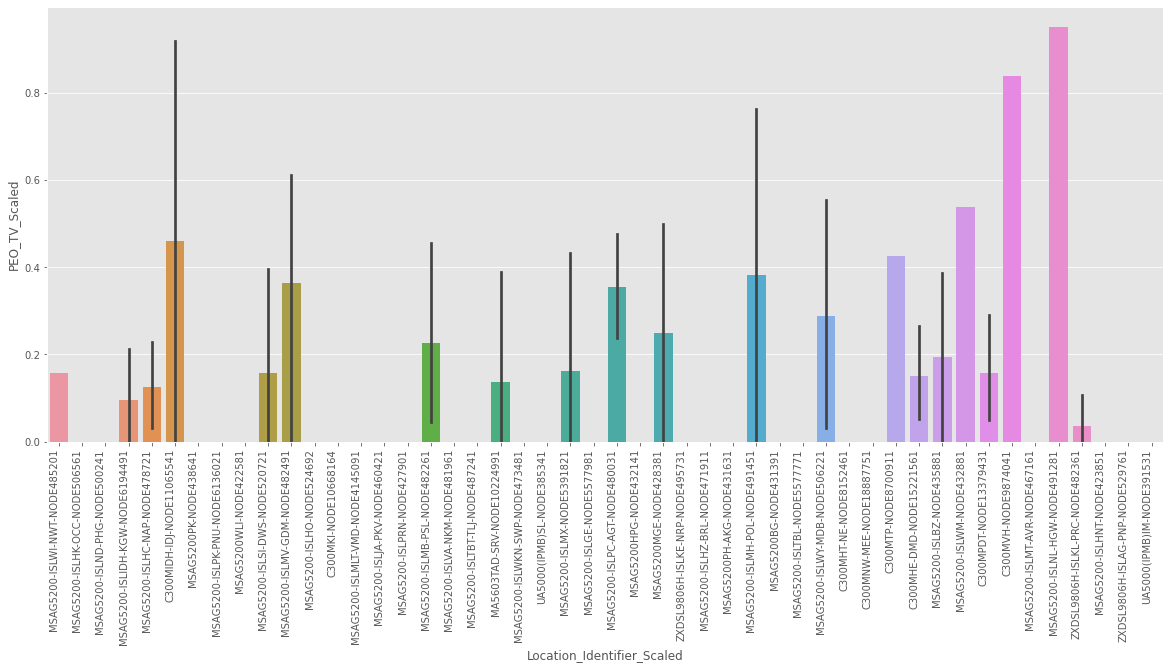

In [70]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_1[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [71]:
location_arr = cluster_1["Location_Identifier"].unique()

<ipython-input-72-f8e68635a657>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



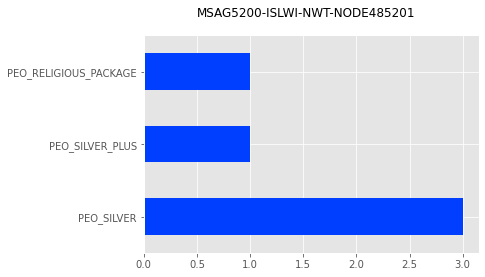

<Figure size 432x288 with 0 Axes>

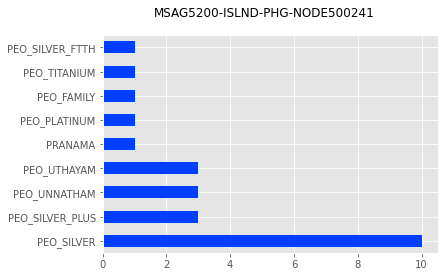

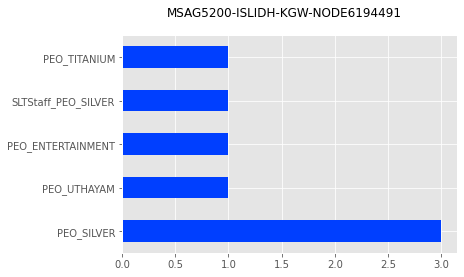

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

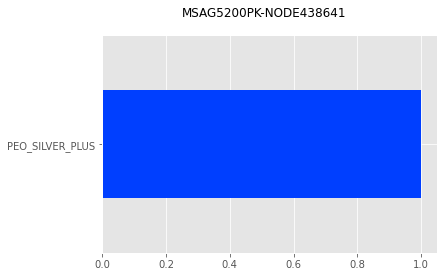

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

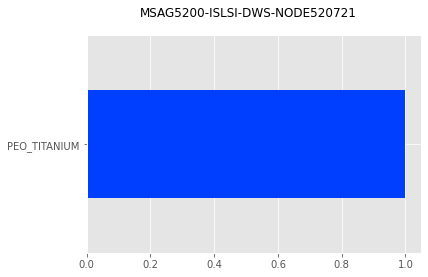

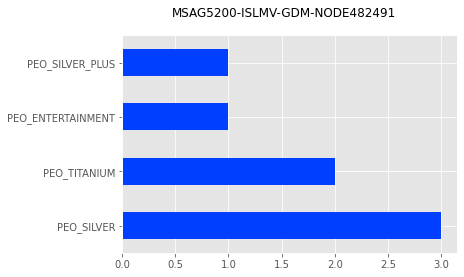

<Figure size 432x288 with 0 Axes>

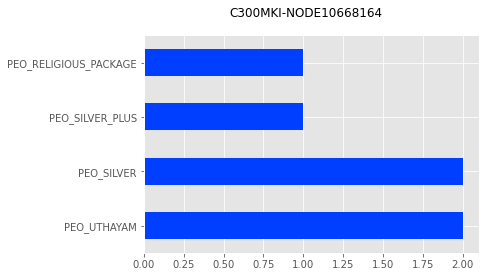

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

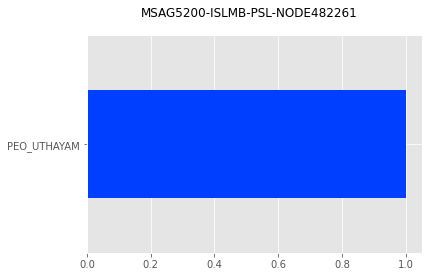

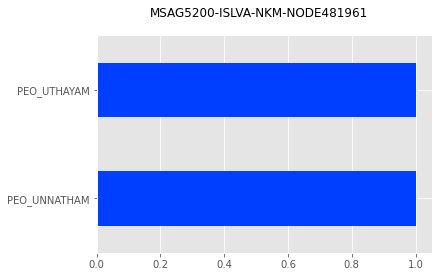

<Figure size 432x288 with 0 Axes>

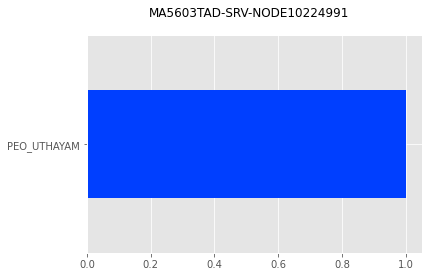

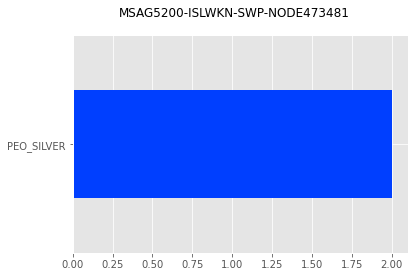

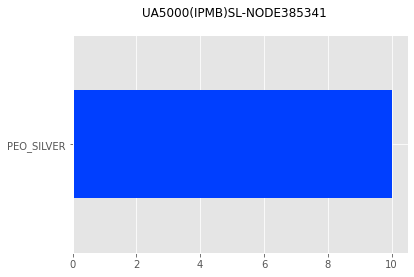

<Figure size 432x288 with 0 Axes>

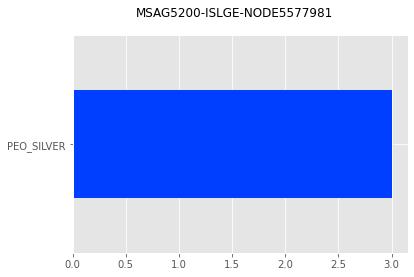

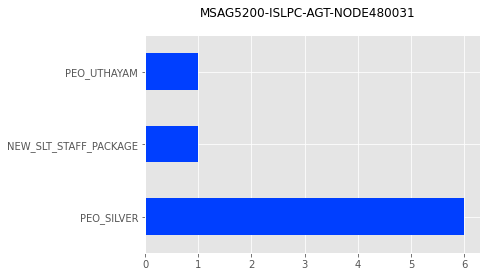

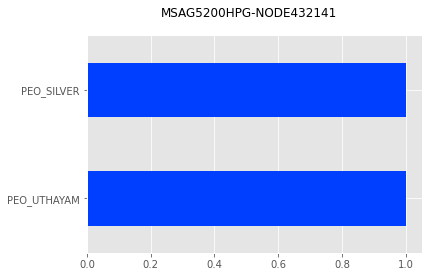

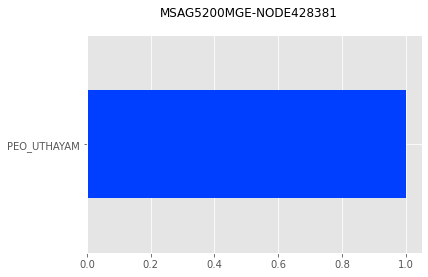

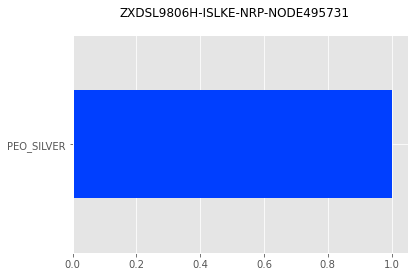

<Figure size 432x288 with 0 Axes>

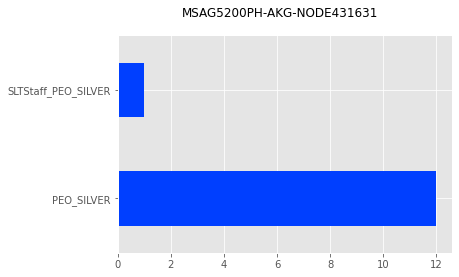

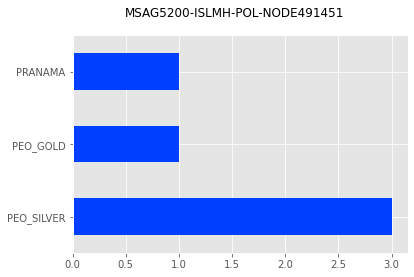

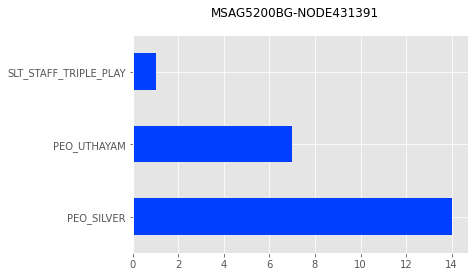

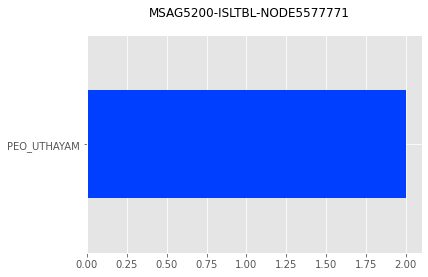

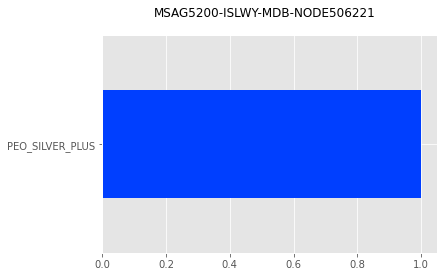

<Figure size 432x288 with 0 Axes>

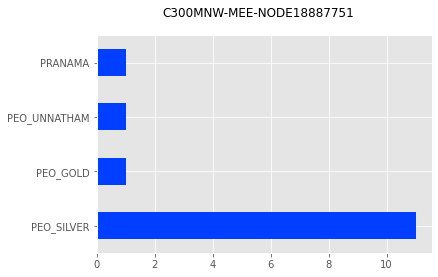

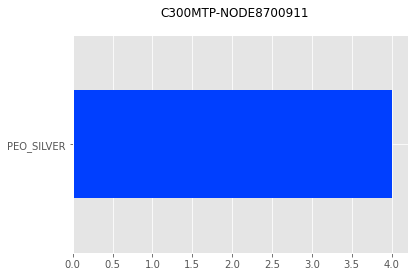

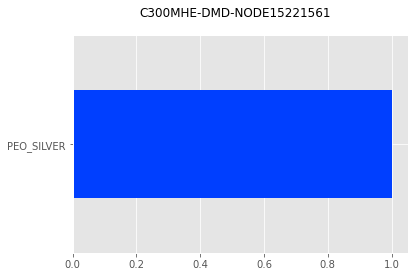

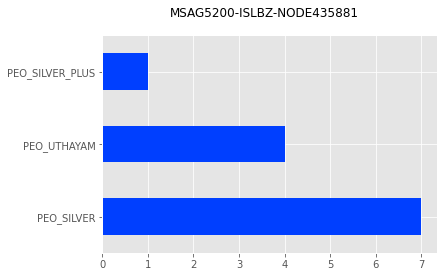

<Figure size 432x288 with 0 Axes>

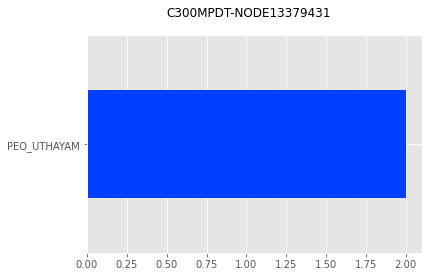

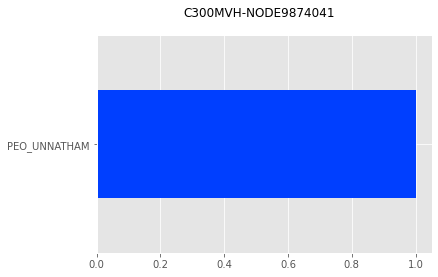

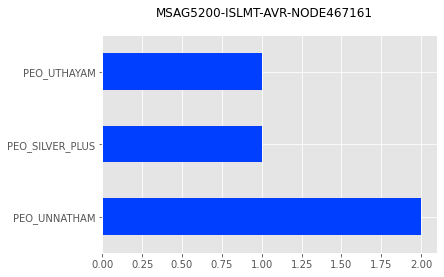

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

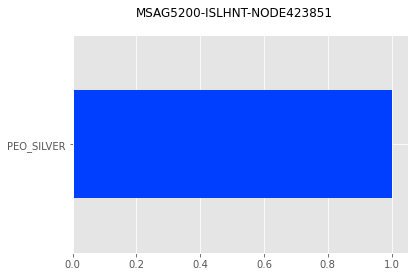

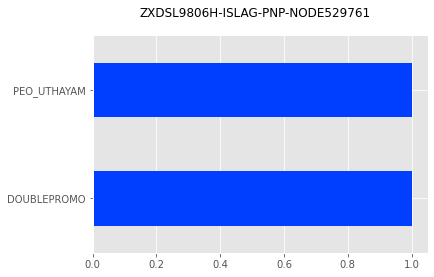

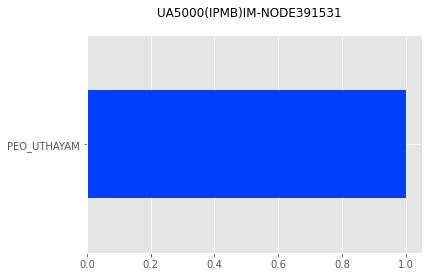

In [72]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-73-0bf32acdb903>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

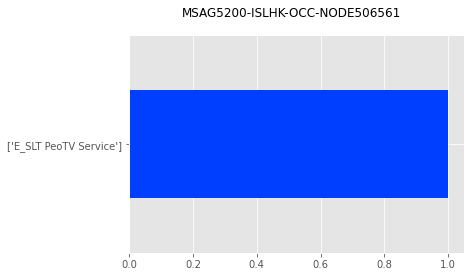

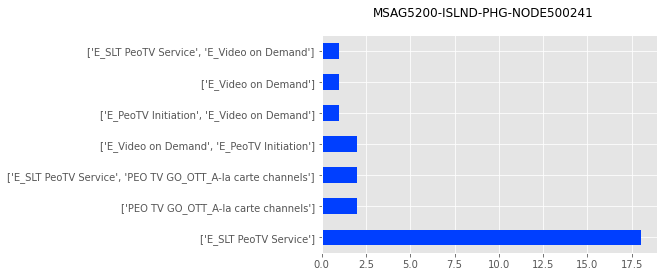

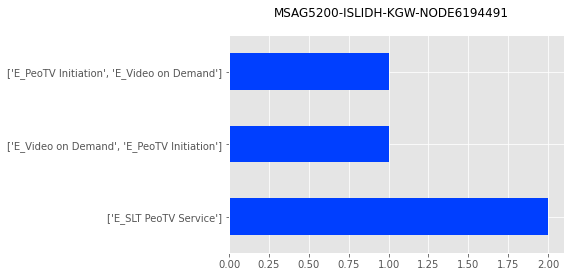

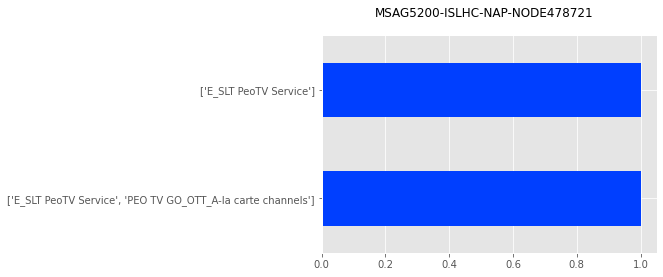

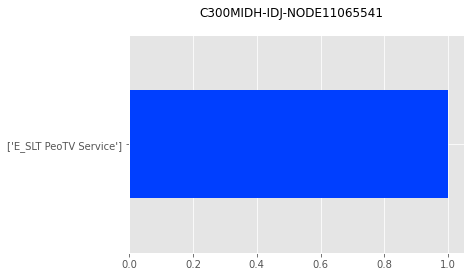

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

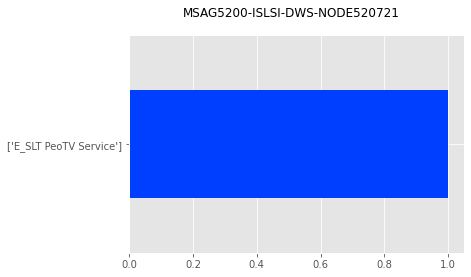

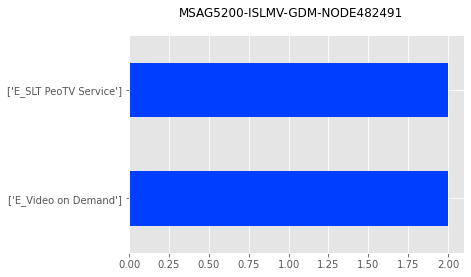

<Figure size 432x288 with 0 Axes>

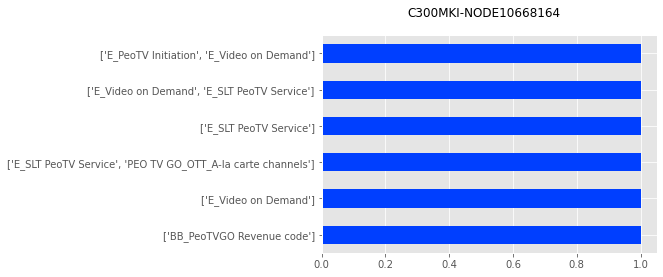

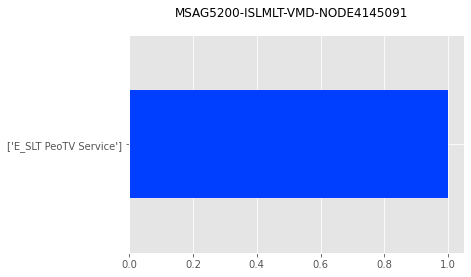

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

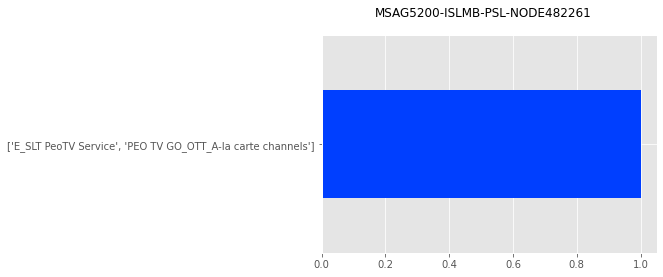

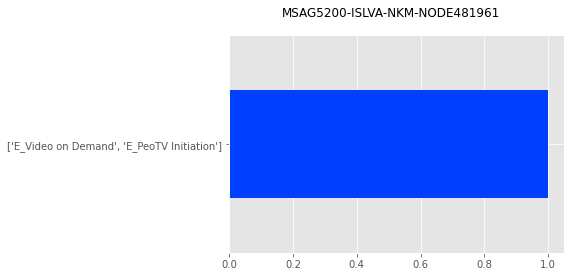

<Figure size 432x288 with 0 Axes>

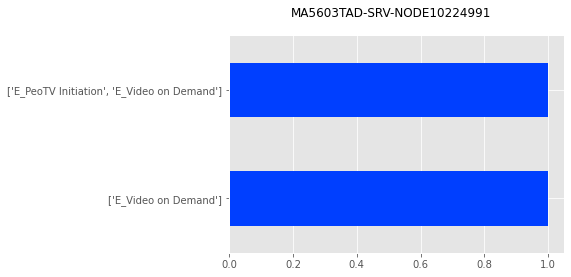

<Figure size 432x288 with 0 Axes>

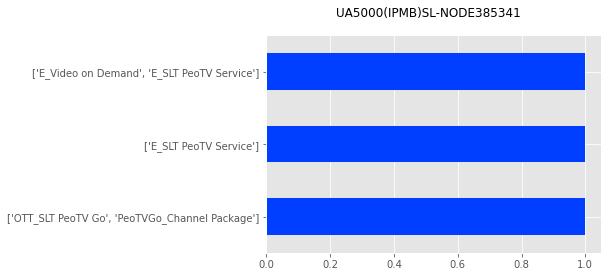

<Figure size 432x288 with 0 Axes>

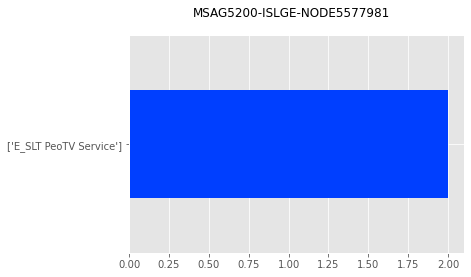

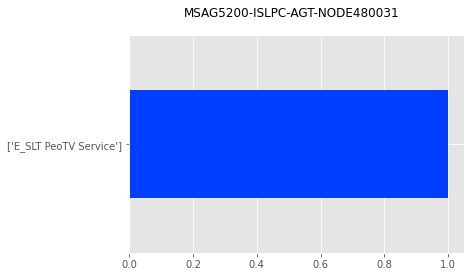

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

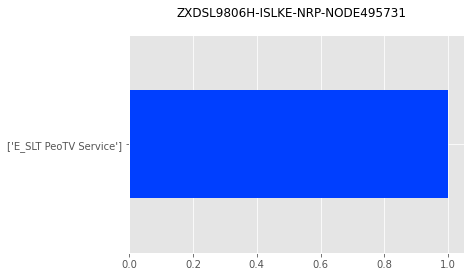

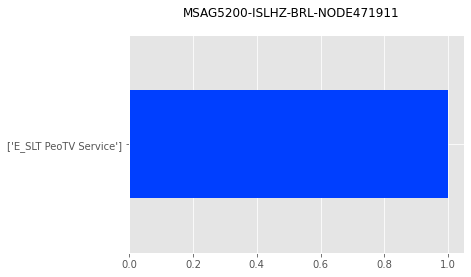

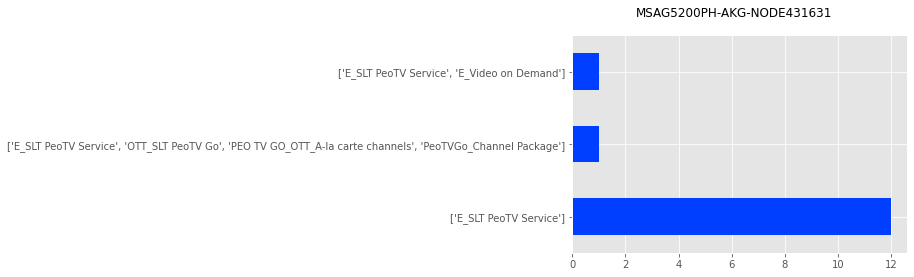

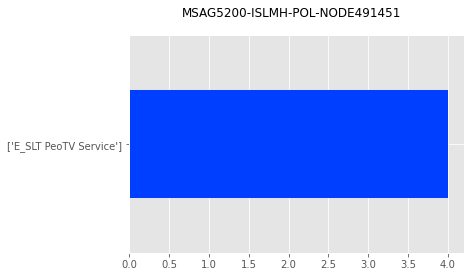

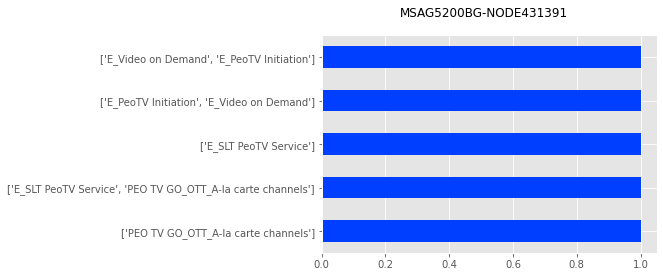

<Figure size 432x288 with 0 Axes>

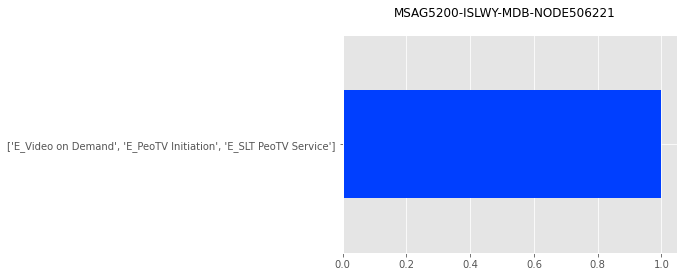

<Figure size 432x288 with 0 Axes>

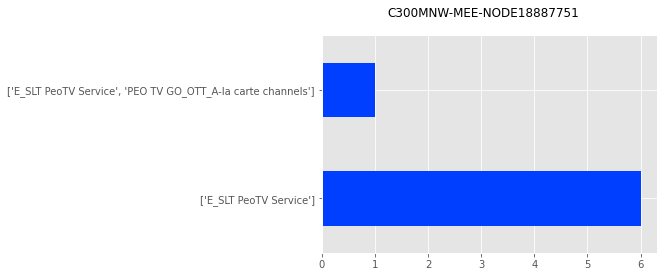

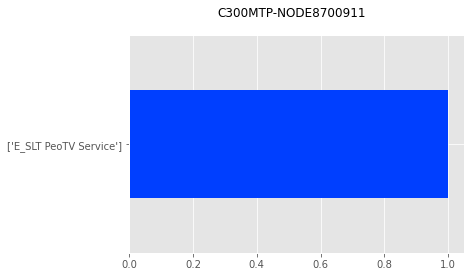

<Figure size 432x288 with 0 Axes>

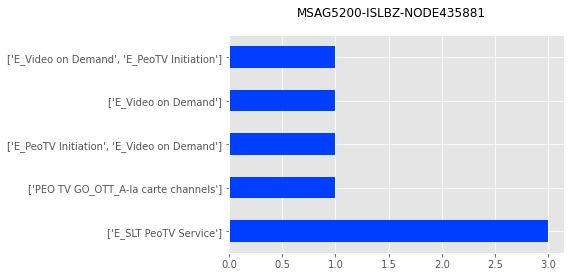

<Figure size 432x288 with 0 Axes>

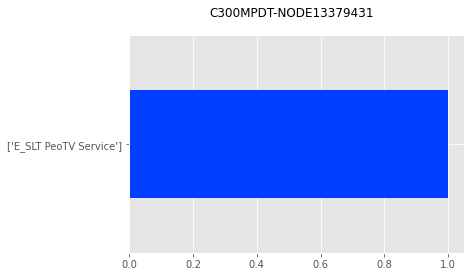

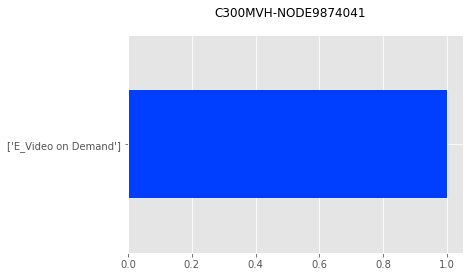

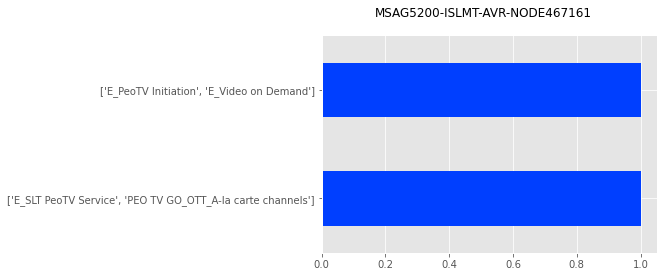

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

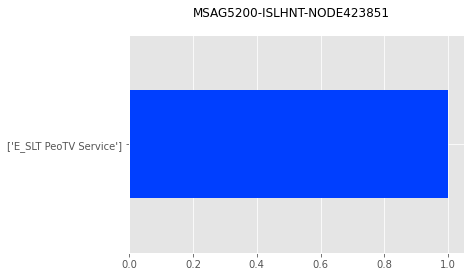

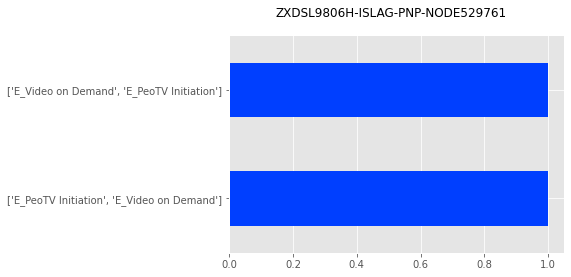

<Figure size 432x288 with 0 Axes>

In [73]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-74-0445f04f24fb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



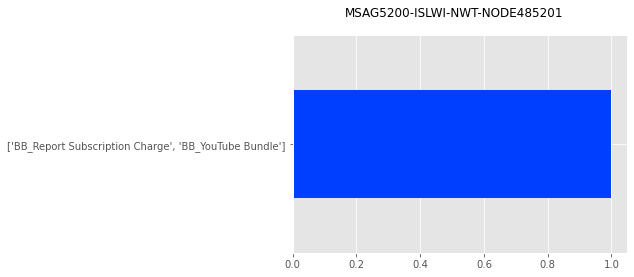

<Figure size 432x288 with 0 Axes>

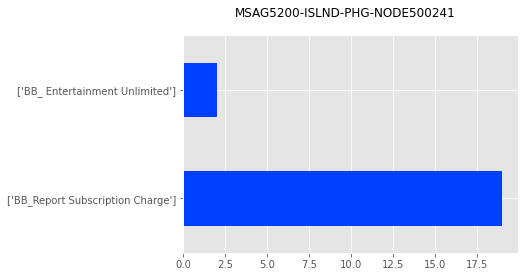

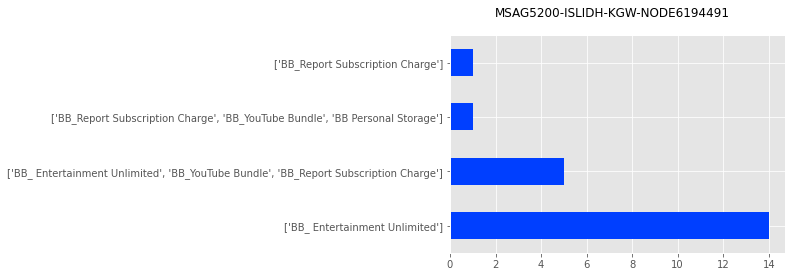

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

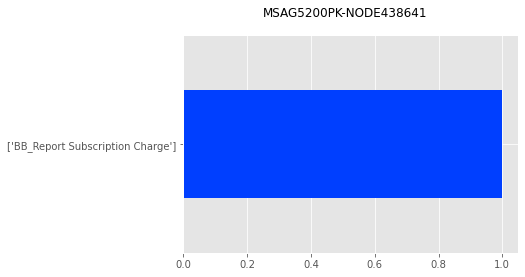

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

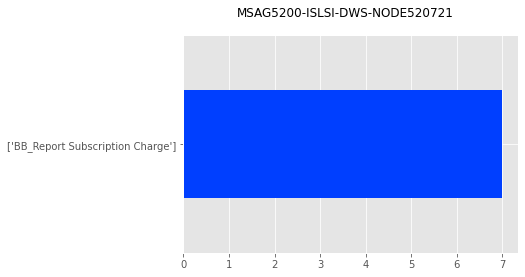

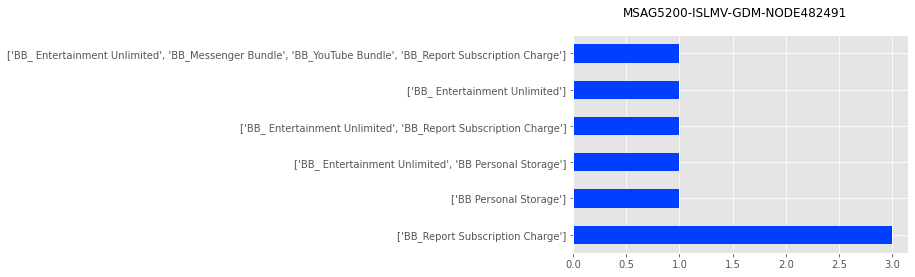

<Figure size 432x288 with 0 Axes>

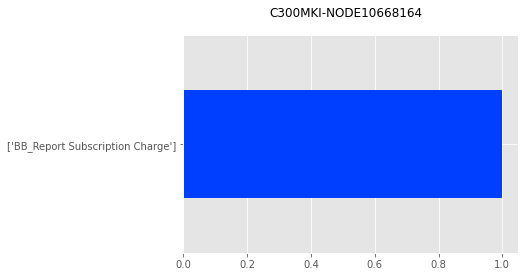

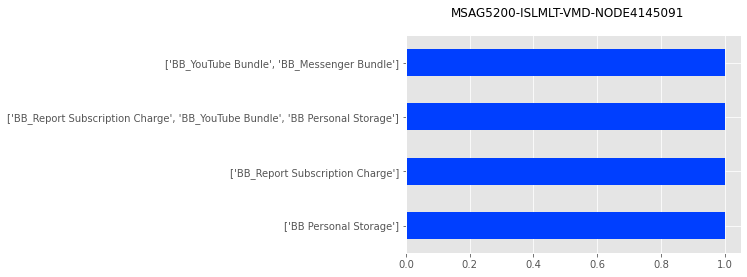

<Figure size 432x288 with 0 Axes>

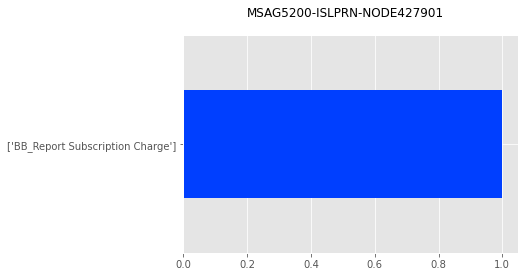

<Figure size 432x288 with 0 Axes>

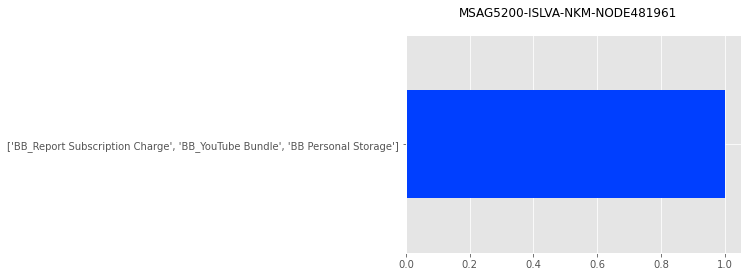

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

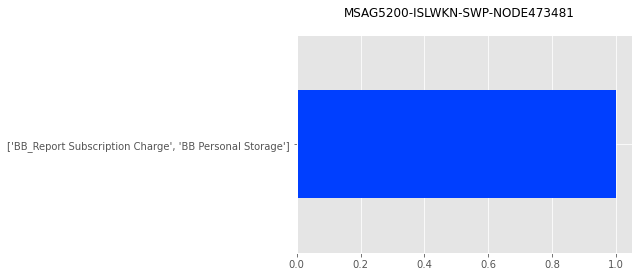

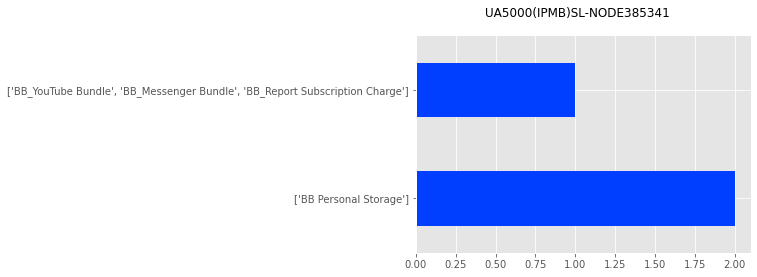

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

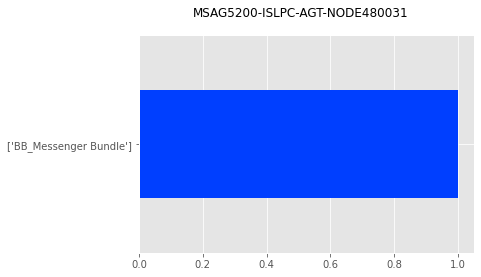

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

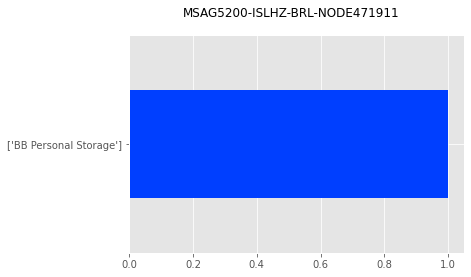

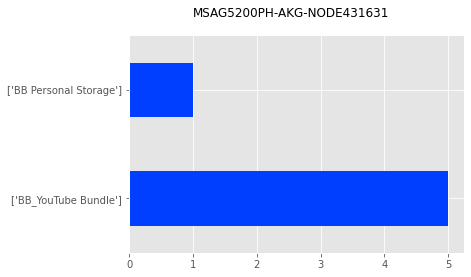

<Figure size 432x288 with 0 Axes>

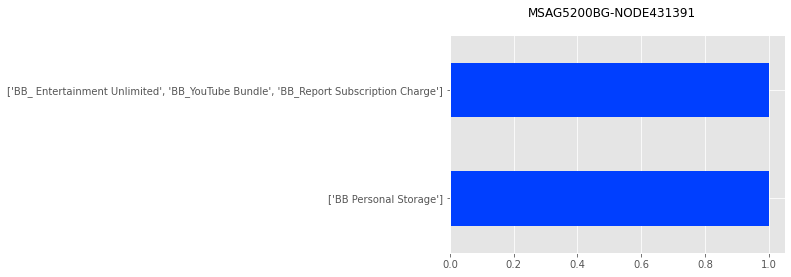

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

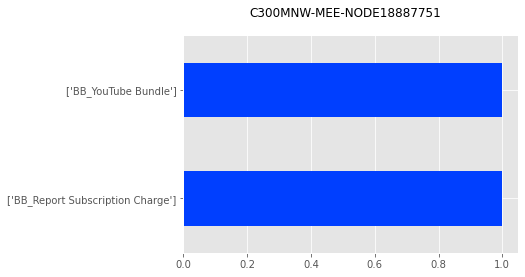

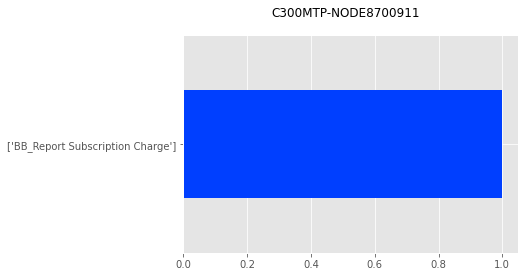

<Figure size 432x288 with 0 Axes>

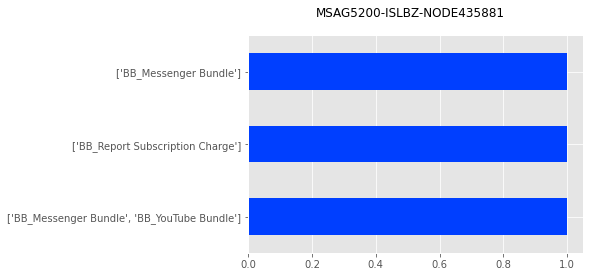

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

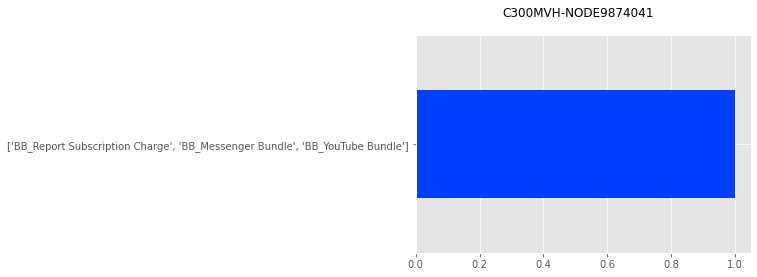

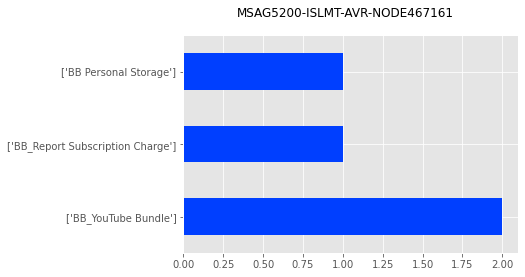

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

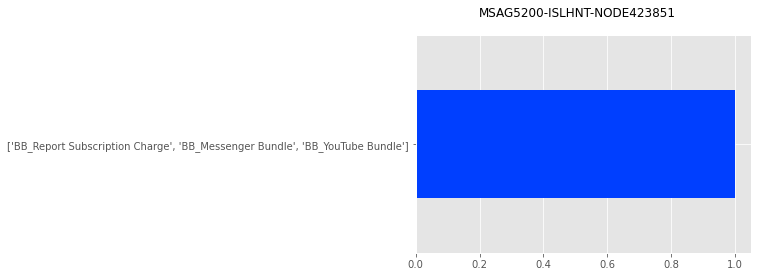

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [74]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

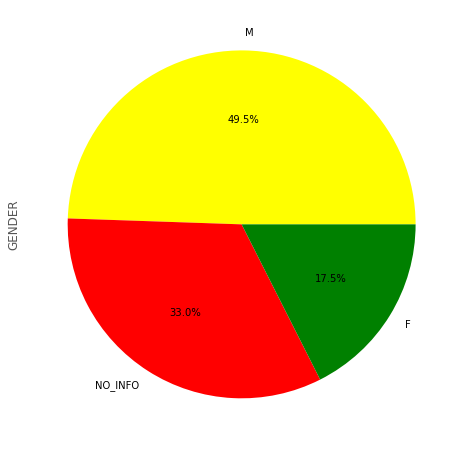

In [75]:
cluster_1["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['yellow','red','green'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

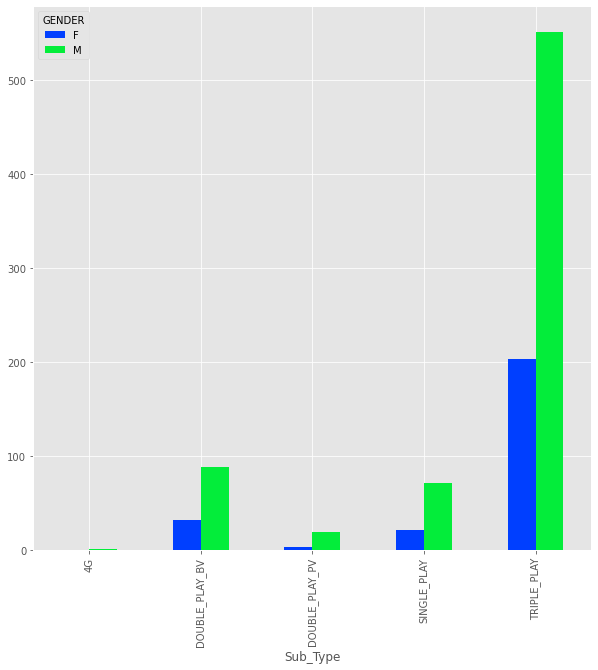

In [76]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

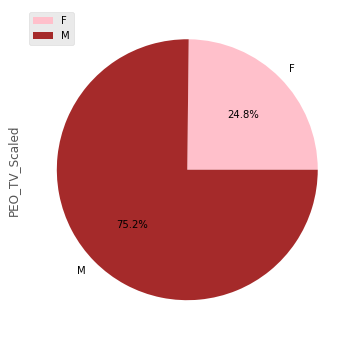

In [77]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

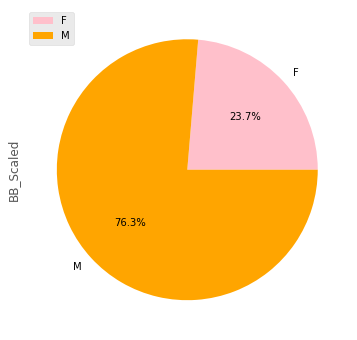

In [78]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

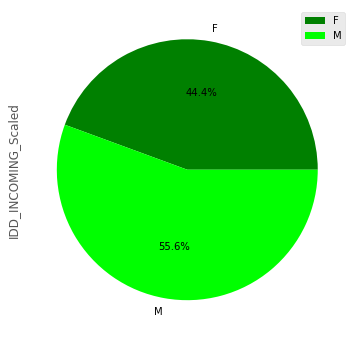

In [79]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

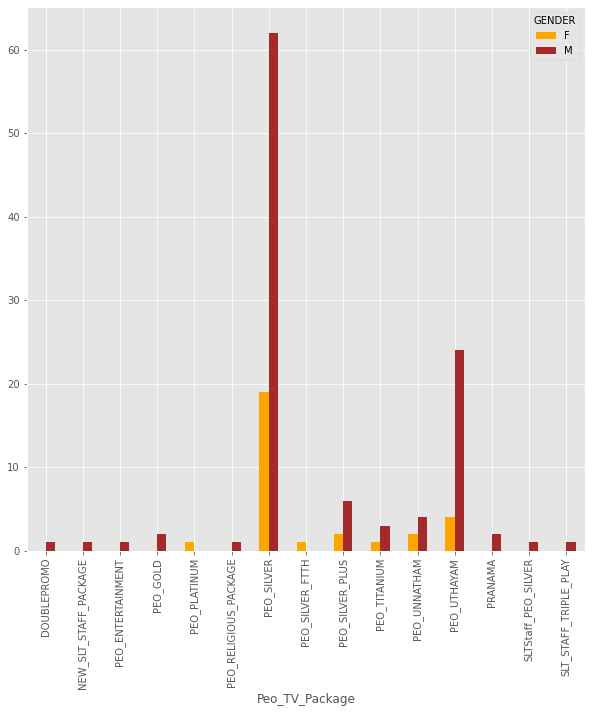

In [80]:
 cluster_1[((cluster_1["GENDER"] != "NO_INFO") &(cluster_1["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [81]:
cluster_1["AGE"].describe()

count    989.000000
mean      55.858443
std       13.885600
min       22.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      107.000000
Name: AGE, dtype: float64

In [82]:
bins = [0, 30,55,65,85,110]
cluster_1['AGE_Groups'] = pd.cut(cluster_1['AGE'], bins)

<ipython-input-82-0c2e78407b81>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

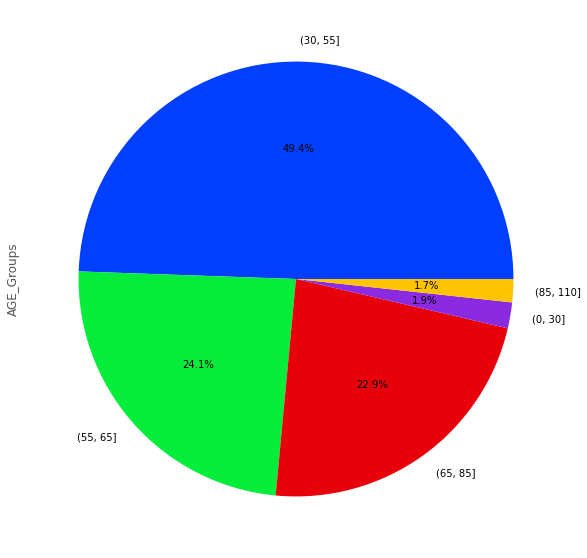

In [83]:
cluster_1["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

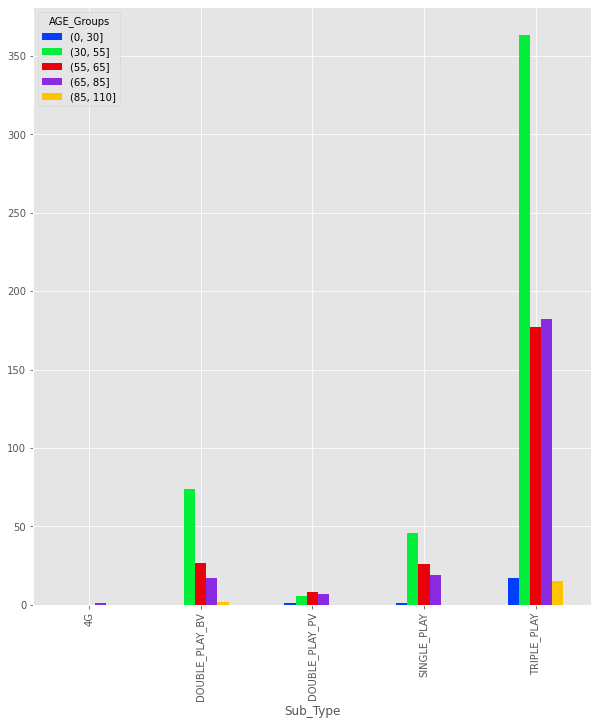

In [84]:
cluster_1.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

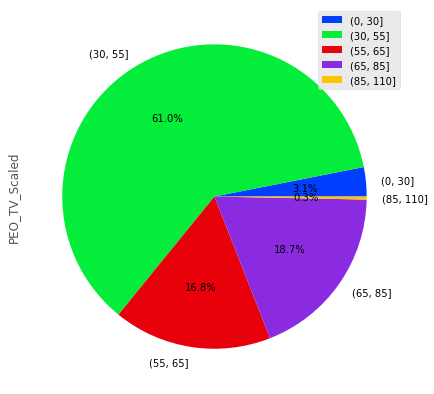

In [85]:
cluster_1[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

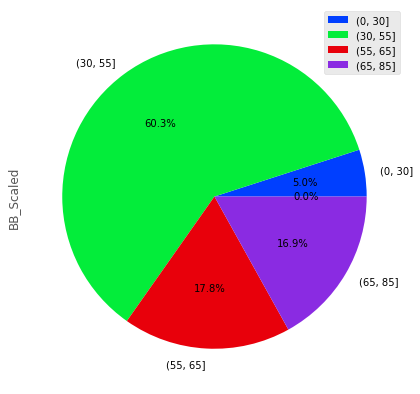

In [86]:
cluster_1[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

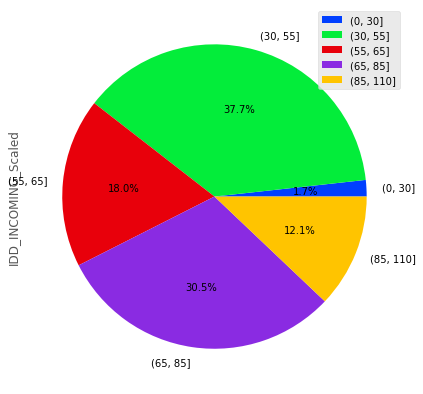

In [87]:
cluster_1[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

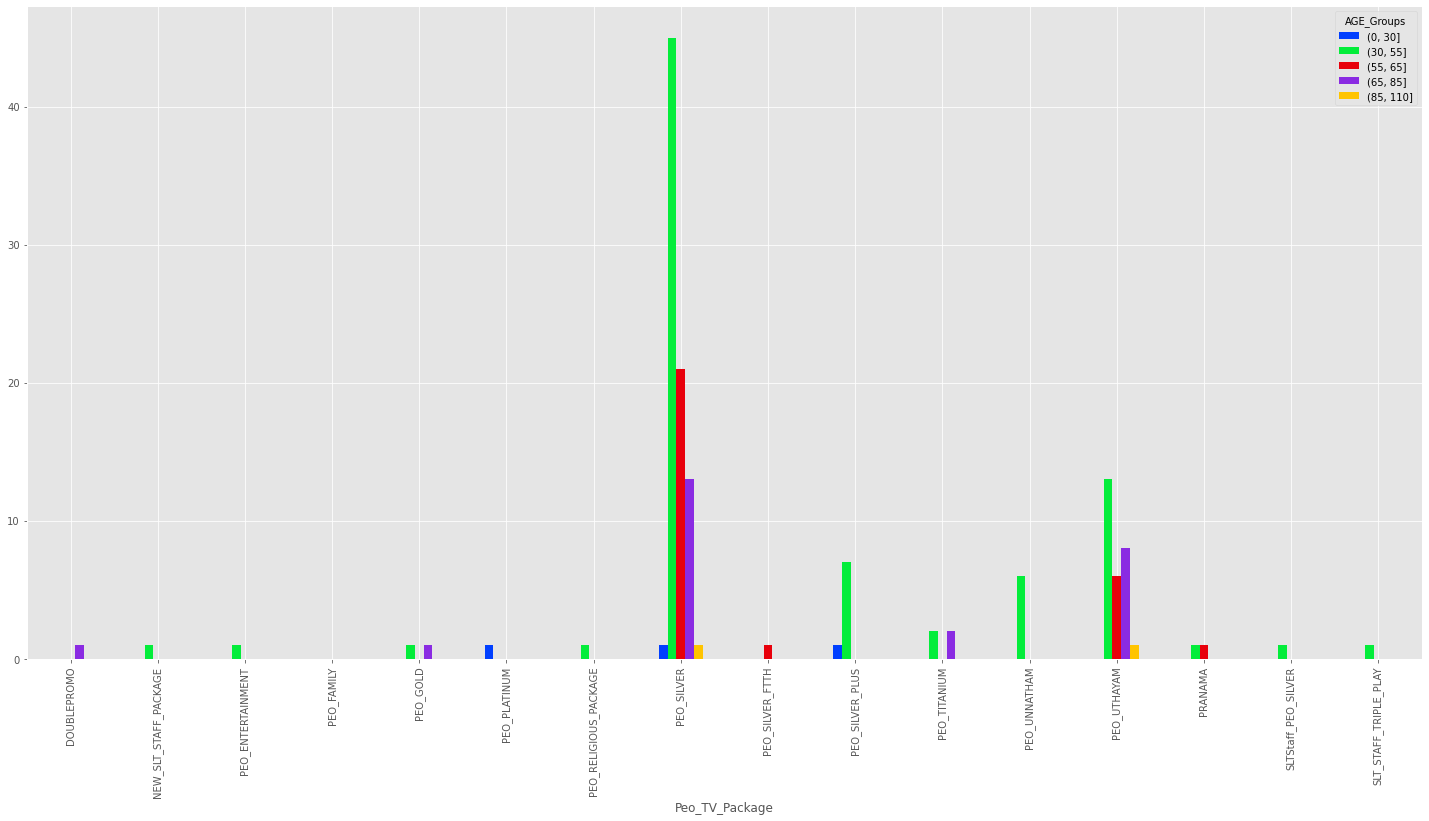

In [88]:
cluster_1[(cluster_1["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [89]:
cluster_1["Having_Insurance"].value_counts()

NO_INFO    1317
YES         159
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

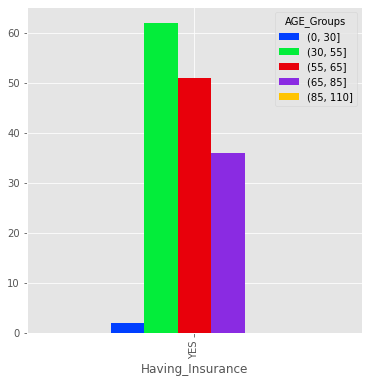

In [90]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

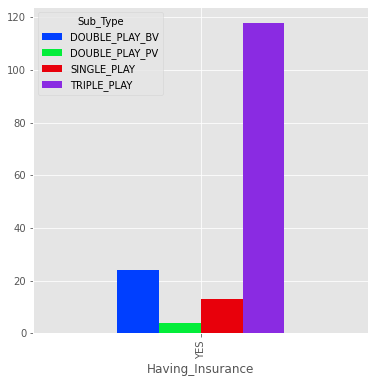

In [91]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

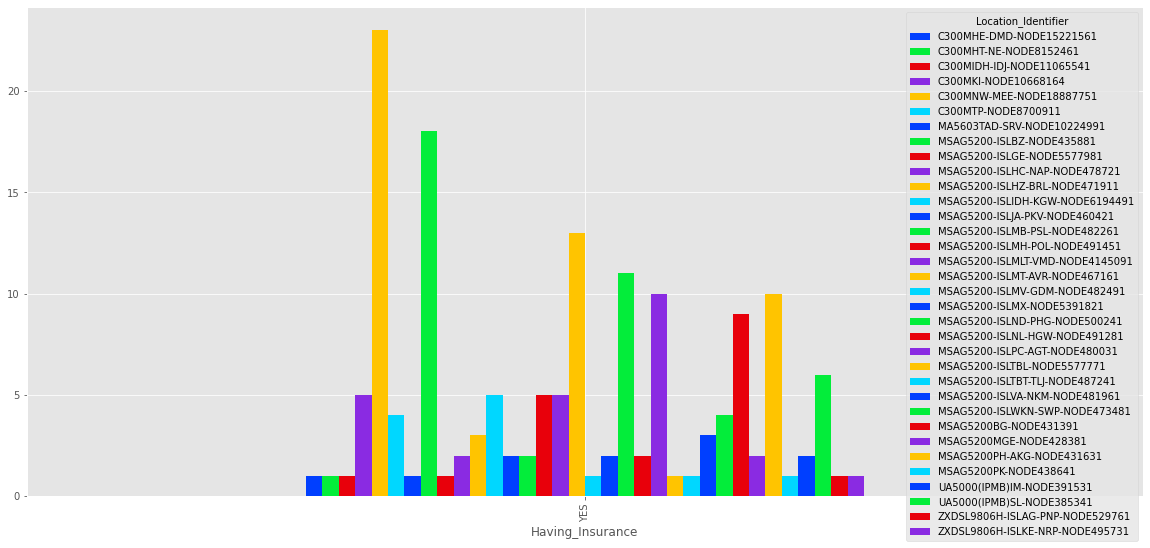

In [92]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [93]:
cluster_1["Having_Senior_Citizen"].value_counts()

NO_INFO    1312
YES         164
Name: Having_Senior_Citizen, dtype: int64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

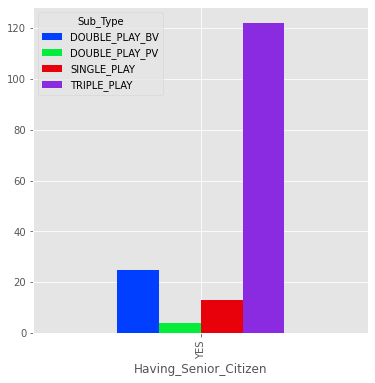

In [94]:
cluster_1[(cluster_1["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

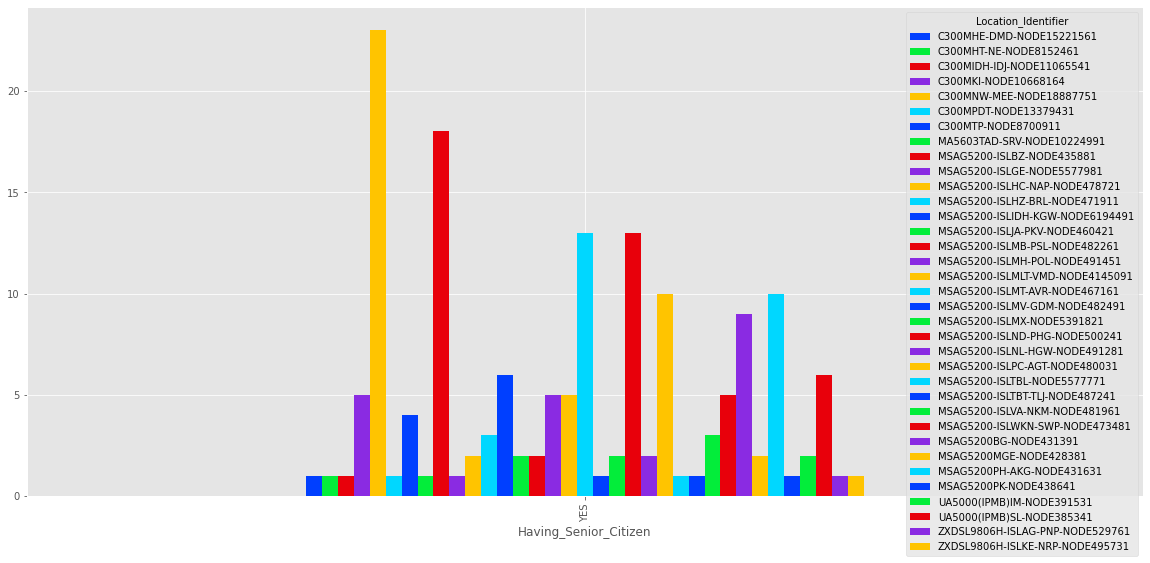

In [95]:
cluster_1[(cluster_1["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [96]:
cluster_1["Having_Family_Member_Abroad"].value_counts()

NO_INFO    1418
YES          58
Name: Having_Family_Member_Abroad, dtype: int64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

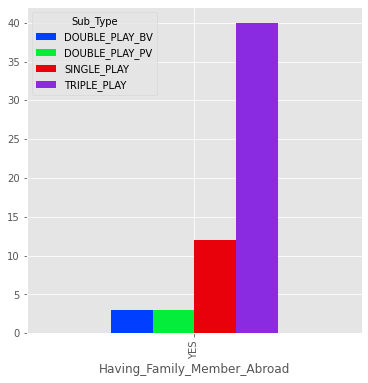

In [97]:
cluster_1[(cluster_1["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

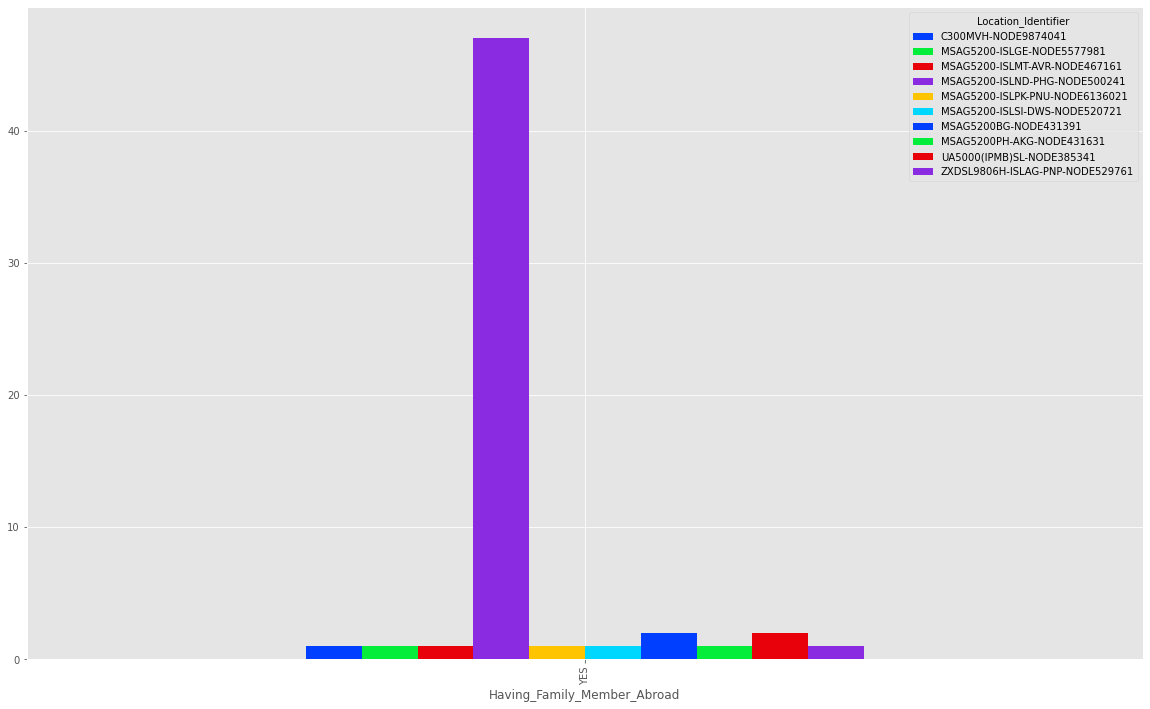

In [98]:
cluster_1[(cluster_1["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [99]:
cluster_1["Having_Working_Professionals"].value_counts()

NO_INFO    1373
YES         103
Name: Having_Working_Professionals, dtype: int64

<AxesSubplot:xlabel='Having_Working_Professionals'>

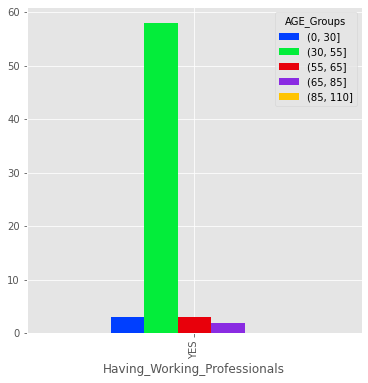

In [100]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

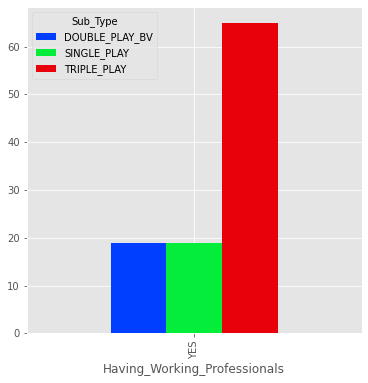

In [101]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

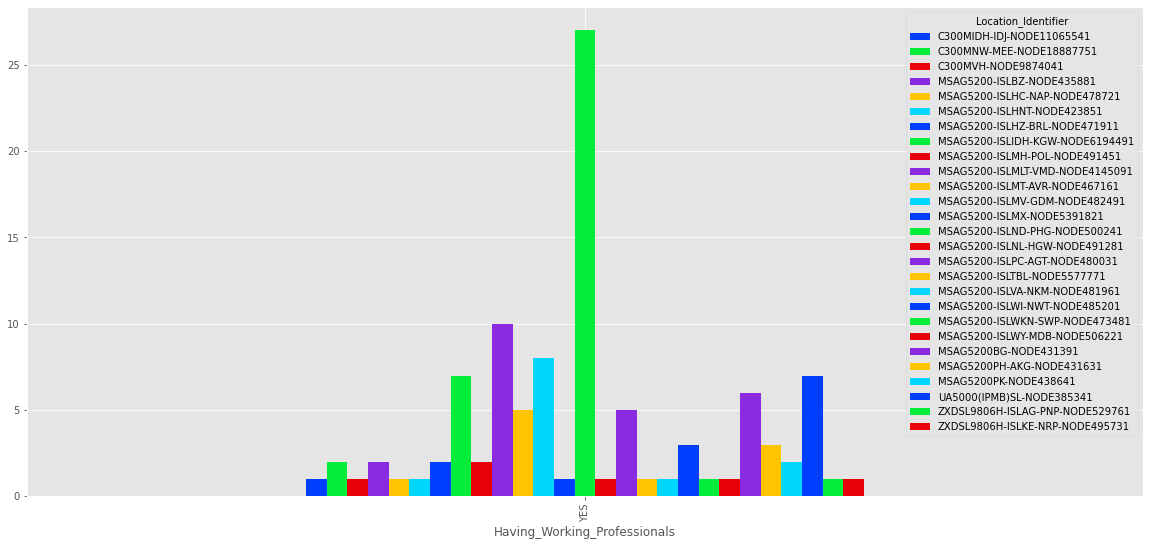

In [102]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [103]:
cluster_1["Having_Teenagers_Students"].value_counts()

NO_INFO    1416
YES          60
Name: Having_Teenagers_Students, dtype: int64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

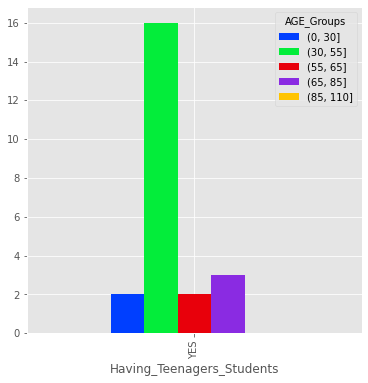

In [104]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

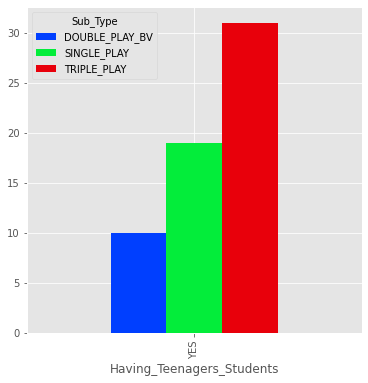

In [105]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

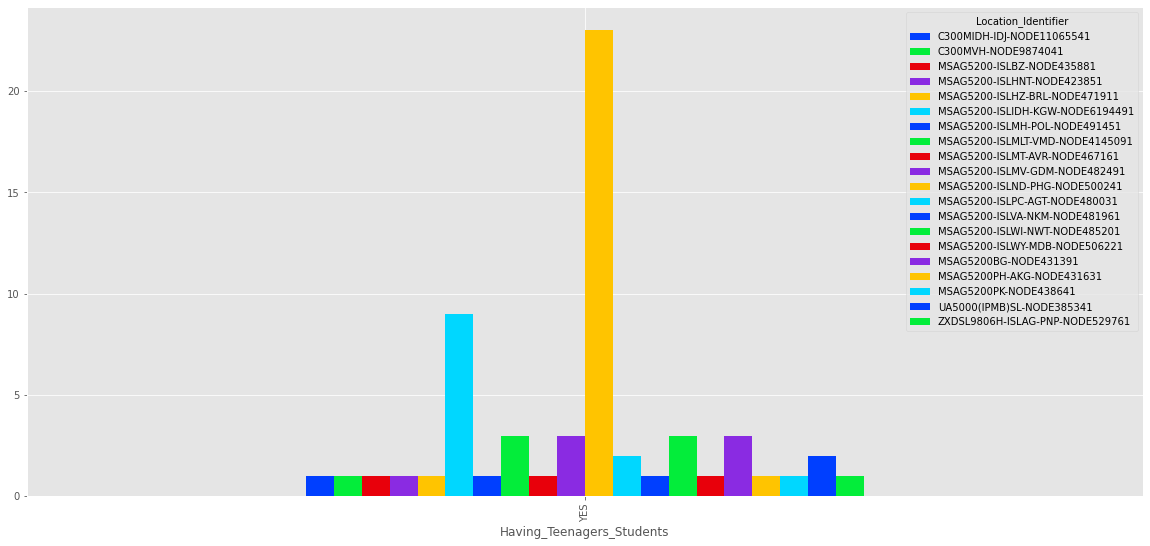

In [106]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [107]:
cluster_1["Tamil_Customer"].value_counts()

NO_INFO    1438
YES          38
Name: Tamil_Customer, dtype: int64

<AxesSubplot:xlabel='Tamil_Customer'>

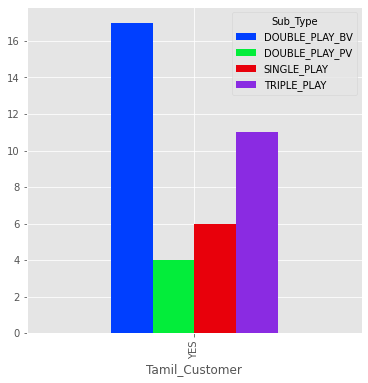

In [108]:
cluster_1[(cluster_1["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

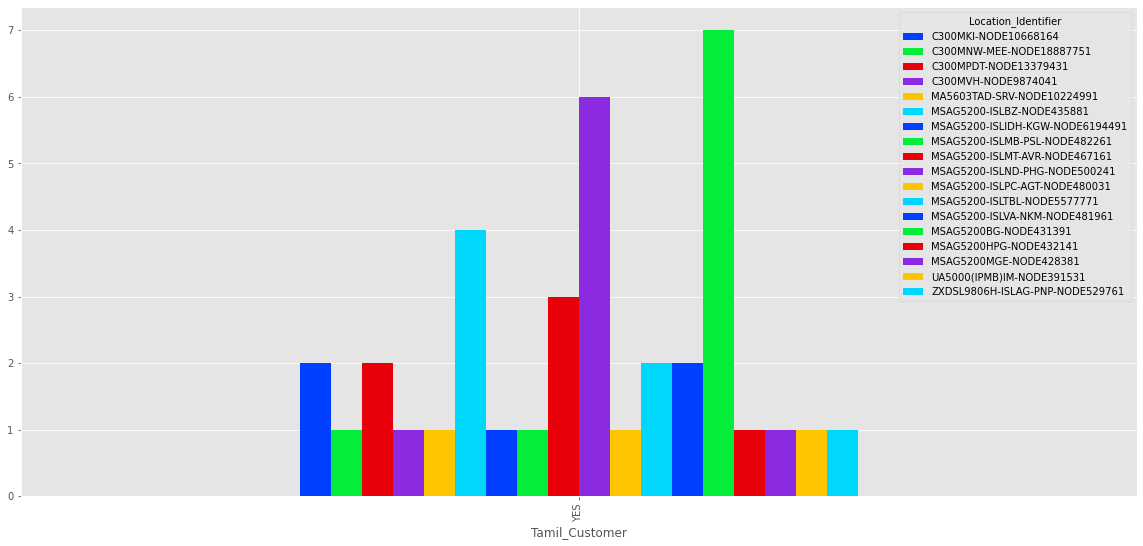

In [109]:
cluster_1[(cluster_1["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [110]:
cluster_1["Having_Kids_at_Home"].value_counts()

NO_INFO    1438
YES          38
Name: Having_Kids_at_Home, dtype: int64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

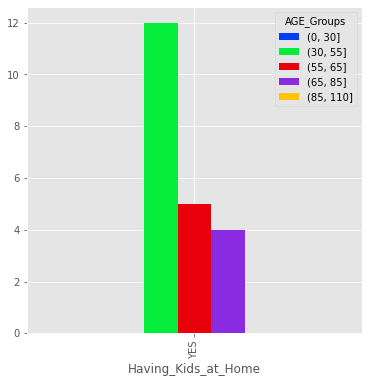

In [111]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

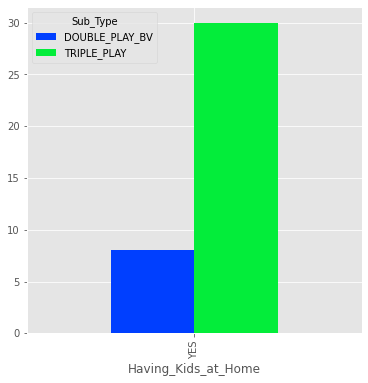

In [112]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

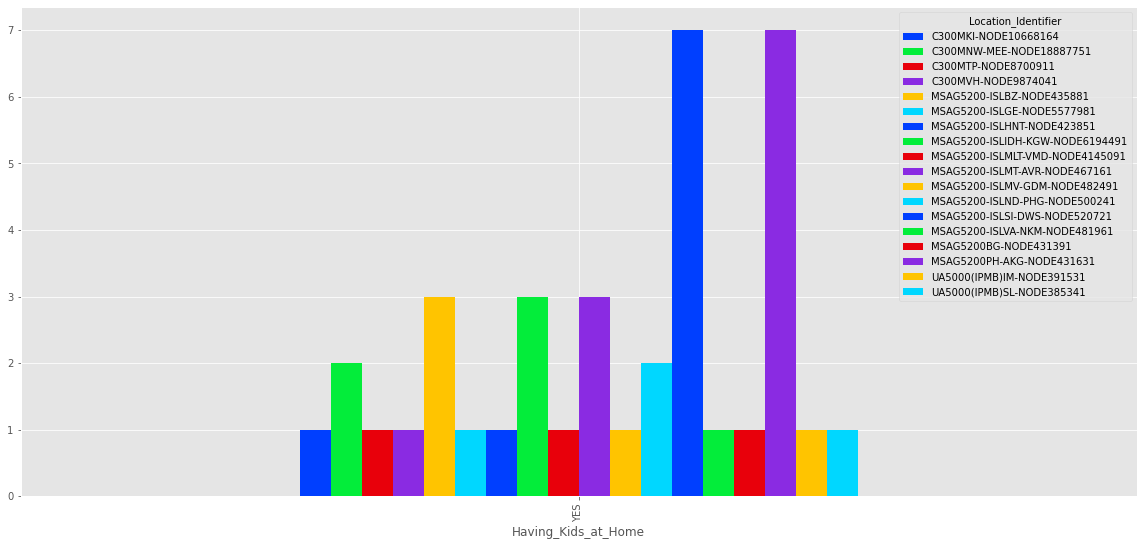

In [113]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 1

#### Feasible locations to offer PeoTV

In [114]:
cluster_1_peo_loc = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY") | (cluster_1["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

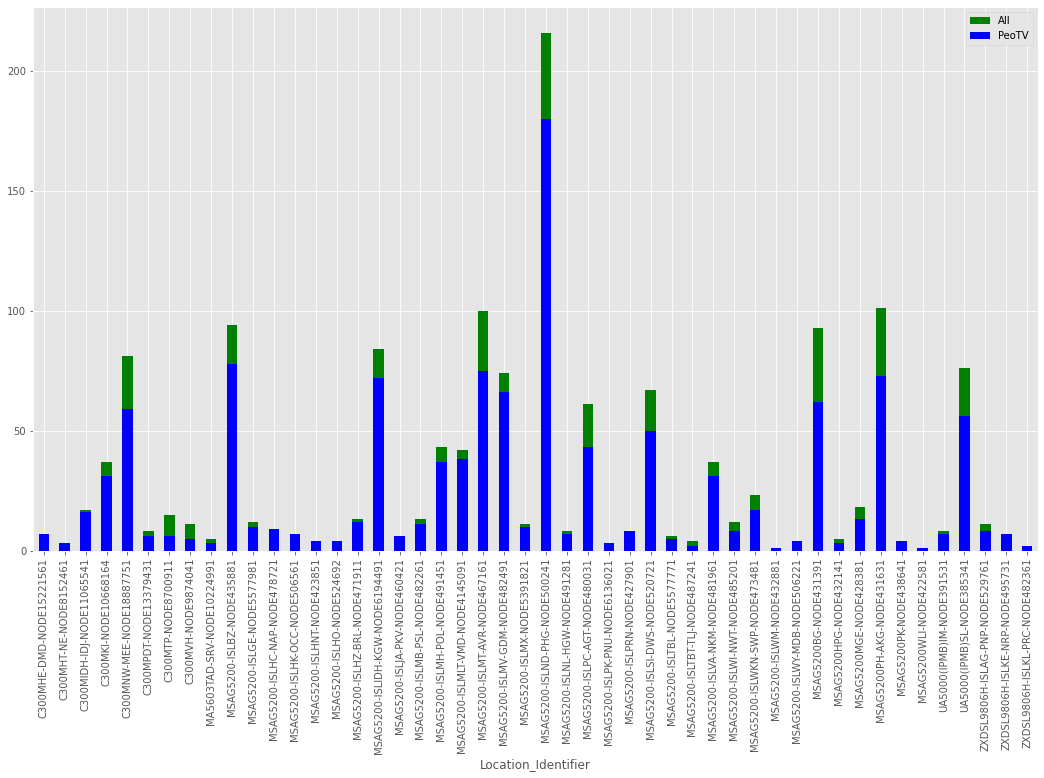

In [115]:
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [116]:
loc_precentage=(cluster_1_peo_loc/cluster_1_loc)*100

In [117]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561           100.000000
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           94.117647
C300MKI-NODE10668164                83.783784
C300MNW-MEE-NODE18887751            72.839506
C300MPDT-NODE13379431               75.000000
MSAG5200-ISLBZ-NODE435881           82.978723
MSAG5200-ISLGE-NODE5577981          83.333333
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911       92.307692
MSAG5200-ISLIDH-KGW-NODE6194491     85.714286
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261       84.615385
MSAG5200-ISLMH-POL-NODE491451       86.046512
MSAG5200-ISLMLT-VMD-NODE4145091     90.476190
MSAG5200-ISLMT-AVR-NODE467161       75.000000
MSAG5200-ISLMV-GDM-NODE482491       89.189189
MSAG5200-ISLMX-NODE5391821          90.909091
MSAG5200-ISLND

#### Feasible locations to offer Broadband

In [118]:
cluster_1_bb_loc = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY") | (cluster_1["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

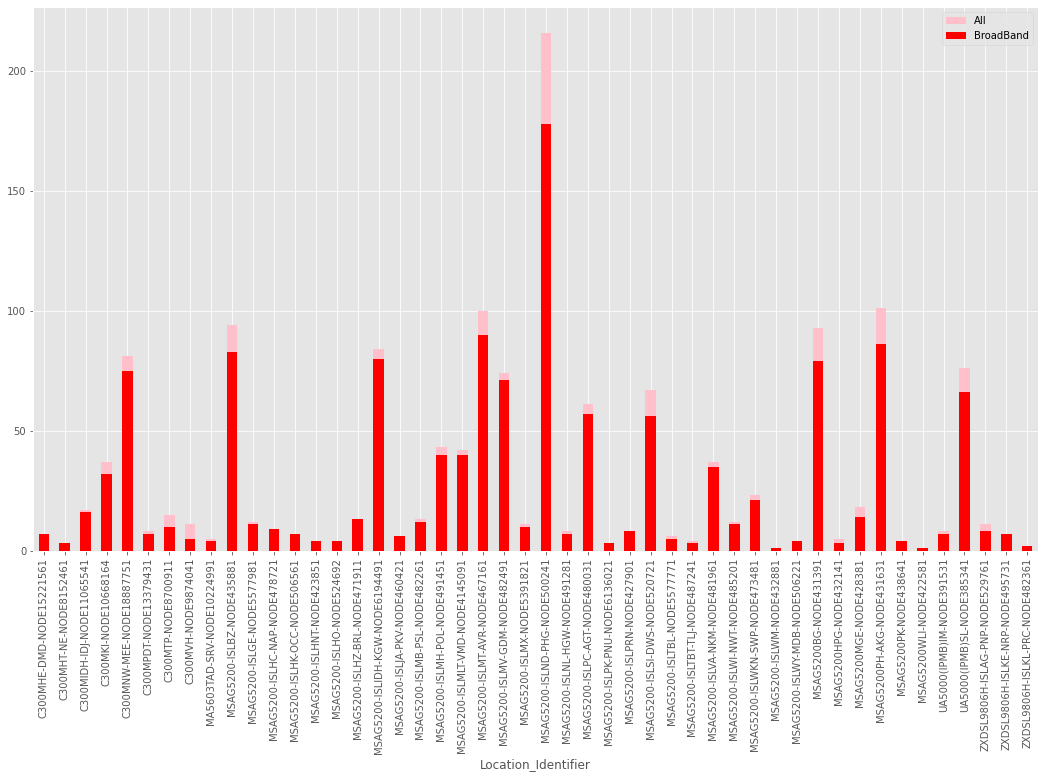

In [119]:
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [120]:
loc_precentage=(cluster_1_bb_loc/cluster_1_loc)*100

In [121]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561           100.000000
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           94.117647
C300MKI-NODE10668164                86.486486
C300MNW-MEE-NODE18887751            92.592593
C300MPDT-NODE13379431               87.500000
C300MTP-NODE8700911                 66.666667
MA5603TAD-SRV-NODE10224991          80.000000
MSAG5200-ISLBZ-NODE435881           88.297872
MSAG5200-ISLGE-NODE5577981          91.666667
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     95.238095
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261       92.307692
MSAG5200-ISLMH-POL-NODE491451       93.023256
MSAG5200-ISLMLT-VMD-NODE4145091     95.238095
MSAG5200-ISLMT-AVR-NODE467161       90.000000
MSAG5200-ISLMV

## Cluster 1- Findings